In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from tqdm import tqdm
import umap
import seaborn as sns
import sklearn
import glob
from typing import List, Dict, Tuple
from copy import deepcopy
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.cluster import FeatureAgglomeration, KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE, SelectFwe
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier, kneighbors_graph
from sklearn.svm import SVC, SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import adjusted_rand_score, silhouette_score, mean_absolute_error, explained_variance_score, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.metrics import f1_score

from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from yellowbrick.cluster import KElbowVisualizer
from collections import OrderedDict


/Users/SamihaMahin/miniconda3/envs/cell_painting/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path1 = "/Users/SamihaMahin/Desktop/brack_lab/ISR_cellpainting/"
path2 = "/Objects_Population - Nuclei.csv"

cell_painting_data_path_3_22 = path1 + "cell_painting_3_22_24_MuSCs" + path2
cell_painting_data_path_3_24 = path1 + "cell_painting_3_24_24_MuSCs" + path2
cell_painting_data_path_9_11 = path1 + "cell_painting_9_11_24_MuSCs" + path2
cell_painting_data_path_9_12 = path1 + "cell_painting_9_12_24_MuSCs" + path2
cell_painting_data_path_9_18 = path1 + "cell_painting_9_18_24_MuSCs" + path2
cell_painting_data_path_9_19 = path1 + "cell_painting_9_19_24_MuSCs" + path2
cell_painting_data_path_10_2 = path1 + "cell_painting_10_2_24_MuSCs" + path2

# TODO: ADD FILE PATH FOR NEW DATA FILES

data_df_3_22_raw = pd.read_csv(cell_painting_data_path_3_22)
data_df_3_24_raw = pd.read_csv(cell_painting_data_path_3_24)
data_df_9_11_raw = pd.read_csv(cell_painting_data_path_9_11)
data_df_9_12_raw = pd.read_csv(cell_painting_data_path_9_12)
data_df_9_18_raw = pd.read_csv(cell_painting_data_path_9_18)
data_df_9_19_raw = pd.read_csv(cell_painting_data_path_9_19)
data_df_10_2_raw = pd.read_csv(cell_painting_data_path_10_2)

# TODO: READ NEW DATA



In [4]:
age_color_map = {
    "Adult": 'maroon',
    "Aged": 'darkgray'
}

sample_map = {
    "Adult": 'S1',
    "Aged": 'S2'   
}

batch_norm_map = {
    "S1": 'Adult',
    "S2": 'Aged'
}

age_experiment_map = {
    "All groups": ['Adult', 'Aged']
    #"Adult vs Aged": ['Ad', 'Ag'],
    #"Aged vs Aged+Sal": ['Ag', 'AgS']
}

## Data cleanup and preprocessing

In [5]:
relevant_columns = [
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Mean',
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Sum',
    'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Mean',
    'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Sum',
    'Nuclei - Intensity Cell Hoechst 33342 - nucleus Mean',
    'Nuclei - Intensity Cell Hoechst 33342 - nucleus Sum',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Spot 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Hole 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Edge 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Ridge 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Valley 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Saddle 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Bright 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Dark 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Spot 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Hole 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Edge 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Ridge 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Valley 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Saddle 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Bright 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Dark 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px',
    'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Mean',
    'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Sum',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Spot 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Hole 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Edge 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Ridge 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Valley 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Saddle 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Bright 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Dark 0.2 px',
    'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Mean',
    'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Sum',
    'Nuclei - Intensity Nucleus Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum',
    'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean',
    'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum',
    'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Mean',
    'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Sum',
    'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Mean',
    'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Sum',
    'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Mean',
    'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Sum',
    'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Mean',
    'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Sum',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Mean',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Sum',
    'Nuclei - Intensity Cell MitoTracker Deep Red - mito Mean',
    'Nuclei - Intensity Cell MitoTracker Deep Red - mito Sum',
    'Nuclei - Cell Area [µm²]',
    'Nuclei - Cell Roundness',
    'Nuclei - Cell Width [µm]',
    'Nuclei - Cell Length [µm]',
    'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Mean',
    'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Sum',
]
print(len(relevant_columns))

73


In [6]:
#TODO: if we want to add more features, add them/uncomment to the feature_mapping

feature_mapping = {
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Mean': 'DAPI nucleus intensity mean',
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Sum': 'DAPI nucleus intensity sum',
    # 'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Mean': 'DAPI cyto intensity mean',
    # 'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Sum': 'DAPI cyto intensity sum',
    # 'Nuclei - Intensity Cell Hoechst 33342 - nucleus Mean': 'DAPI cell intensity mean',
    # 'Nuclei - Intensity Cell Hoechst 33342 - nucleus Sum': 'DAPI cell intensity sum',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Spot 0.2 px': 'Actin texture spot',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Hole 0.2 px': 'Actin texture hole',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Edge 0.2 px': 'Actin texture edge',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Ridge 0.2 px': 'Actin texture ridge',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Valley 0.2 px': 'Actin texture valley',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Saddle 0.2 px': 'Actin texture saddle',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Bright 0.2 px': 'Actin texture bright',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Spot 0.2 px': 'Mito texture spot',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Hole 0.2 px': 'Mito texture hole',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Edge 0.2 px': 'Mito texture edge',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Ridge 0.2 px': 'Mito texture ridge',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Valley 0.2 px': 'Mito texture valley',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Saddle 0.2 px': 'Mito texture saddle',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Bright 0.2 px': 'Mito texture bright',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Dark 0.2 px': 'Mito texture dark',
    # 'Nuclei - Intensity Nucleus Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean': 'Actin nucleus intensity mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean': 'Actin cyto intensity mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum': 'Actin cyto intensity sum',
    # 'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean': 'Actin cell intensity mean',
    # 'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum': 'Actin cell intensity sum',
    # 'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Mean': 'Mito nucleus intensity mean',
    # 'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Sum': 'Mito nucleus intensity sum',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Mean': 'Mito cyto intensity mean',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Sum': 'Mito cyto intensity sum',
    # 'Nuclei - Intensity Cell MitoTracker Deep Red - mito Mean': 'Mito cell intensity mean',
    # 'Nuclei - Intensity Cell MitoTracker Deep Red - mito Sum': 'Mito cell intensity sum',
    'Nuclei - Cell Area [µm²]': 'Cell area',
    'Nuclei - Cell Roundness': 'Cell roundness',
    'Nuclei - Cell Width [µm]': 'Cell width',
    'Nuclei - Cell Length [µm]': 'Cell length',
   
}

relevant_features = [feature_mapping[col] for col in relevant_columns if col in feature_mapping]



In [7]:
def process_data(data_df_raw, well_group, curr_exp, batch_normalize=True):
    data_df_clean = data_df_raw.loc[:, [i for i in relevant_columns if i in feature_mapping]]
    data_df_clean.columns = [feature_mapping[col] for col in data_df_clean.columns]
    data_df_clean.insert(0, 'Exp', [curr_exp]*len(data_df_clean))
    data_df_clean.insert(1, 'Well ID', [i for i in zip(data_df_raw['Row'], data_df_raw['Column'])])
    data_df_clean.insert(2, 'Field', data_df_raw['Field'])
    data_df_clean.insert(3, 'Age', data_df_raw['Group'])

    unique_wells = np.unique(data_df_clean['Well ID'])
    max_cols = {}
    dict_well = {}
    for well in unique_wells:
        group = well_group[well[0]]
        dict_well[well] = group  
        if group in max_cols:
            max_cols[group] = max(max_cols[group], well[1])
        else:
            max_cols[group] = well[1]
    for well in dict_well:
        suffix = 'S1' if well[1] < max_cols[dict_well[well]] else 'S2'
        dict_well[well] = f'{curr_exp} {dict_well[well]} {suffix}'
    print(dict_well)

    data_df_clean.insert(4, 'Sample', data_df_clean['Well ID'].map(dict_well))
    
    data_df_clean.insert(5, 'Type', [curr_exp + " " + sample_map[i] for i in data_df_raw['Group']])
    data_df_clean = data_df_clean.replace([np.inf, -np.inf], np.nan)
    data_df_clean = data_df_clean.dropna(axis=0, how='any', subset=None, inplace=False)
    print(f"Dropped {len(data_df_raw)-len(data_df_clean)} rows")

    if batch_normalize:
        data_df_normalized = pd.DataFrame()
        for sample in np.unique(data_df_clean.Type):
            normalizer = RobustScaler()
            normalized_group = data_df_clean.loc[data_df_clean.Type==sample]
            train_set = normalized_group.loc[normalized_group.Age==batch_norm_map[sample.split()[-1]]]
            normalizer.fit(train_set.loc[:, relevant_features])
            normalized_group.loc[:, relevant_features] = normalizer.transform(normalized_group.loc[:, relevant_features]) #.transform(normalizer.transform)
            data_df_normalized = pd.concat([data_df_normalized, normalized_group])
        return data_df_normalized

    return data_df_clean


In [ ]:
data_df_9_18_raw = data_df_9_18_raw.drop(data_df_9_18_raw[data_df_9_18_raw['Group'] == 'Aged ISRIB'].index)
data_df_9_19_raw = data_df_9_19_raw.drop(data_df_9_19_raw[data_df_9_19_raw['Group'] == 'Aged ISRIB'].index)
data_df_10_2_raw = data_df_10_2_raw.drop(data_df_10_2_raw[data_df_10_2_raw['Group'] == 'Aged ISRIB'].index)

In [9]:
data_df_3_22_raw = data_df_3_22_raw.drop(data_df_3_22_raw[data_df_3_22_raw['Group'] == 'Aged Sal'].index)
data_df_3_24_raw = data_df_3_24_raw.drop(data_df_3_24_raw[data_df_3_24_raw['Group'] == 'Aged Sal'].index)
data_df_9_11_raw = data_df_9_11_raw.drop(data_df_9_11_raw[data_df_9_11_raw['Group'] == 'Aged Sal'].index)
data_df_9_12_raw = data_df_9_12_raw.drop(data_df_9_12_raw[data_df_9_12_raw['Group'] == 'Aged Sal'].index)
data_df_9_18_raw = data_df_9_18_raw.drop(data_df_9_18_raw[data_df_9_18_raw['Group'] == 'Aged Sal'].index)
data_df_9_19_raw = data_df_9_19_raw.drop(data_df_9_19_raw[data_df_9_19_raw['Group'] == 'Aged Sal'].index)
data_df_10_2_raw = data_df_10_2_raw.drop(data_df_10_2_raw[data_df_10_2_raw['Group'] == 'Aged Sal'].index)


In [11]:
data_df_3_22_f = process_data(data_df_raw=data_df_3_22_raw, well_group = {2:"Adult", 3:"Aged"}, curr_exp="3_22", batch_normalize=False)
data_df_3_24_f = process_data(data_df_raw=data_df_3_24_raw, well_group = {2:"Adult", 3:"Aged"}, curr_exp="3_24", batch_normalize=False)
data_df_9_11_f = process_data(data_df_raw=data_df_9_11_raw, well_group = {3:"Adult", 4:"Aged"}, curr_exp="9_11", batch_normalize=False)
data_df_9_12_f = process_data(data_df_raw=data_df_9_12_raw, well_group = {3:"Adult", 4:"Aged"}, curr_exp="9_12", batch_normalize=False)
data_df_9_18_f = process_data(data_df_raw=data_df_9_18_raw, well_group = {3:"Adult", 4:"Aged"}, curr_exp="9_18", batch_normalize=False)
data_df_9_19_f = process_data(data_df_raw=data_df_9_19_raw, well_group = {3:"Adult", 4:"Aged"}, curr_exp="9_19", batch_normalize=False)
data_df_10_2_f = process_data(data_df_raw=data_df_10_2_raw, well_group = {3:"Adult", 4:"Aged"}, curr_exp="10_2", batch_normalize=False)


data_df_combined_f = pd.concat([data_df_3_22_f, data_df_3_24_f, data_df_9_11_f, data_df_9_12_f,
                              data_df_9_18_f, data_df_9_19_f, data_df_10_2_f], ignore_index=True)

{(2, 2): '3_22 Adult S1', (2, 3): '3_22 Adult S2', (3, 2): '3_22 Aged S1', (3, 3): '3_22 Aged S2'}
Dropped 8 rows
{(2, 2): '3_24 Adult S1', (2, 3): '3_24 Adult S2', (3, 2): '3_24 Aged S1', (3, 3): '3_24 Aged S2'}
Dropped 20 rows
{(3, 3): '9_11 Adult S1', (3, 4): '9_11 Adult S2', (4, 3): '9_11 Aged S1', (4, 4): '9_11 Aged S2'}
Dropped 181 rows
{(3, 3): '9_12 Adult S1', (3, 4): '9_12 Adult S2', (4, 3): '9_12 Aged S1', (4, 4): '9_12 Aged S2'}
Dropped 628 rows
{(3, 3): '9_18 Adult S1', (3, 4): '9_18 Adult S2', (4, 3): '9_18 Aged S1', (4, 4): '9_18 Aged S2'}
Dropped 191 rows
{(3, 3): '9_19 Adult S1', (3, 4): '9_19 Adult S2', (4, 3): '9_19 Aged S1', (4, 4): '9_19 Aged S2'}
Dropped 72 rows
{(3, 3): '10_2 Adult S1', (3, 4): '10_2 Adult S2', (4, 3): '10_2 Aged S1', (4, 4): '10_2 Aged S2'}
Dropped 401 rows


## Similarity Matrix

In [12]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt

def sim_matrix(data_df, exclude):
    if len(exclude) != 0:
        data_df = data_df[~data_df['Exp'].isin(exclude)]
    
    grouped_df = data_df.groupby(['Exp', 'Well ID', 'Age', 'Sample', 'Type']).mean().reset_index()
    
    relevant_df = grouped_df.drop(['Field', 'Exp', 'Well ID', 'Type', 'Age'], axis=1)
    relevant_df.set_index('Sample', inplace=True)
    
    distance_matrix = squareform(pdist(relevant_df, metric='euclidean'))
    distance_df = pd.DataFrame(distance_matrix, index=relevant_df.index, columns=relevant_df.index)
    
    plt.figure(figsize=(8, 5)) 
    ax = sns.heatmap(distance_df)
    plt.xticks(rotation=90)  
    plt.yticks(rotation=0)  

    plt.show()

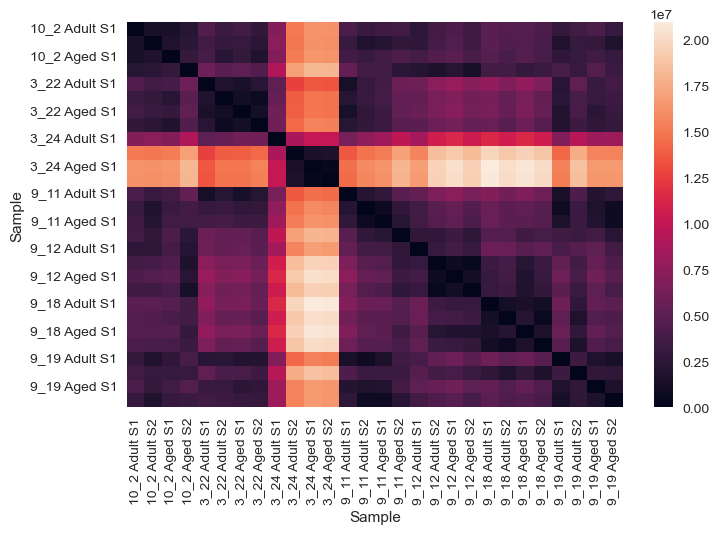

In [15]:
sim_matrix(data_df_combined_f, exclude=[])

In [13]:
from pycytominer import normalize, feature_select, consensus

data_df = data_df_combined_f
_df = data_df[data_df['Exp'] == '3_22']
_df_norm = normalize(_df, features = relevant_features, 
                         meta_features = ["Exp","Well ID",	"Field"	, "Age", "Sample", "Type"],
                         method='standardize')

_df_feature_select = feature_select(_df_norm, features= relevant_features,
                                    samples="all",
                                    operation=["variance_threshold","correlation_threshold", "drop_outliers"],
                                    freq_cut=0.05,
                                    outlier_cutoff=500)

_df_feature_select = _df_feature_select.drop(['Well ID', 'Field', 'Sample', 'Type'], axis=1)

features_select_features = list(_df_feature_select.columns[2:])

_df_consensus = consensus(_df_feature_select, replicate_columns=["Exp", "Age"], features=features_select_features)
_df_consensus

Exp    Age  DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0  3_22  Adult                    -0.097177                   -0.098421   
1  3_22   Aged                    -0.244352                    0.001677   

   Actin texture spot  Actin texture hole  Actin texture edge  \
0           -0.117733           -0.082065           -0.086252   
1            0.010840           -0.025434           -0.327099   

   Actin texture ridge  Actin texture saddle  Mito texture spot  \
0            -0.224135             -0.198723          -0.079561   
1            -0.299262             -0.294170          -0.119697   

   Mito texture hole  Mito texture edge  Actin cyto intensity mean  \
0          -0.102448           0.054532                  -0.143830   
1          -0.088290          -0.052591                  -0.200486   

   Actin cyto intensity sum  Mito cyto intensity mean  \
0                 -0.220122                 -0.191351   
1                 -0.255402                 -0.238746   

   Mito cyto intensity sum  Cell area  Cell roundness  Cell width  Cell length  
0                -0.285104  -0.286090       -0.079947   -0.270799    -0.220052  
1                -0.299840  -0.269561       -0.063794   -0.087115    -0.237371

## Normalize using pycytominer

In [16]:
from pycytominer import normalize


def pycyto_norm(data_df, list_exp):
  all_normalized_data = pd.DataFrame()
  for exp in list_exp:
    _df = data_df[data_df['Exp'] == exp]
    _df_norm = normalize(_df, features = relevant_features, 
                         meta_features = ["Exp","Well ID",	"Field"	, "Age", "Sample", "Type"],
                         method='standardize',spherize_center=True)
    
    all_normalized_data = pd.concat([all_normalized_data, _df_norm], ignore_index=True)

  return all_normalized_data

In [17]:
data_combined_norm = pycyto_norm(data_df_combined_f, ['3_22', '9_11','9_12', '9_18', '9_19', '10_2'])
data_combined_norm

Exp Well ID  Field    Age         Sample     Type  \
0      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
1      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
2      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
3      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
4      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
...     ...     ...    ...    ...            ...      ...   
32809  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   
32810  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   
32811  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   
32812  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   
32813  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   

       DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0                        -0.783705                    2.542040   
1                        -0.910457                   -0.473816   
2                        -1.093148                   -0.039383   
3                        -0.178546                    0.105856   
4                         0.418331                    0.086726   
...                            ...                         ...   
32809                    -0.417060                   -0.490365   
32810                     0.124264                   -0.182414   
32811                     0.548636                   -0.245518   
32812                    -0.479065                   -0.229669   
32813                     1.251762                    0.365214   

       Actin texture spot  Actin texture hole  ...  Mito texture bright  \
0               -0.884022           -0.639539  ...            -0.378616   
1                1.793188            1.025880  ...             1.434324   
2                0.576583            0.500729  ...             0.164667   
3               -0.239160           -0.110772  ...             1.591380   
4               -0.899873           -0.848343  ...             0.072527   
...                   ...                 ...  ...                  ...   
32809           -0.269255           -0.468097  ...             0.858410   
32810           -0.471918           -0.942205  ...             0.304840   
32811           -0.381055           -0.550674  ...             0.397313   
32812            1.666247            1.067472  ...             1.012583   
32813           -0.485197           -1.120870  ...             1.412900   

       Mito texture dark  Actin cyto intensity mean  Actin cyto intensity sum  \
0              -0.366687                   0.765768                  1.367910   
1               1.334616                  -0.355484                 -0.466869   
2               0.155476                   0.459249                  0.189224   
3               0.746854                   0.088522                 -0.379244   
4               0.178208                   0.395575                 -0.239931   
...                  ...                        ...                       ...   
32809           0.955554                  -0.023524                 -0.200335   
32810           0.322326                   2.091137                  0.440747   
32811           0.053524                   0.841748                 -0.423173   
32812           0.961739                  -1.090610                 -0.047294   
32813           1.273143                   3.135938                  0.515289   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                      1.624586                 2.315393   1.018897   
1                     -0.904451                -0.742926  -0.503383   
2                      0.478356                 0.139569  -0.070791   
3                      0.122713                -0.521947  -0.596782   
4                     -0.055694                -0.520163  -0.610091   
...                         ...                      ...        ...   
32809                 -1.206547                -0.565333  -0.268312   
32810                 -0.596985         

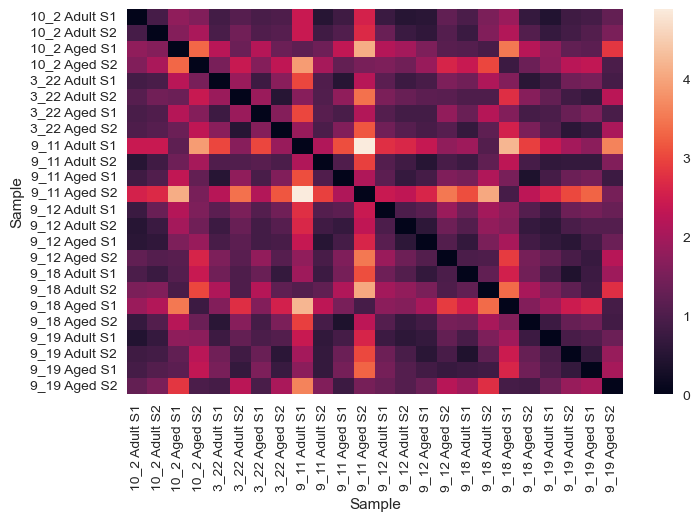

In [18]:
sim_matrix(data_combined_norm, [])

## Feature Analysis 

### Pie plot age count distribution

Text(0.5, 1.0, 'cell_painting_combined cell distribution pie plot')

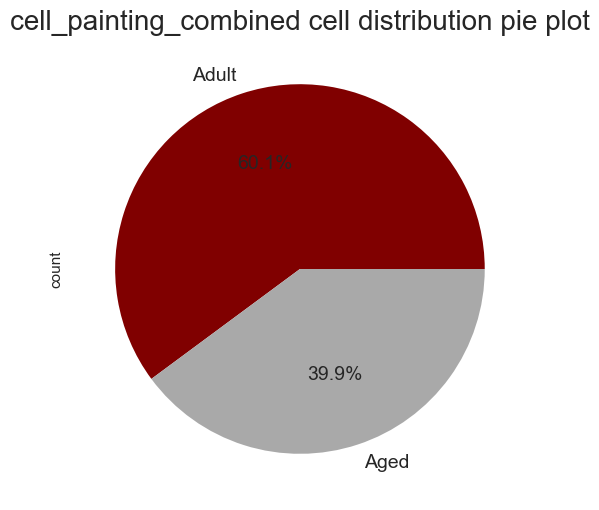

In [19]:
"""
Plots the fraction of number of cells for each Age group
"""
#TODO: change the pie into a histogram, make for loop for each experiment or add dictionary color mapping

# plt.rcParams["figure.figsize"] = (8,6)
# plt.figure()
# plot_title = f"cell_painting_3_22 cell distribution pie plot"
# data_df_3_22.Age.value_counts().plot.pie(fontsize=14,autopct='%.1f%%', colors=['maroon','lightskyblue','darkgray'])
# plt.title(plot_title, fontsize=20)


# plt.rcParams["figure.figsize"] = (8,6)
# plt.figure()
# plot_title = f"cell_painting_3_24 cell distribution pie plot"
# data_df_3_24.Age.value_counts().plot.pie(fontsize=14,autopct='%.1f%%', colors=['lightskyblue', 'maroon', 'darkgray'])
# plt.title(plot_title, fontsize=20)

plt.rcParams["figure.figsize"] = (8,6)
plt.figure()
plot_title = f"cell_painting_combined cell distribution pie plot"
data_combined_norm.Age.value_counts().plot.pie(fontsize=14,autopct='%.1f%%', colors=['maroon','darkgray'])
plt.title(plot_title, fontsize=20)

### PCA visualization

In [50]:
def PCA_calc(data_df):
    
    relevant_data_df = data_df.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type']).mean().reset_index().drop('Field', axis=1)
    # if curr_exp == "cell painting combination":
    #     style_type = 'Exp'
    # else:
    # # relevant_data_df = data_df.groupby(['Well ID','Age']).mean().reset_index()
    #     style_type = None
    age_label = relevant_data_df['Age']

    relevant_np = np.array(relevant_data_df.loc[:, relevant_features])

    pca = PCA(n_components=2)
    pca_np = pca.fit_transform(relevant_np)

    relevant_data_df["pca_dim1"] = pca_np[:, 0]
    relevant_data_df["pca_dim2"] = pca_np[:, 1]
    relevant_data_df["Age"] = age_label

    return relevant_data_df

def PCA_viz(relevant_data_df, plot_title):

    plt.figure(figsize=(10,10))
    plt.title(plot_title)
    ax = sns.scatterplot(
        x="pca_dim1", y ="pca_dim2", 
        hue="Age",
        style='Exp',
        data=relevant_data_df,
        legend="full",
        palette=age_color_map,
        s = 50)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    plt.legend(fontsize=15)
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(False)
    plt.tick_params(direction='out',length=3, width=1, colors='black')
    legend = ax.legend(fontsize=15, bbox_to_anchor=(1, 0.6))
    legend.set_title(None)
    plt.show()


def TSNE_calc(data_df):
    #NO AGE EXP MAP

    #relevant_data_df = data_df.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type']).mean().reset_index()
    relevant_data_df = data_df.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type', 'Field']).mean().reset_index()
    age_label = relevant_data_df['Age']
    relevant_np = np.array(relevant_data_df.loc[:, relevant_features])
    tsne = TSNE(n_components=2)
    tsne_np = tsne.fit_transform(relevant_np)
    relevant_data_df["tsne_dim1"] = tsne_np[:, 0]
    relevant_data_df["tsne_dim2"] = tsne_np[:, 1]
    relevant_data_df["Age"] = age_label
    return relevant_data_df

def TSNE_viz(relevant_data_df, plot_title):
    style_type = "Exp"
    plt.figure(figsize=(10,10))
    plt.title(plot_title)
    ax = sns.scatterplot(
        x="tsne_dim1", y="tsne_dim2",
        hue="Age",
        style=style_type,
        data=relevant_data_df,
        legend="full",
        palette=age_color_map,
        s = 50,
        marker='o')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(False)
    plt.title(None)
    plt.tick_params(direction='out',length=3, width=1, colors='black', labelsize=18)
    legend = ax.legend(fontsize=15, bbox_to_anchor=(1, 0.6))
    legend.set_title(None)
    plt.show()
    plt.savefig("figures/tsne_ad_ag.png")
        

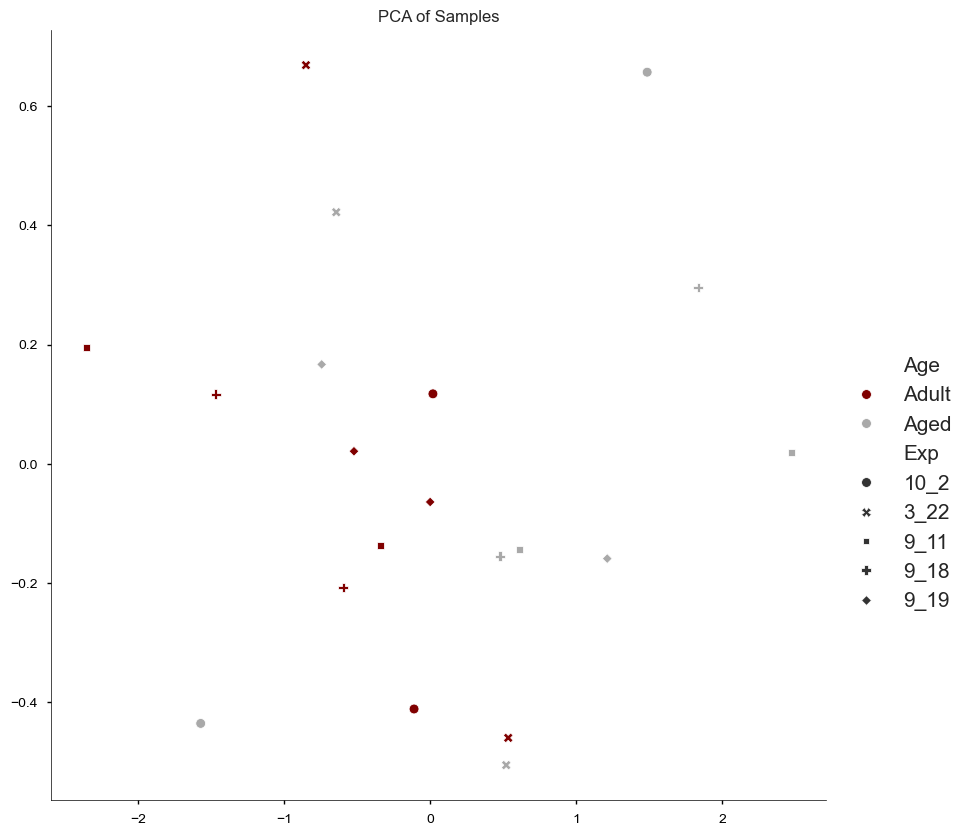

In [30]:
pca_df = PCA_calc(data_combined_norm)
PCA_viz(pca_df, "PCA of Samples")

In [40]:
tsne_df = TSNE_calc(data_combined_norm)

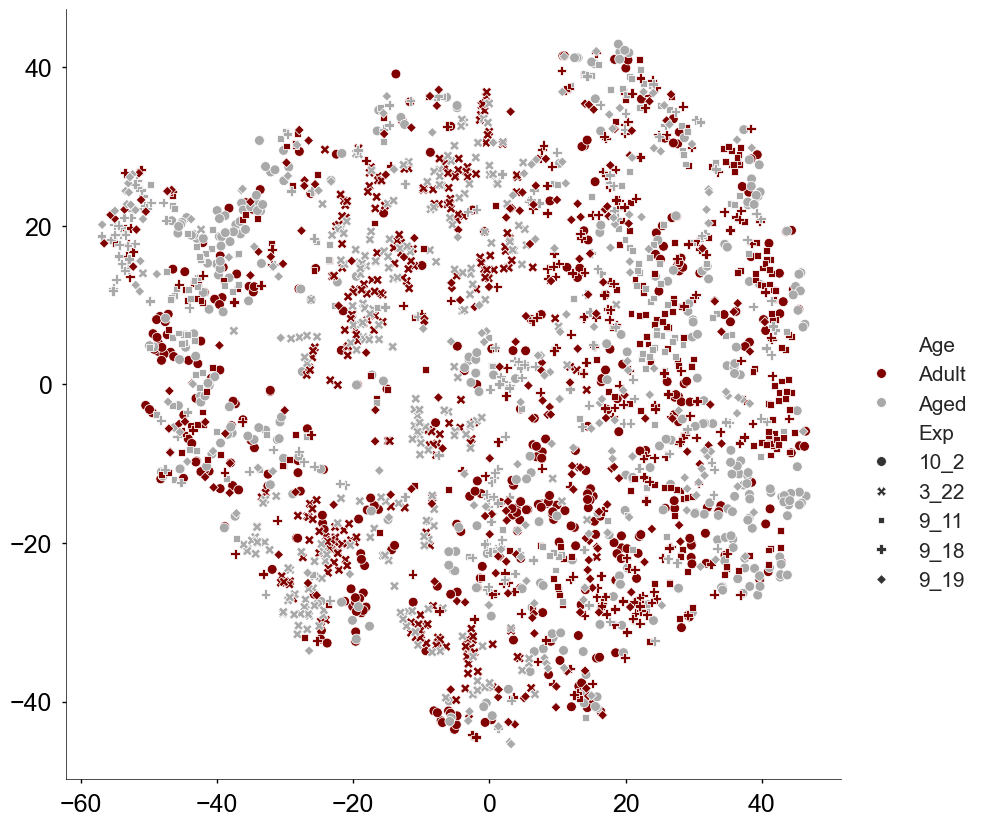

<Figure size 5000x2000 with 0 Axes>

In [51]:
TSNE_viz(tsne_df, "TSNE field")

In [24]:
age_experiment_map = {
    
    "Adult vs Aged": ['Ad', 'Ag']
    
}

### Anova feature importance

In [86]:
def ANOVA_feat_ranking(data_df, num_features=5):
    relevant_data_df = deepcopy(data_df.loc[:, relevant_features])
    age_label = list(data_df['Age'])
    y = age_label
    X = deepcopy(relevant_data_df)
    X = RobustScaler().fit_transform(X)
    univariate_selector = SelectKBest().fit(X,y)
    idx = univariate_selector.get_support(True)
    selected_features = pd.DataFrame({k: [v] for k, v in zip(relevant_data_df.columns[idx], univariate_selector.scores_[idx])},
                                     index=['F_values']).T.sort_values('F_values', ascending=False).astype(int)
    selected_features = selected_features[: num_features]
    print(f"Number of features selected: {len(selected_features)}")
    # Modify relevant_columbus_visualization
    relevant_data_df = relevant_data_df.loc[:, selected_features.index.tolist()]
    # scaled_features = StandardScaler().fit_transform(relevant_data_df)
    vis_df = pd.DataFrame(relevant_data_df, columns=relevant_data_df.columns)
    vis_df['Age'] = y
    return vis_df, selected_features 

def viz_ANOVA_feat_ranking_group(vis_df, selected_features, plot_title):
    
    plt.rcParams["figure.figsize"] = (30,10)
    plt.figure()
    # ax = vis_df.groupby('Age').mean().T.plot.bar(title=plot_title, width=0.7, color=age_color_map)
    yerr = vis_df.groupby('Age').sem().T
    ax = vis_df.groupby('Age').mean().T.plot.bar(title=plot_title, yerr=yerr, width=0.7, color=age_color_map)
    ax.set_ylabel('Feature Value Means', size=20)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=30, rotation=75)
    plt.title(plot_title, fontsize=50)
    #ax = ax.twinx()
    #selected_features.plot(ax=ax, style='k*',  markersize=20,alpha=1)
    #ax.set_ylabel('Scores')
    plt.legend(fontsize=30,loc='upper right', bbox_to_anchor=(1.12,1))
    plt.show()
    
    
def viz_ANOVA_feat_ranking_exp(data_df, vis_df, selected_features, plot_title):
    
    vis_df['Exp'] = list(data_df['Exp'])
    plt.rcParams["figure.figsize"] = (50,20)
    plt.figure()
    # ax = vis_df.groupby(['Exp','Age']).mean().T.plot.bar(title=plot_title, width=0.7)
    yerr = vis_df.groupby('Age').sem().T
    ax = vis_df.groupby(['Exp','Age']).mean().T.plot.bar(title=plot_title, yerr=yerr, width=0.7)
    plt.legend(fontsize=30,loc='upper left', bbox_to_anchor=(1.05, 1))
    ax.set_ylabel('Feature Value Means')
    plt.xticks(fontsize=30, rotation=90)
    plt.title(plot_title, fontsize=50)
    ax = ax.twinx()
    selected_features.plot(ax=ax, style='k*',  markersize=20,alpha=1)
    ax.set_ylabel('Scores')
    plt.legend(fontsize=10,loc=(1,.99))
    plt.show()


In [57]:
viz_df

DAPI nucleus intensity mean  Mito texture edge  Actin texture hole  \
0                        -0.783705          -0.213717           -0.639539   
1                        -0.910457           0.712928            1.025880   
2                        -1.093148           0.193529            0.500729   
3                        -0.178546           0.659475           -0.110772   
4                         0.418331           0.207905           -0.848343   
...                            ...                ...                 ...   
32809                    -0.417060           0.092946           -0.468097   
32810                     0.124264           0.646422           -0.942205   
32811                     0.548636           0.812197           -0.550674   
32812                    -0.479065           1.027469            1.067472   
32813                     1.251762           2.026374           -1.120870   

       Actin texture spot  Cell roundness  Mito texture hole  \
0               -0.884022        0.226974          -0.538573   
1                1.793188       -0.971711           2.852585   
2                0.576583       -0.207571          -0.024896   
3               -0.239160       -0.355568           0.512411   
4               -0.899873        0.295871           0.328813   
...                   ...             ...                ...   
32809           -0.269255       -0.290993           1.275340   
32810           -0.471918        0.582793           0.063627   
32811           -0.381055        1.053608          -0.226100   
32812            1.666247       -1.614881           0.088239   
32813           -0.485197        0.960626          -0.204867   

       Actin texture edge  Mito cyto intensity mean  \
0               -0.194944                  1.624586   
1               -0.370231                 -0.904451   
2                1.157650                  0.478356   
3               -0.373373                  0.122713   
4                0.289387                 -0.055694   
...                   ...                       ...   
32809            1.723958                 -1.206547   
32810            2.048375                 -0.596985   
32811            1.760522                 -0.837878   
32812            1.354663                 -0.994432   
32813            2.441989                  0.088554   

       Actin cyto intensity mean  DAPI nucleus intensity sum    Age   Exp  
0                       0.765768                    2.542040  Adult  3_22  
1                      -0.355484                   -0.473816  Adult  3_22  
2                       0.459249                   -0.039383  Adult  3_22  
3                       0.088522                    0.105856  Adult  3_22  
4                       0.395575                    0.086726  Adult  3_22  
...                          ...                         ...    ...   ...  
32809                  -0.023524                   -0.490365   Aged  10_2  
32810                   2.091137                   -0.182414   Aged  10_2  
32811                   0.841748                   -0.245518   Aged  10_2  
32812                  -1.090610                   -0.229669   Aged  10_2  
32813                   3.135938                    0.365214   Aged  10_2  

[27859 rows x 12 columns]

Number of features selected: 5


<Figure size 3000x1000 with 0 Axes>

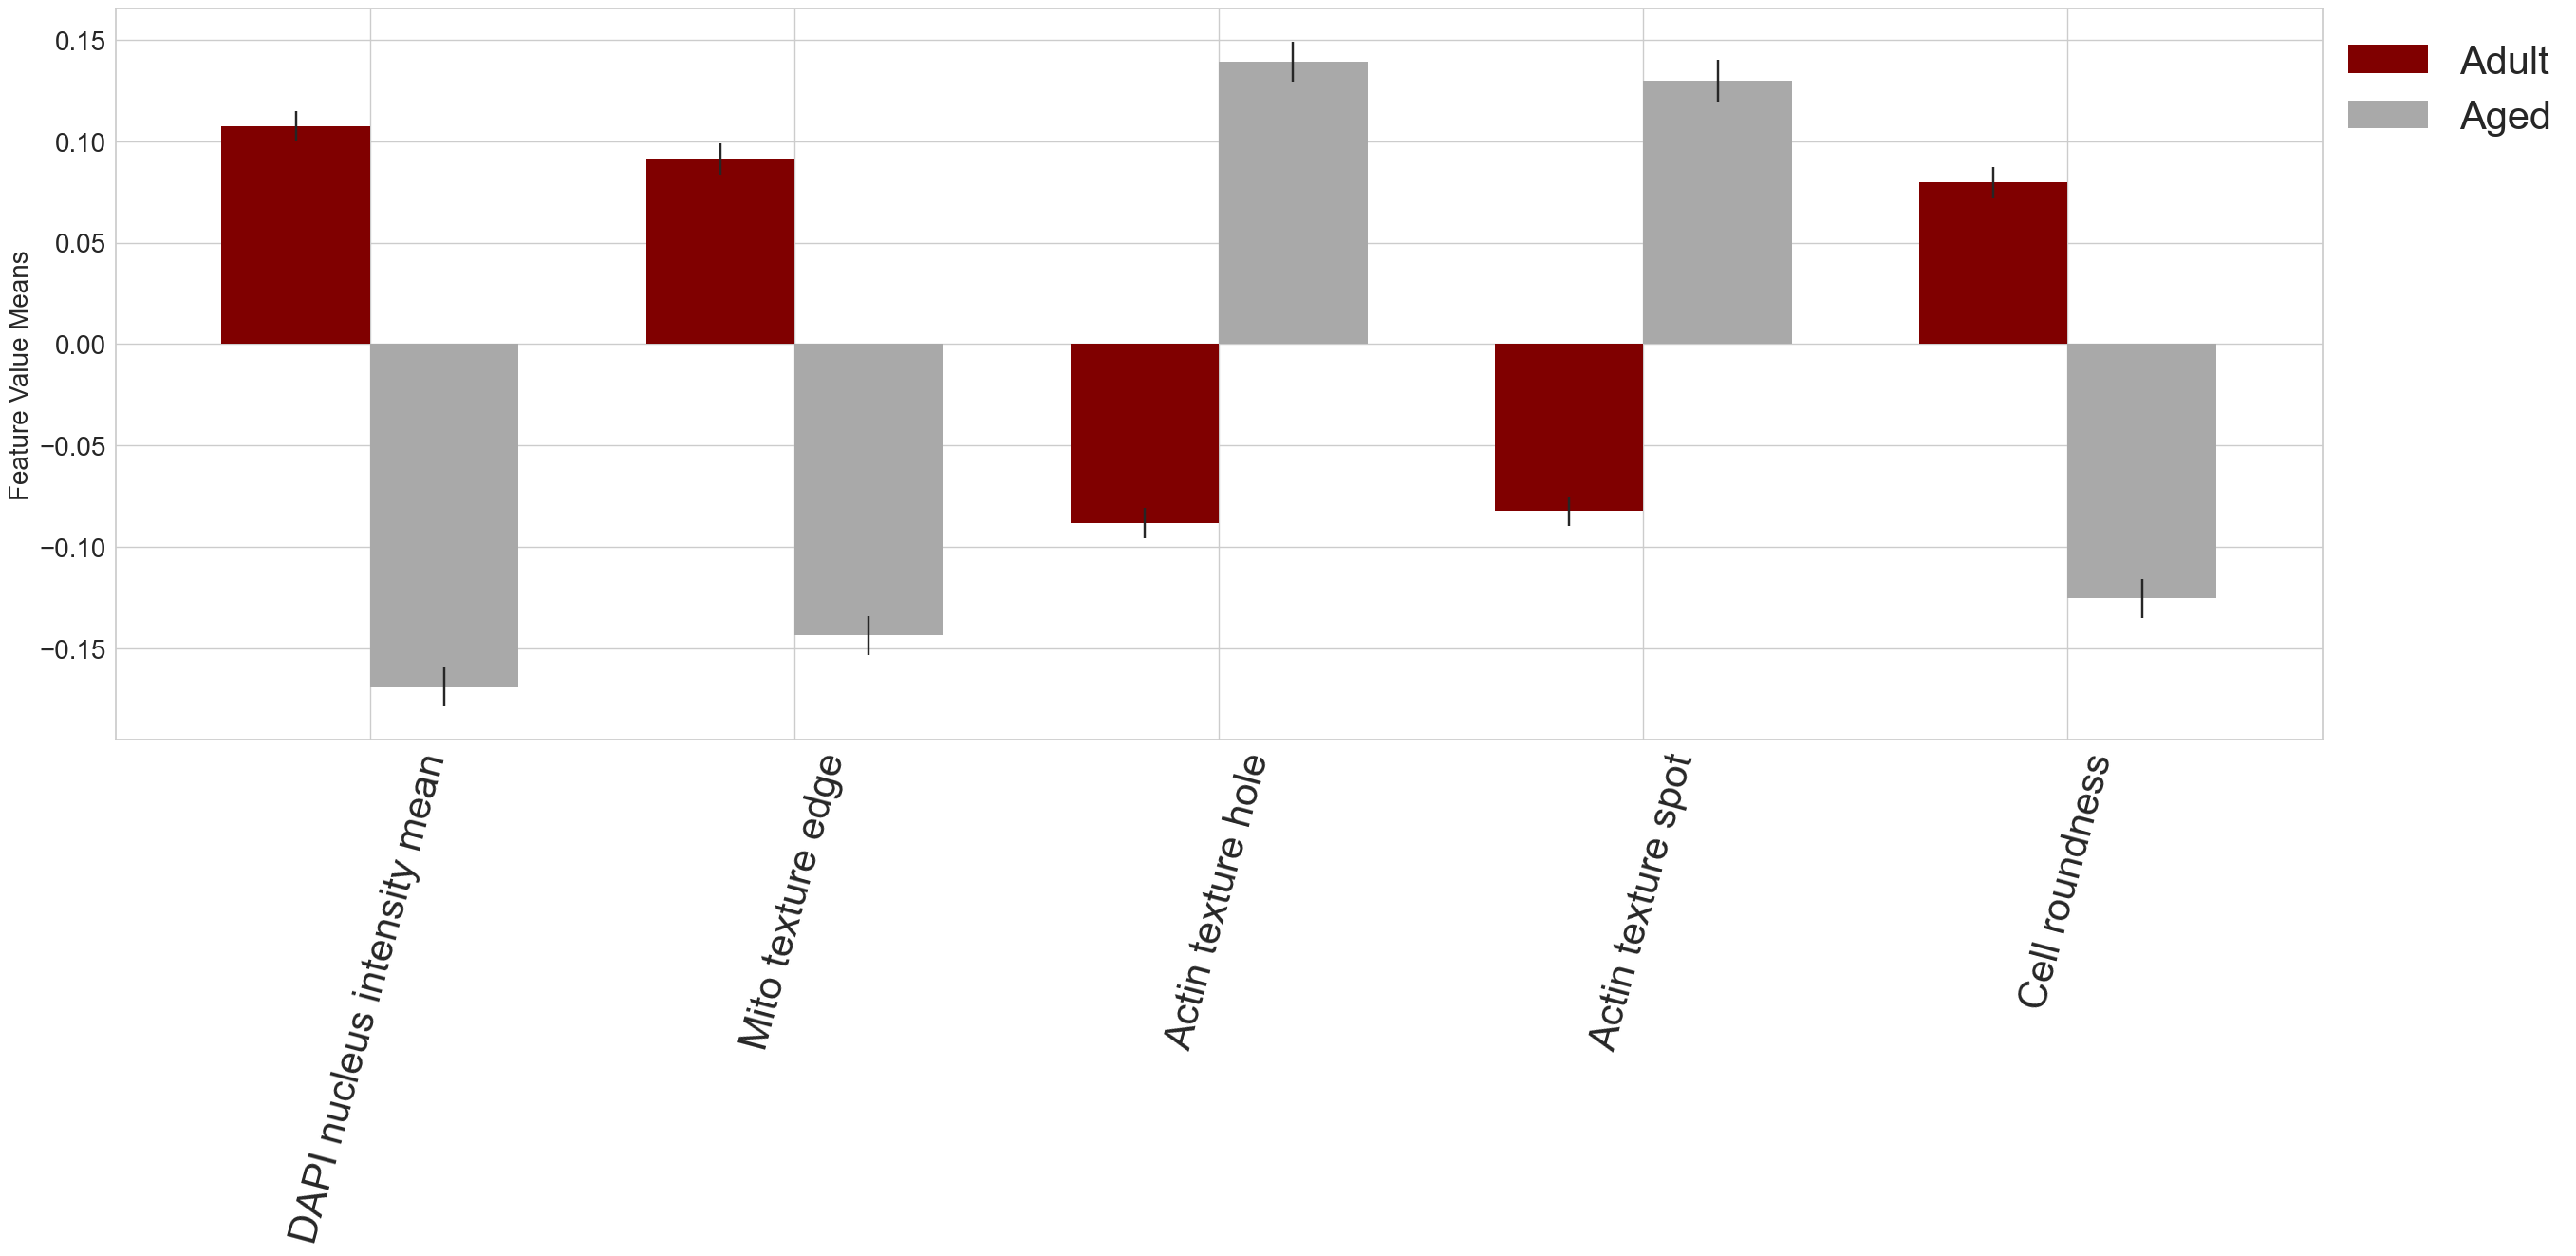

<Figure size 5000x2000 with 0 Axes>

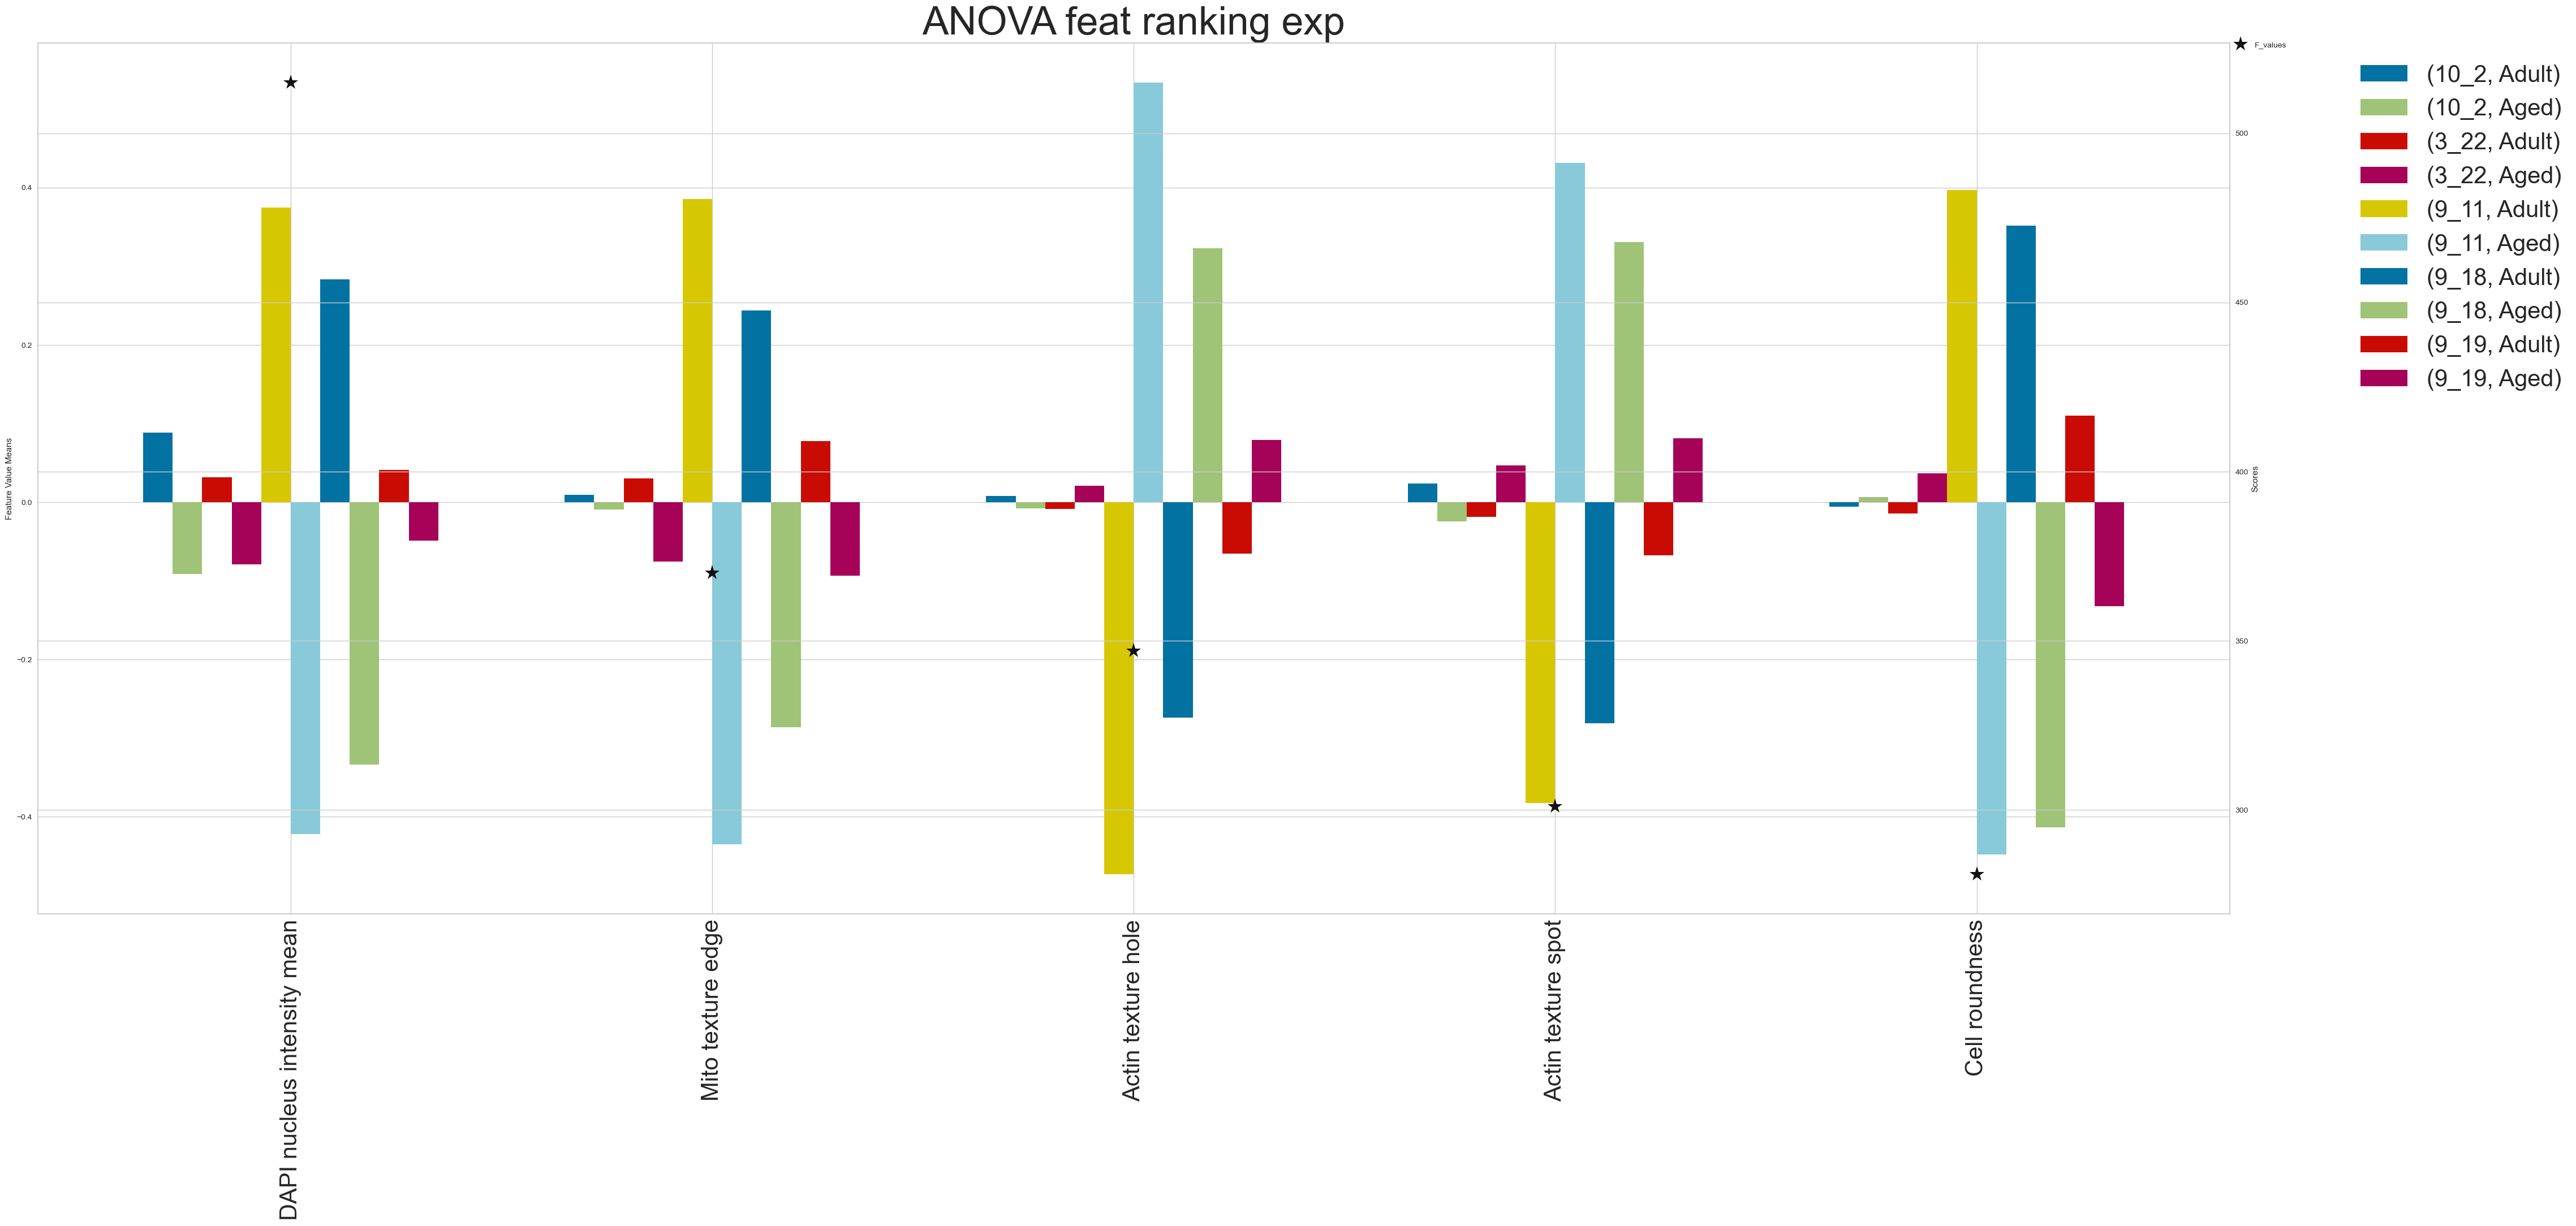

In [88]:
viz_df, selected_features = ANOVA_feat_ranking(data_combined_norm)
viz_ANOVA_feat_ranking_group(viz_df, selected_features, "")
viz_ANOVA_feat_ranking_exp(data_combined_norm, viz_df, selected_features, "ANOVA feat ranking exp")

In [28]:
data_combined_norm = data_combined_norm[~data_combined_norm['Exp'].isin(["9_12"])]

In [29]:
data_combined_norm

Exp Well ID  Field    Age         Sample     Type  \
0      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
1      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
2      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
3      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
4      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
...     ...     ...    ...    ...            ...      ...   
32809  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   
32810  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   
32811  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   
32812  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   
32813  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   

       DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0                        -0.783705                    2.542040   
1                        -0.910457                   -0.473816   
2                        -1.093148                   -0.039383   
3                        -0.178546                    0.105856   
4                         0.418331                    0.086726   
...                            ...                         ...   
32809                    -0.417060                   -0.490365   
32810                     0.124264                   -0.182414   
32811                     0.548636                   -0.245518   
32812                    -0.479065                   -0.229669   
32813                     1.251762                    0.365214   

       Actin texture spot  Actin texture hole  ...  Mito texture bright  \
0               -0.884022           -0.639539  ...            -0.378616   
1                1.793188            1.025880  ...             1.434324   
2                0.576583            0.500729  ...             0.164667   
3               -0.239160           -0.110772  ...             1.591380   
4               -0.899873           -0.848343  ...             0.072527   
...                   ...                 ...  ...                  ...   
32809           -0.269255           -0.468097  ...             0.858410   
32810           -0.471918           -0.942205  ...             0.304840   
32811           -0.381055           -0.550674  ...             0.397313   
32812            1.666247            1.067472  ...             1.012583   
32813           -0.485197           -1.120870  ...             1.412900   

       Mito texture dark  Actin cyto intensity mean  Actin cyto intensity sum  \
0              -0.366687                   0.765768                  1.367910   
1               1.334616                  -0.355484                 -0.466869   
2               0.155476                   0.459249                  0.189224   
3               0.746854                   0.088522                 -0.379244   
4               0.178208                   0.395575                 -0.239931   
...                  ...                        ...                       ...   
32809           0.955554                  -0.023524                 -0.200335   
32810           0.322326                   2.091137                  0.440747   
32811           0.053524                   0.841748                 -0.423173   
32812           0.961739                  -1.090610                 -0.047294   
32813           1.273143                   3.135938                  0.515289   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                      1.624586                 2.315393   1.018897   
1                     -0.904451                -0.742926  -0.503383   
2                      0.478356                 0.139569  -0.070791   
3                      0.122713                -0.521947  -0.596782   
4                     -0.055694                -0.520163  -0.610091   
...                         ...                      ...        ...   
32809                 -1.206547                -0.565333  -0.268312   
32810                 -0.596985         

## Clustering Analysis

### GMM

In [107]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [114]:
relevant_data_df = data_combined_norm.loc[:, selected_features.index.tolist()]
data_scaled = StandardScaler().fit_transform(relevant_data_df)

In [96]:
aic_scores = []
bic_scores = []
for k in range(1, 11):  # Test 1 to 10 clusters
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(data_scaled)
    aic_scores.append(gmm.aic(data_scaled))
    bic_scores.append(gmm.bic(data_scaled))

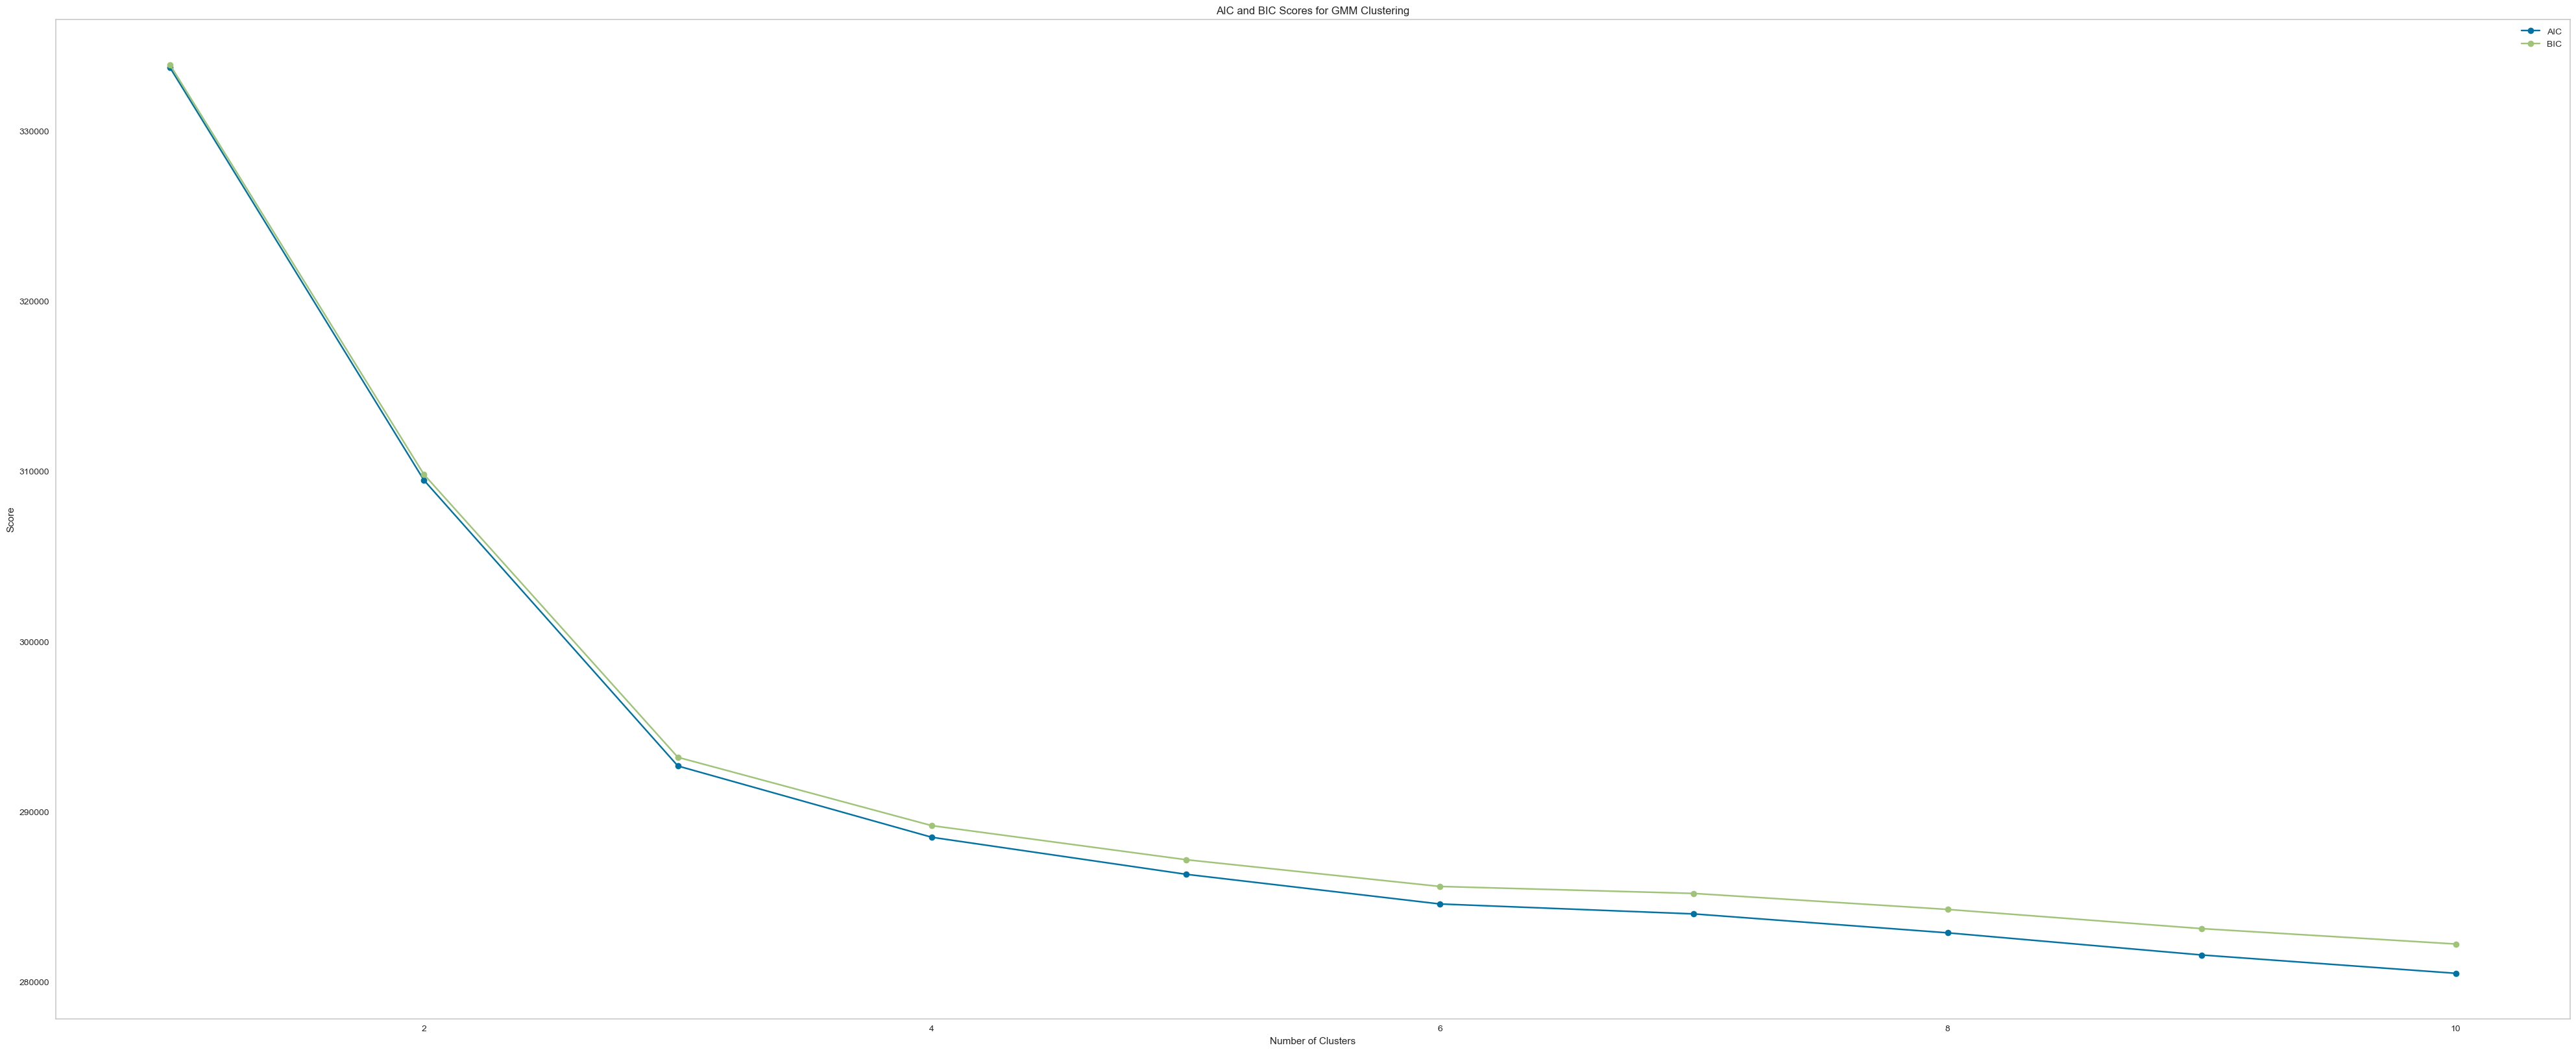

In [101]:
import matplotlib.pyplot as plt

clusters = range(1, 11)

plt.plot(clusters, aic_scores, label='AIC', marker='o')
plt.plot(clusters, bic_scores, label='BIC', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for GMM Clustering')
plt.legend()
plt.grid()
plt.show()

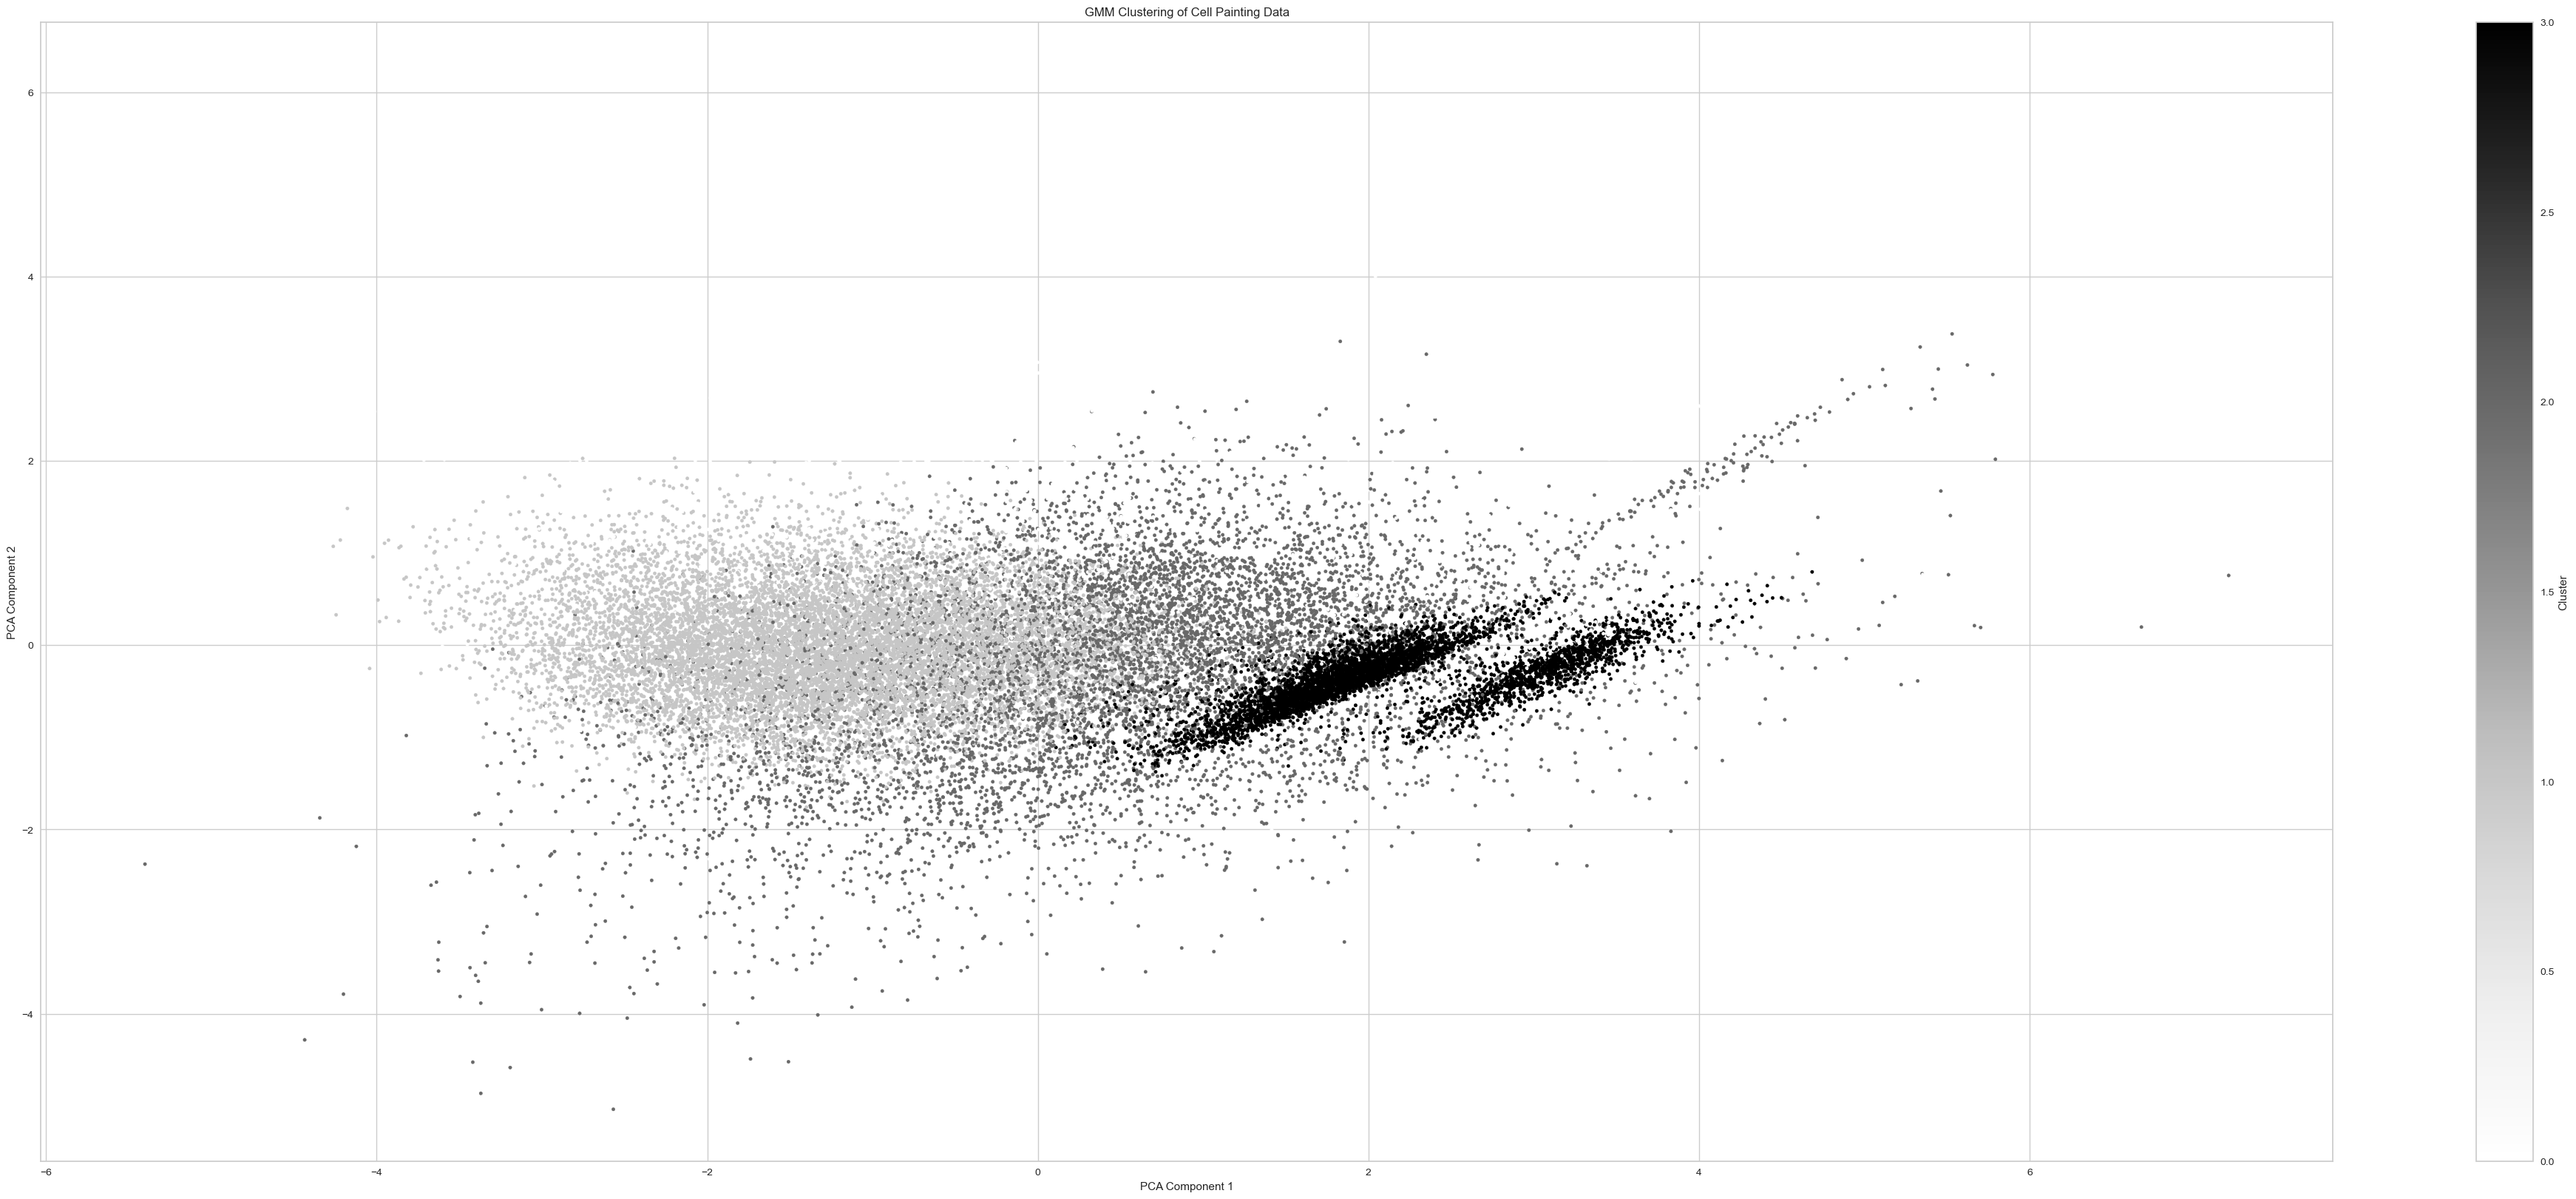

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Fit GMM
n_clusters = 4  # Set the number of clusters (or use AIC/BIC to decide)
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(data_scaled)

# Add cluster labels to the DataFrame
data_combined_norm['Cluster'] = gmm.predict(data_scaled)



In [112]:
data_combined_norm['Cluster']

0        1
1        2
2        2
3        1
4        1
        ..
32809    1
32810    1
32811    1
32812    2
32813    1
Name: Cluster, Length: 27859, dtype: int64

In [113]:
data_scaled

array([[-0.78370522, -0.21371685, -0.63953888, -0.8840216 ,  0.22697421],
       [-0.91045695,  0.71292845,  1.02588016,  1.79318799, -0.9717113 ],
       [-1.09314817,  0.19352898,  0.50072908,  0.57658274, -0.20757071],
       ...,
       [ 0.54863555,  0.812197  , -0.55067369, -0.38105463,  1.05360816],
       [-0.47906467,  1.02746907,  1.06747219,  1.66624684, -1.61488127],
       [ 1.25176228,  2.02637416, -1.12087035, -0.48519736,  0.96062631]])

In [116]:
from umap import UMAP
umap = UMAP(n_components=2, random_state=42)
data_umap = umap.fit_transform(data_scaled)

df_umap = pd.DataFrame(data_umap, columns=["UMAP1", "UMAP2"])
clusters = data_combined_norm['Cluster']
df_umap["Cluster"] = clusters

# Define cluster colors and labels
cluster_labels = {0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4"}
df_umap["Cluster Label"] = df_umap["Cluster"].map(cluster_labels)



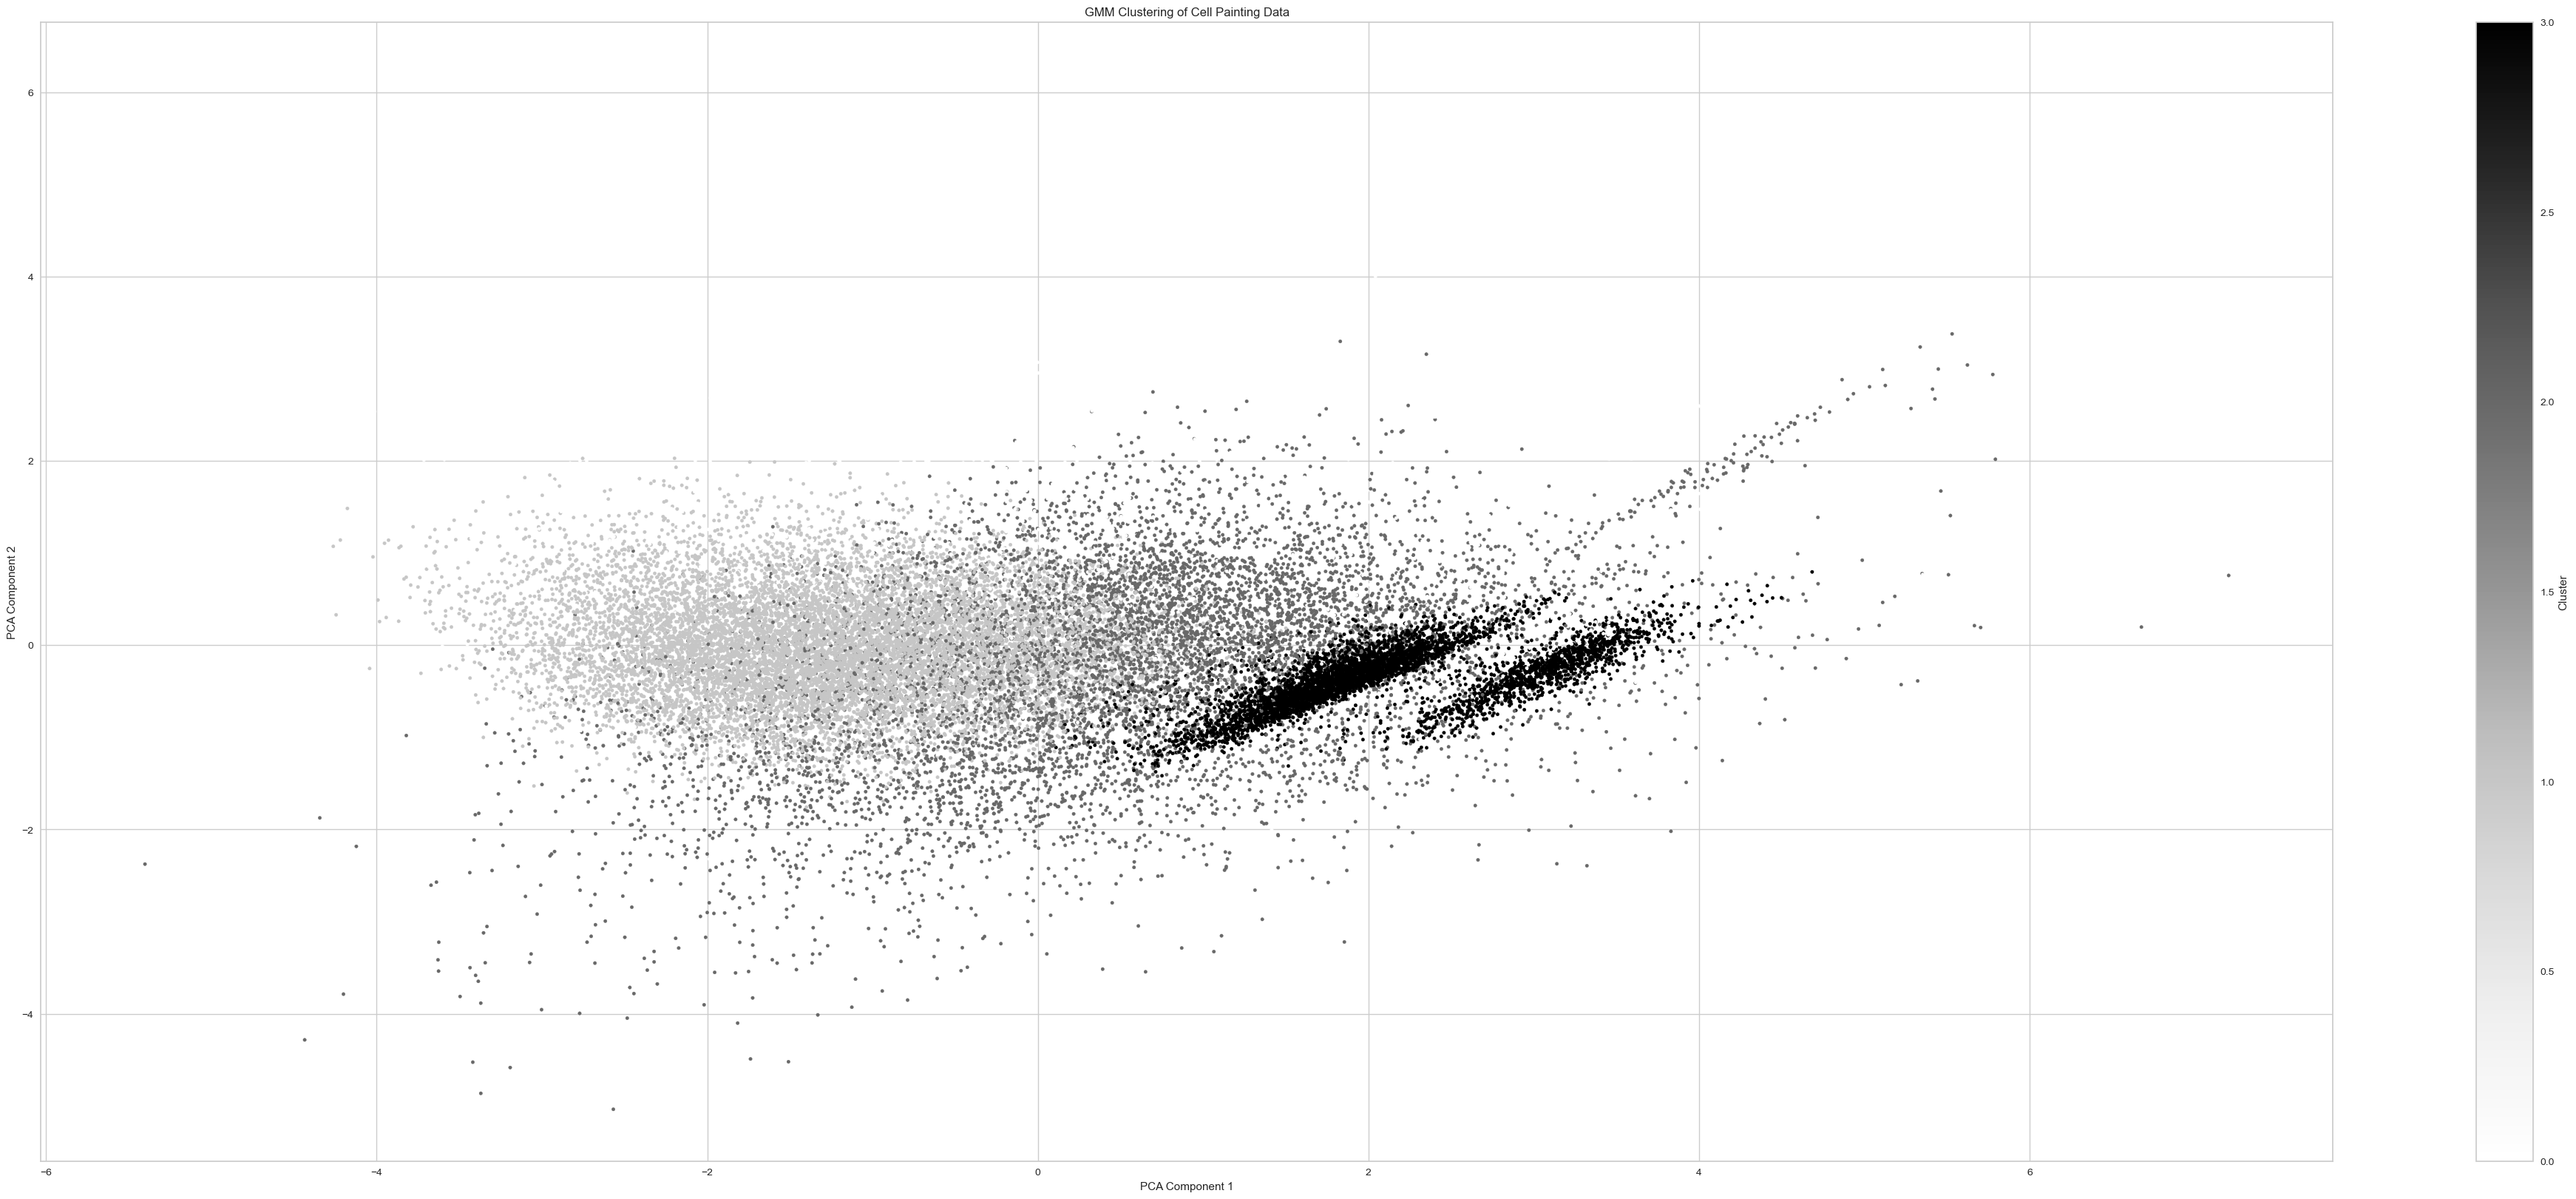

In [119]:
# Plot the clusters (2D PCA representation)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_combined_norm['Cluster'], s=10)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Clustering of Cell Painting Data')
plt.colorbar(label='Cluster')
plt.show()

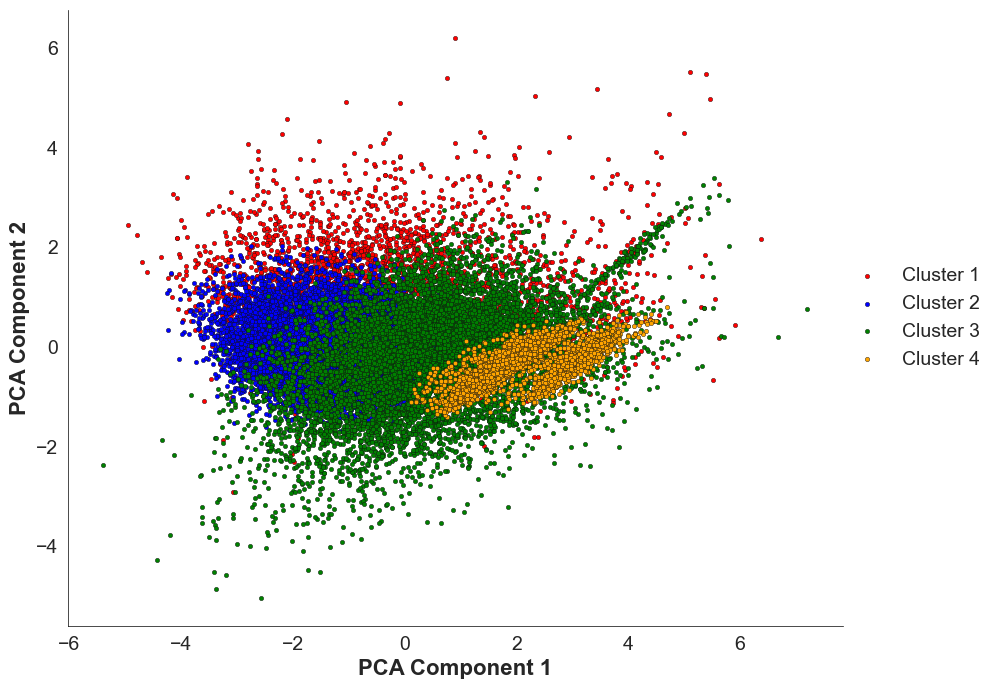

In [ ]:
# Define cluster colors and labels
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}
cluster_labels = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'}

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 8))
for cluster, color in cluster_colors.items():
    cluster_data = data_pca[data_combined_norm['Cluster'] == cluster]
    plt.scatter(
        cluster_data[:, 0],  # PCA Component 1 for current cluster
        cluster_data[:, 1],  # PCA Component 2 for current cluster
        c=color, label=cluster_labels[cluster], s=10, edgecolor='k'
    )

# Customize the axes
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

# Remove the grid and title
plt.grid(False)
plt.title(None)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
# Add axis labels and legend
plt.xlabel('PCA Component 1', fontweight='bold',fontsize=16)
plt.ylabel('PCA Component 2', fontweight='bold', fontsize=16)
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), frameon=False, fontsize=14)

# Show the plot
plt.show()


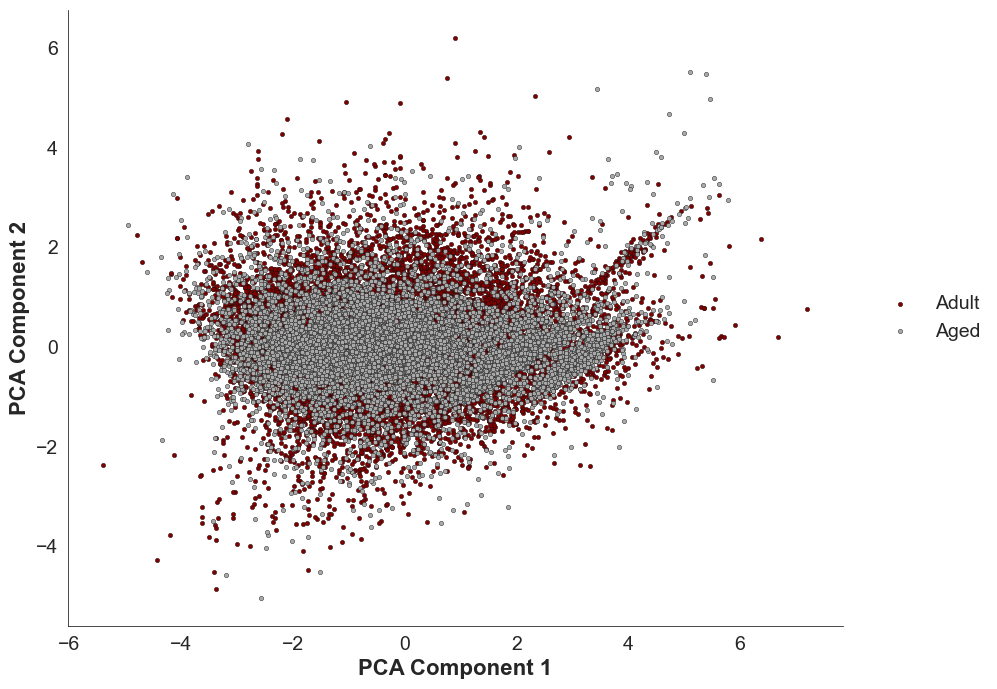

In [ ]:
# Define age colors
age_colors = {'Adult': 'maroon', 'Aged': 'darkgrey'}

# Create a scatter plot for the PCA data, colored by Age
plt.figure(figsize=(10, 8))
for age, color in age_colors.items():
    age_data = data_pca[data_combined_norm['Age'] == age]
    plt.scatter(
        age_data[:, 0],  # PCA Component 1
        age_data[:, 1],  # PCA Component 2
        c=color, label=age, s=10, edgecolor='k'
    )

# Customize the axes
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

# Remove the grid and adjust tick size
plt.grid(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add bold axis labels and legend
plt.xlabel('PCA Component 1', fontweight='bold', fontsize=16)
plt.ylabel('PCA Component 2', fontweight='bold', fontsize=16)
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), frameon=False, fontsize=14)

# Show the plot
plt.show()

In [152]:
df = data_combined_norm.drop(['Exp', 'Well ID', 'Field', 'Sample', 'Type'], axis=1)
df

Age  DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0      Adult                    -0.783705                    2.542040   
1      Adult                    -0.910457                   -0.473816   
2      Adult                    -1.093148                   -0.039383   
3      Adult                    -0.178546                    0.105856   
4      Adult                     0.418331                    0.086726   
...      ...                          ...                         ...   
32809   Aged                    -0.417060                   -0.490365   
32810   Aged                     0.124264                   -0.182414   
32811   Aged                     0.548636                   -0.245518   
32812   Aged                    -0.479065                   -0.229669   
32813   Aged                     1.251762                    0.365214   

       Actin texture spot  Actin texture hole  Actin texture edge  \
0               -0.884022           -0.639539           -0.194944   
1                1.793188            1.025880           -0.370231   
2                0.576583            0.500729            1.157650   
3               -0.239160           -0.110772           -0.373373   
4               -0.899873           -0.848343            0.289387   
...                   ...                 ...                 ...   
32809           -0.269255           -0.468097            1.723958   
32810           -0.471918           -0.942205            2.048375   
32811           -0.381055           -0.550674            1.760522   
32812            1.666247            1.067472            1.354663   
32813           -0.485197           -1.120870            2.441989   

       Actin texture ridge  Actin texture valley  Actin texture saddle  \
0                -0.336072             -0.521879             -0.301419   
1                 0.997739              0.820882              1.078701   
2                 1.332159              1.164076              1.370565   
3                 0.030276             -0.104184             -0.118530   
4                 0.216407             -0.347816             -0.195624   
...                    ...                   ...                   ...   
32809             0.962979              0.878579              0.855704   
32810             0.461935              0.755366              1.340494   
32811             1.014772              0.917151              0.908002   
32812             1.720939              1.777083              1.795466   
32813             1.396419              1.189016              1.455981   

       Actin texture bright  ...  Mito texture dark  \
0                 -0.527047  ...          -0.366687   
1                  1.287550  ...           1.334616   
2                  1.170446  ...           0.155476   
3                 -0.052313  ...           0.746854   
4                 -0.110765  ...           0.178208   
...                     ...  ...                ...   
32809              0.411747  ...           0.955554   
32810              0.037483  ...           0.322326   
32811              0.375215  ...           0.053524   
32812              1.735571  ...           0.961739   
32813              0.567173  ...           1.273143   

       Actin cyto intensity mean  Actin cyto intensity sum  \
0                       0.765768                  1.367910   
1                      -0.355484                 -0.466869   
2                       0.459249                  0.189224   
3                       0.088522                 -0.379244   
4                       0.395575                 -0.239931   
...                          ...                       ...   
32809                  -0.023524                 -0.200335   
32810                   2.091137                  0.440747   
32811                   0.841748                 -0.423173   
32812                  -1.090610                 -0.047294   
32813                   3.135938                  0.515289   

       M

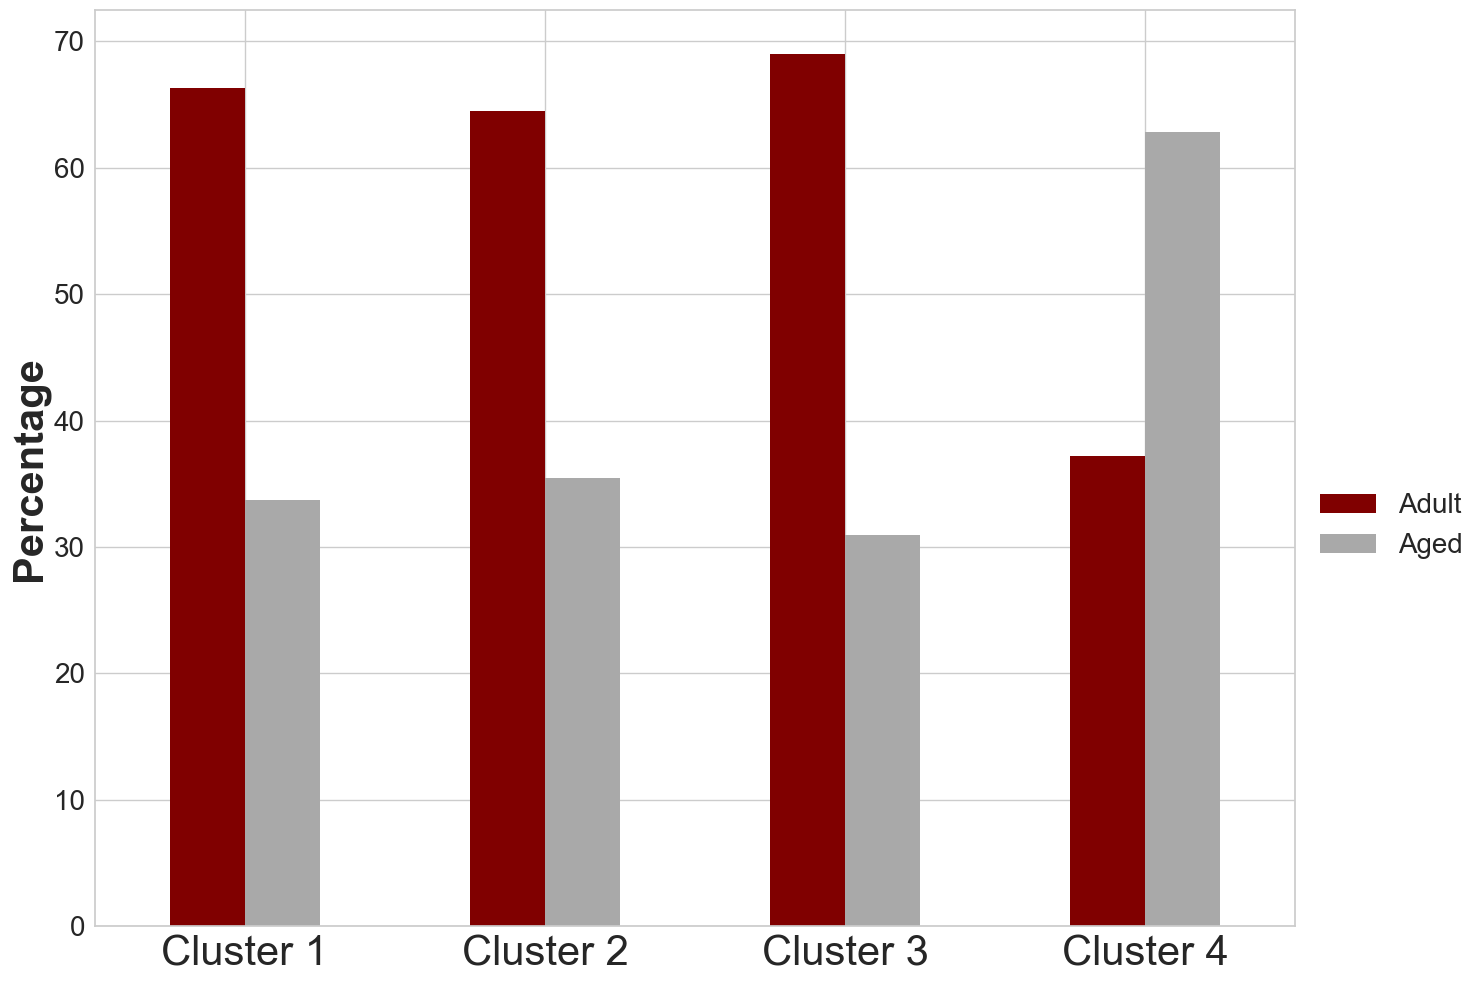

In [167]:
import matplotlib.pyplot as plt

# Assuming `df` contains the cluster and age data
# Define a color map for "Adult" and "Aged"
age_color_map = {'Adult': 'maroon', 'Aged': 'darkgrey'}

# Calculate the percentages of "Adult" and "Aged" within each cluster
percentages = df.groupby(['Cluster', 'Age']).size().unstack().apply(lambda x: x * 100 / float(x.sum()), axis=1)

# Map custom labels for the clusters
cluster_labels = {0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4"}
percentages.index = percentages.index.map(cluster_labels)

# Plot the histogram
plt.rcParams["figure.figsize"] = (15, 10)
ax = percentages.plot.bar(stacked=False, fontsize=20, color=age_color_map)

# Customize the plot
plt.ylabel("Percentage", fontsize=30,fontweight="bold")
plt.xlabel(None)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=20)
ax.legend(fontsize=20, bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Show the plot
plt.show()



In [172]:
np.unique(list(df['Cluster']))

array([0, 1, 2, 3])

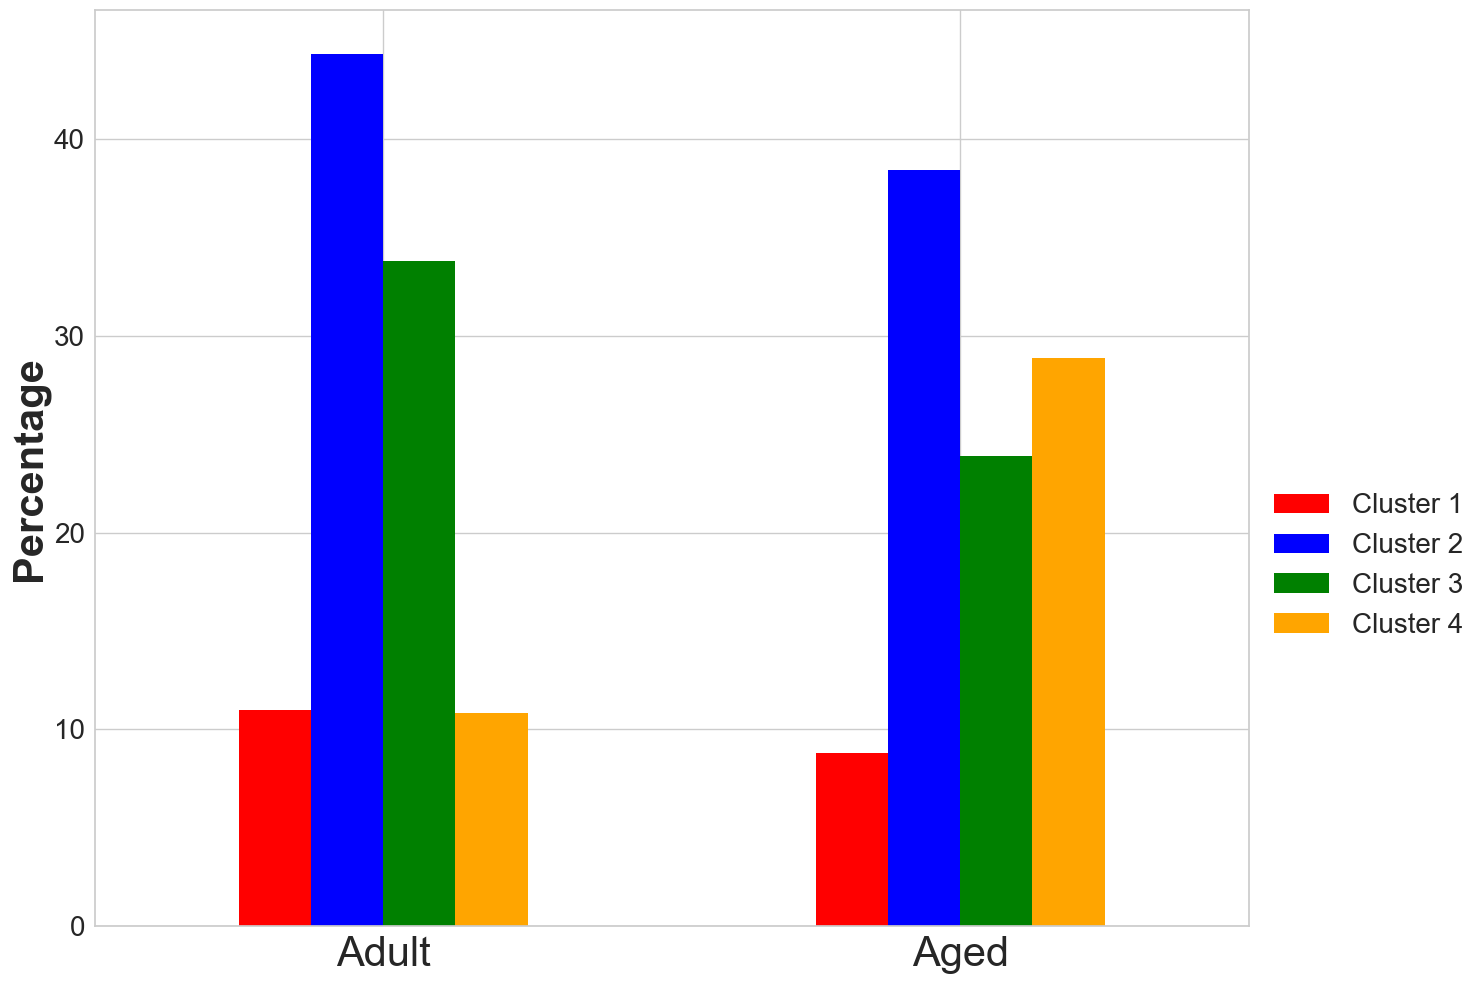

In [179]:
import matplotlib.pyplot as plt

# Assuming `df` contains the cluster and age data
# Define a color map for the clusters
cluster_color_map = {"Cluster 1": 'red', "Cluster 2": 'blue', "Cluster 3": 'green', "Cluster 4": 'orange'}
cluster_labels = {0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4"}

# Calculate the percentages of each cluster within "Adult" and "Aged"
percentages = df.groupby(['Age', 'Cluster']).size().unstack().apply(lambda x: x * 100 / float(x.sum()), axis=1)

# Map custom labels for clusters
percentages.columns = percentages.columns.map(cluster_labels)

# Plot the histogram
plt.rcParams["figure.figsize"] = (15, 10)
ax = percentages.plot.bar(stacked=False, fontsize=20, color=[cluster_color_map[col] for col in percentages.columns])

# Customize the plot
plt.ylabel("Percentage", fontsize=30,fontweight="bold")
plt.xlabel(None)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=20)
ax.legend(fontsize=20, bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Show the plot
plt.show()


## Cluster feature importance

In [181]:
df = data_combined_norm.drop(['Exp', 'Well ID', 'Field', 'Sample', 'Type'], axis=1)
df

Age  DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0      Adult                    -0.783705                    2.542040   
1      Adult                    -0.910457                   -0.473816   
2      Adult                    -1.093148                   -0.039383   
3      Adult                    -0.178546                    0.105856   
4      Adult                     0.418331                    0.086726   
...      ...                          ...                         ...   
32809   Aged                    -0.417060                   -0.490365   
32810   Aged                     0.124264                   -0.182414   
32811   Aged                     0.548636                   -0.245518   
32812   Aged                    -0.479065                   -0.229669   
32813   Aged                     1.251762                    0.365214   

       Actin texture spot  Actin texture hole  Actin texture edge  \
0               -0.884022           -0.639539           -0.194944   
1                1.793188            1.025880           -0.370231   
2                0.576583            0.500729            1.157650   
3               -0.239160           -0.110772           -0.373373   
4               -0.899873           -0.848343            0.289387   
...                   ...                 ...                 ...   
32809           -0.269255           -0.468097            1.723958   
32810           -0.471918           -0.942205            2.048375   
32811           -0.381055           -0.550674            1.760522   
32812            1.666247            1.067472            1.354663   
32813           -0.485197           -1.120870            2.441989   

       Actin texture ridge  Actin texture valley  Actin texture saddle  \
0                -0.336072             -0.521879             -0.301419   
1                 0.997739              0.820882              1.078701   
2                 1.332159              1.164076              1.370565   
3                 0.030276             -0.104184             -0.118530   
4                 0.216407             -0.347816             -0.195624   
...                    ...                   ...                   ...   
32809             0.962979              0.878579              0.855704   
32810             0.461935              0.755366              1.340494   
32811             1.014772              0.917151              0.908002   
32812             1.720939              1.777083              1.795466   
32813             1.396419              1.189016              1.455981   

       Actin texture bright  ...  Mito texture dark  \
0                 -0.527047  ...          -0.366687   
1                  1.287550  ...           1.334616   
2                  1.170446  ...           0.155476   
3                 -0.052313  ...           0.746854   
4                 -0.110765  ...           0.178208   
...                     ...  ...                ...   
32809              0.411747  ...           0.955554   
32810              0.037483  ...           0.322326   
32811              0.375215  ...           0.053524   
32812              1.735571  ...           0.961739   
32813              0.567173  ...           1.273143   

       Actin cyto intensity mean  Actin cyto intensity sum  \
0                       0.765768                  1.367910   
1                      -0.355484                 -0.466869   
2                       0.459249                  0.189224   
3                       0.088522                 -0.379244   
4                       0.395575                 -0.239931   
...                          ...                       ...   
32809                  -0.023524                 -0.200335   
32810                   2.091137                  0.440747   
32811                   0.841748                 -0.423173   
32812                  -1.090610                 -0.047294   
32813                   3.135938                  0.515289   

       M

In [187]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `data_combined_norm` contains features and cluster labels
X = data_combined_norm.drop(columns=['Cluster', 'Age'])  # Features
y = data_combined_norm['Cluster']  # Cluster labels

clusters = y.unique()  # Unique cluster labels
top_features_per_cluster = {}

for cluster in clusters:
    print(f"\nAnalyzing Cluster {cluster}...")
    
    # Create a binary target: 1 for the current cluster, 0 for all others
    binary_target = (y == cluster).astype(int)
    
    # Train a Random Forest model
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_model.fit(X, binary_target)
    
    # Get feature importance
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    # Store the top 10 features for the cluster
    top_features_per_cluster[cluster] = feature_importances.head(10)
    
    # Print the top features
    print(f"Top 10 Features for Cluster {cluster}:")
    print(feature_importances.head(10))
    
    # Plot the top features
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10])
    plt.xlabel("Feature Importance", fontsize=14)
    plt.ylabel("Features", fontsize=14)
    plt.title(f"Top 10 Features for Cluster {cluster}", fontsize=16)
    plt.gca().invert_yaxis()
    plt.show()




Analyzing Cluster 1...


ValueError: setting an array element with a sequence.


Top 10 Features for Cluster 1:
                        Feature  SHAP Importance
2            Actin texture spot         2.255179
3            Actin texture hole         1.770332
11            Mito texture edge         1.664674
0   DAPI nucleus intensity mean         0.602544
22               Cell roundness         0.164393
1    DAPI nucleus intensity sum         0.117960
6          Actin texture valley         0.092257
8          Actin texture bright         0.083865
19     Mito cyto intensity mean         0.068838
21                    Cell area         0.063055


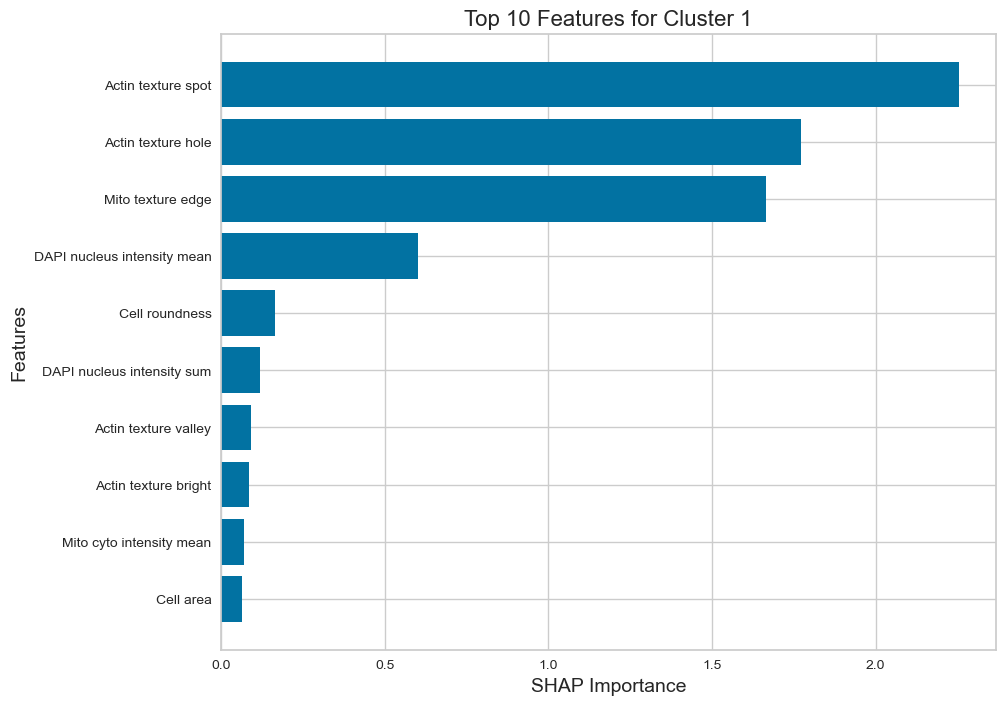


Top 10 Features for Cluster 2:
                        Feature  SHAP Importance
11            Mito texture edge         1.110845
3            Actin texture hole         0.847212
2            Actin texture spot         0.845062
0   DAPI nucleus intensity mean         0.653365
22               Cell roundness         0.303482
1    DAPI nucleus intensity sum         0.093598
12           Mito texture ridge         0.086726
19     Mito cyto intensity mean         0.071886
5           Actin texture ridge         0.068546
8          Actin texture bright         0.067070


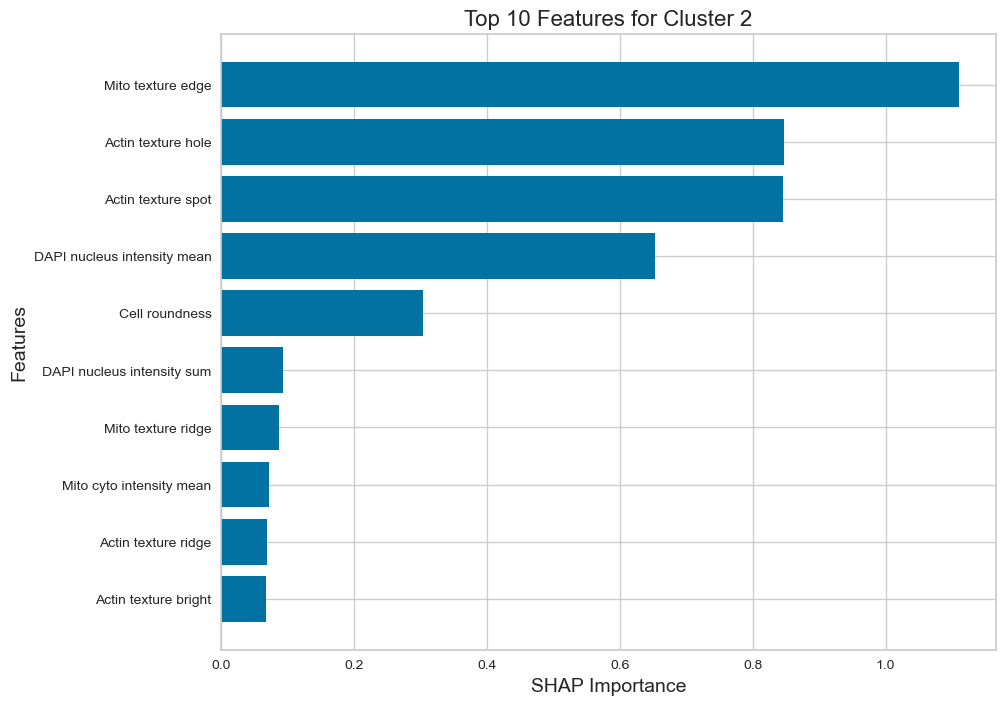


Top 10 Features for Cluster 0:
                        Feature  SHAP Importance
2            Actin texture spot         2.985316
0   DAPI nucleus intensity mean         2.675337
3            Actin texture hole         1.038478
7          Actin texture saddle         0.862081
11            Mito texture edge         0.841990
4            Actin texture edge         0.588814
6          Actin texture valley         0.204556
8          Actin texture bright         0.182578
24                  Cell length         0.132044
17    Actin cyto intensity mean         0.127518


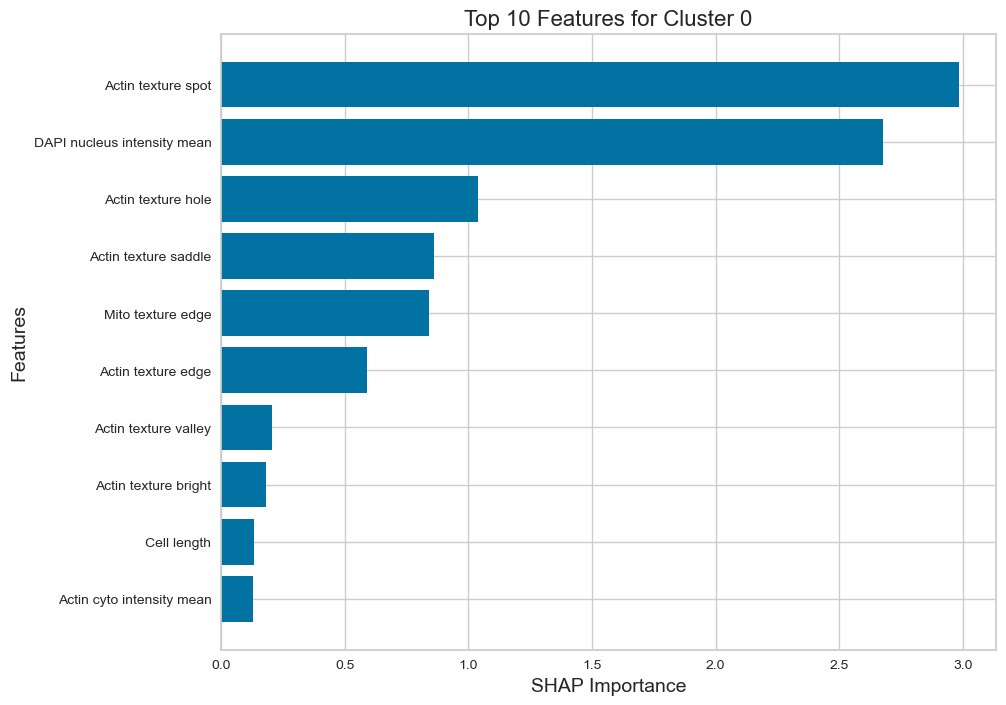


Top 10 Features for Cluster 3:
                        Feature  SHAP Importance
0   DAPI nucleus intensity mean         4.530906
11            Mito texture edge         3.282750
2            Actin texture spot         0.529560
17    Actin cyto intensity mean         0.447057
22               Cell roundness         0.262346
4            Actin texture edge         0.250400
13          Mito texture valley         0.236178
8          Actin texture bright         0.194331
3            Actin texture hole         0.191421
5           Actin texture ridge         0.138675


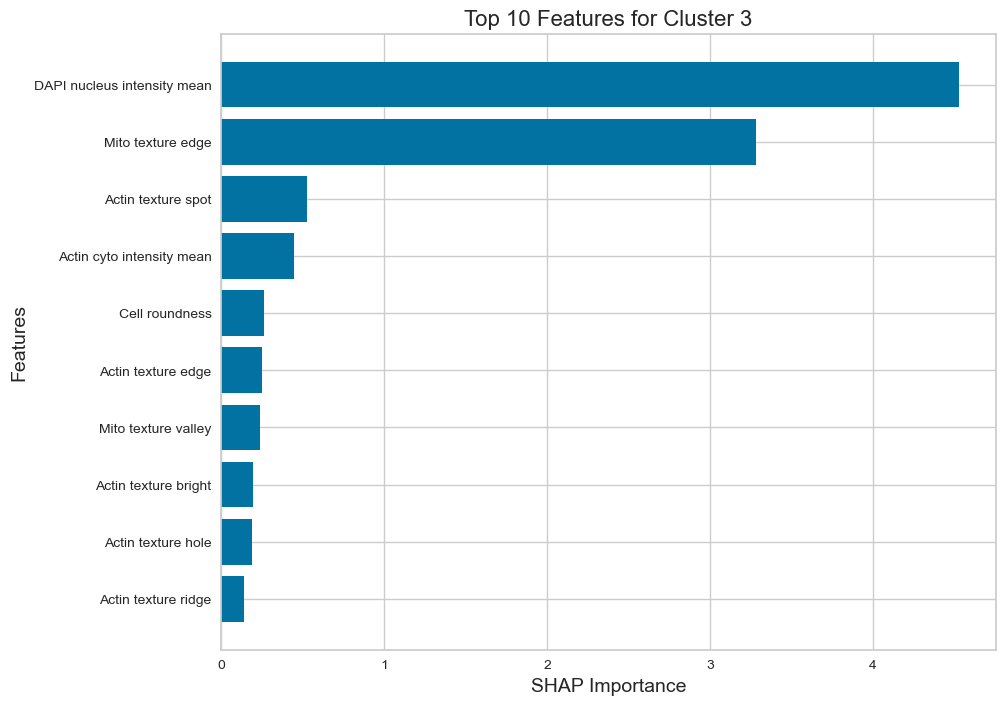

In [186]:
for cluster in clusters:
    # Filter test data for the current cluster
    cluster_indices = np.where(y_test == cluster)[0]
    cluster_shap_values = shap_values[cluster_indices]  # Subset SHAP values for the cluster
    cluster_data = X_test.iloc[cluster_indices]

    # Summarize SHAP values for the current cluster
    shap_sum = np.abs(cluster_shap_values.values).mean(axis=0)  # Mean absolute SHAP values for features

    # Ensure `shap_sum` is 1D and matches the feature dimensions
    feature_importances = pd.DataFrame({
        'Feature': X_test.columns,
        'SHAP Importance': shap_sum[:, cluster]  # Select the importance for the specific cluster
    }).sort_values(by='SHAP Importance', ascending=False)

    # Store the top 10 features for the cluster
    top_features_per_cluster[cluster] = feature_importances.head(10)

    # Display the results
    print(f"\nTop 10 Features for Cluster {cluster}:")
    print(feature_importances.head(10))

    # Plot top 10 features for this cluster
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importances['Feature'][:10], feature_importances['SHAP Importance'][:10])
    plt.xlabel("SHAP Importance", fontsize=14)
    plt.ylabel("Features", fontsize=14)
    plt.title(f"Top 10 Features for Cluster {cluster}", fontsize=16)
    plt.gca().invert_yaxis()
    plt.show()

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

def cluster_feat_importance_data(clustering_data_df, cluster_label_column, relevant_features, num_features=5):
    """
    Identify top features for each cluster using Random Forest feature importance.
    Standardize the features for visualization and group data by clusters.

    Parameters:
    clustering_data_df (pd.DataFrame): DataFrame containing features and clustering labels.
    cluster_label_column (str): Name of the column with cluster labels.
    relevant_features (list): List of features to be used for clustering and importance calculation.
    num_features (int): Number of top features to select for each cluster.

    Returns:
    dict: Dictionary where keys are cluster labels and values are DataFrames with scaled features and metadata.
    """
    dict_data = {}

    for cluster in sorted(list(np.unique(clustering_data_df[cluster_label_column]))):
        print(f"Processing Cluster {cluster}...")

        # Create a binary target for the current cluster
        y = np.where(clustering_data_df[cluster_label_column] == cluster, 1, 0)

        # Train a Random Forest Classifier
        clf = RandomForestClassifier(random_state=1, n_estimators=100)
        clf.fit(clustering_data_df.loc[:, relevant_features], y)

        # Calculate feature importance
        base_imp = pd.DataFrame(clf.feature_importances_, index=relevant_features, columns=["MDI"])
        base_imp = base_imp.reset_index().rename(columns={"index": "Features"})
        base_imp = base_imp.sort_values("MDI", ascending=False)

        # Select top features
        list_of_cluster_features = list(base_imp['Features'][:num_features])

        # Filter the DataFrame for the current cluster
        relevant_data_df = clustering_data_df[clustering_data_df[cluster_label_column] == cluster]
        age_labels = list(relevant_data_df['Age'])
        sample_labels = list(relevant_data_df['Sample'])
        exp_labels = list(relevant_data_df['Exp'])

        # Extract and scale the top features
        relevant_data_df = relevant_data_df.loc[:, list_of_cluster_features]
        scaled_features = StandardScaler().fit_transform(relevant_data_df)
        vis_df = pd.DataFrame(scaled_features, columns=relevant_data_df.columns)

        # Add metadata
        vis_df['Age'] = age_labels
        #vis_df['Sample'] = sample_labels
        #vis_df['Exp'] = exp_labels

        # Store the processed data for the cluster
        dict_data[cluster] = vis_df

        # Print top features for the cluster
        print(f"Top {num_features} Features for Cluster {cluster}:")
        print(base_imp.head(num_features))

    return dict_data


In [201]:
dict_clusters = cluster_feat_importance_data(data_combined_norm, cluster_label_column= "Cluster", relevant_features=relevant_features)

Processing Cluster 0...
Top 5 Features for Cluster 0:
                      Features       MDI
0  DAPI nucleus intensity mean  0.138809
7         Actin texture saddle  0.137035
4           Actin texture edge  0.108285
2           Actin texture spot  0.097696
3           Actin texture hole  0.074817
Processing Cluster 1...
Top 5 Features for Cluster 1:
                       Features       MDI
3            Actin texture hole  0.189589
2            Actin texture spot  0.182777
11            Mito texture edge  0.136501
8          Actin texture bright  0.071117
0   DAPI nucleus intensity mean  0.064225
Processing Cluster 2...
Top 5 Features for Cluster 2:
                       Features       MDI
11            Mito texture edge  0.127913
0   DAPI nucleus intensity mean  0.124187
3            Actin texture hole  0.122224
2            Actin texture spot  0.084234
1    DAPI nucleus intensity sum  0.058839
Processing Cluster 3...
Top 5 Features for Cluster 3:
                       Features   

In [202]:
dict_clusters[0]

DAPI nucleus intensity mean  Actin texture saddle  Actin texture edge  \
0                        0.609059             -0.183022            0.099966   
1                        0.054517              0.059326           -0.583414   
2                        0.602236             -0.604098           -1.474172   
3                        0.196632             -0.508292           -0.374229   
4                        0.989468             -0.577135           -0.835576   
...                           ...                   ...                 ...   
2823                    -1.246271              0.890597            0.100151   
2824                    -0.674108              0.130907           -0.536579   
2825                     0.820149             -1.071084           -0.760178   
2826                    -0.316750              0.374591            1.140475   
2827                    -0.390726              1.748695            3.033486   

      Actin texture spot  Actin texture hole    Age  
0              -0.500466            0.002818  Adult  
1               0.389639            0.893815  Adult  
2               0.291895            2.396702  Adult  
3              -0.466944           -0.404030  Adult  
4              -0.240129            1.054787  Adult  
...                  ...                 ...    ...  
2823            0.387006           -0.191697   Aged  
2824            0.167967           -0.020347   Aged  
2825           -0.779784            0.158653   Aged  
2826           -0.447112           -1.114020   Aged  
2827            0.257302           -0.640634   Aged  

[2828 rows x 6 columns]

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import os

def viz_cluster_feat(df,title, save_name):

    indiv_data = df.groupby(by=['Age']).mean()

    yerr = df.groupby('Age').sem().T

    bar_val = df.groupby('Age').mean().T

    x = np.arange(len(indiv_data.columns))  

    width = 0.25  
    multiplier = 0

    fig, ax = plt.subplots(figsize=(40, 20), layout='constrained')

    error_bar_settings = dict(
            ecolor='black',         # Edge color of the error bars
            elinewidth=2,         # Line width of the error bars
            capsize=5,           # Width of the caps on the error bars
            capthick=2            # Thickness of the cap lines
        )

    for attribute in bar_val.columns:
        measurement = bar_val[attribute]
        offset = width * multiplier
        # Get the color for the current attribute
        color = age_color_map.get(attribute, 'black')
        rects = ax.bar(
            x + offset, measurement, width, label=attribute,
            yerr=yerr[attribute], capsize=20, color=color, error_kw=error_bar_settings, alpha=0.6
        )
        multiplier += 1

    # # Now plot the scatter points (individual data)
    # multiplier = 0
    # jitter_factor = 0.4
    # for attribute in bar_val.columns:
    #     offset = width * multiplier
    #     color = age_color_map.get(attribute, 'black')

        
    #     for i, variable in enumerate(bar_val.index):
    #         # Check if the attribute exists in the data
    #         if attribute in indiv_data.index.get_level_values('Age').unique():
    #             # Get individual data points
    #             data_points = indiv_data.loc[attribute][variable].values
    #             x_positions = x[i] + offset + (np.random.rand(len(data_points)) - 0.5) * width * jitter_factor
    #             ax.scatter(x_positions, data_points, color='black', zorder=10)
    #     multiplier += 1

    ax.set_xticks(x + width, bar_val.index)
    ax.tick_params(axis='x', labelsize=35)
    ax.legend(fontsize=40, bbox_to_anchor=(1, 0.6))
    plt.yticks(fontsize=30)
    ax.set_ylabel('Mean (+/- SE)', fontsize=40, fontweight="bold")
    plt.title(title, fontsize=50, fontweight="bold")
    plt.show()
     

    if save_name:

        file_name = os.getcwd() + '/figures/' + save_name

        fig.savefig(file_name, dpi=600, bbox_inches='tight')



In [208]:
dict_clusters[0]

DAPI nucleus intensity mean  Actin texture saddle  Actin texture edge  \
0                        0.609059             -0.183022            0.099966   
1                        0.054517              0.059326           -0.583414   
2                        0.602236             -0.604098           -1.474172   
3                        0.196632             -0.508292           -0.374229   
4                        0.989468             -0.577135           -0.835576   
...                           ...                   ...                 ...   
2823                    -1.246271              0.890597            0.100151   
2824                    -0.674108              0.130907           -0.536579   
2825                     0.820149             -1.071084           -0.760178   
2826                    -0.316750              0.374591            1.140475   
2827                    -0.390726              1.748695            3.033486   

      Actin texture spot  Actin texture hole    Age  
0              -0.500466            0.002818  Adult  
1               0.389639            0.893815  Adult  
2               0.291895            2.396702  Adult  
3              -0.466944           -0.404030  Adult  
4              -0.240129            1.054787  Adult  
...                  ...                 ...    ...  
2823            0.387006           -0.191697   Aged  
2824            0.167967           -0.020347   Aged  
2825           -0.779784            0.158653   Aged  
2826           -0.447112           -1.114020   Aged  
2827            0.257302           -0.640634   Aged  

[2828 rows x 6 columns]

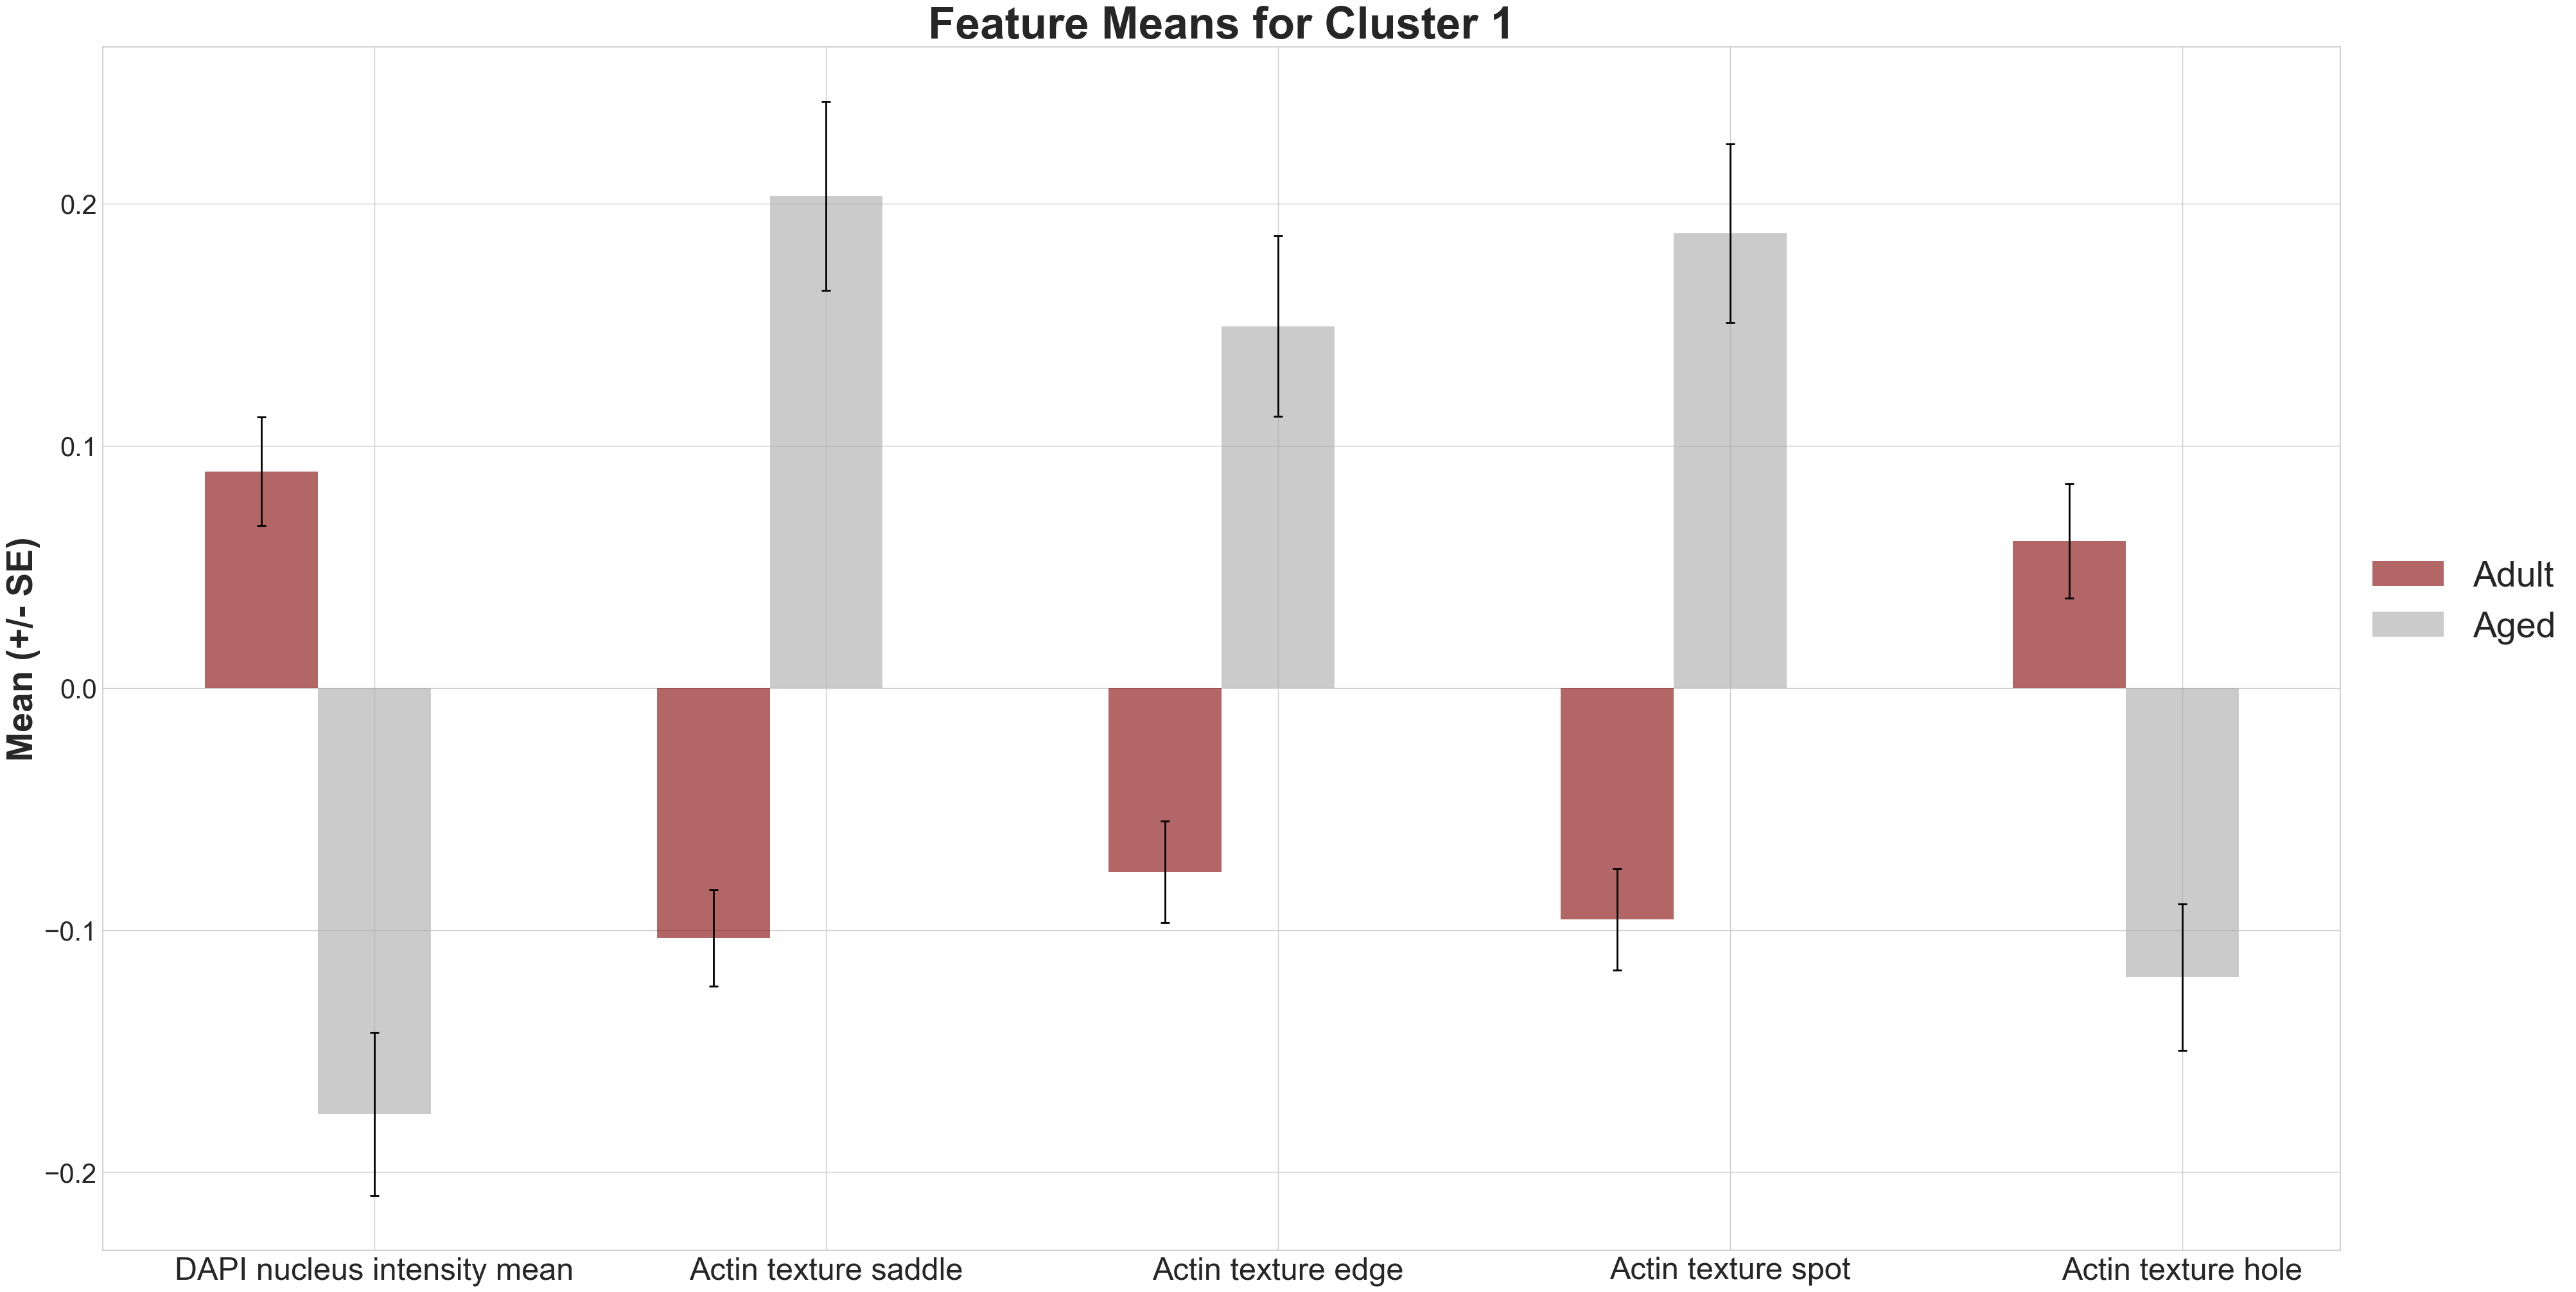

In [209]:
viz_cluster_feat(dict_clusters[0],"Feature Means for Cluster 1", None)

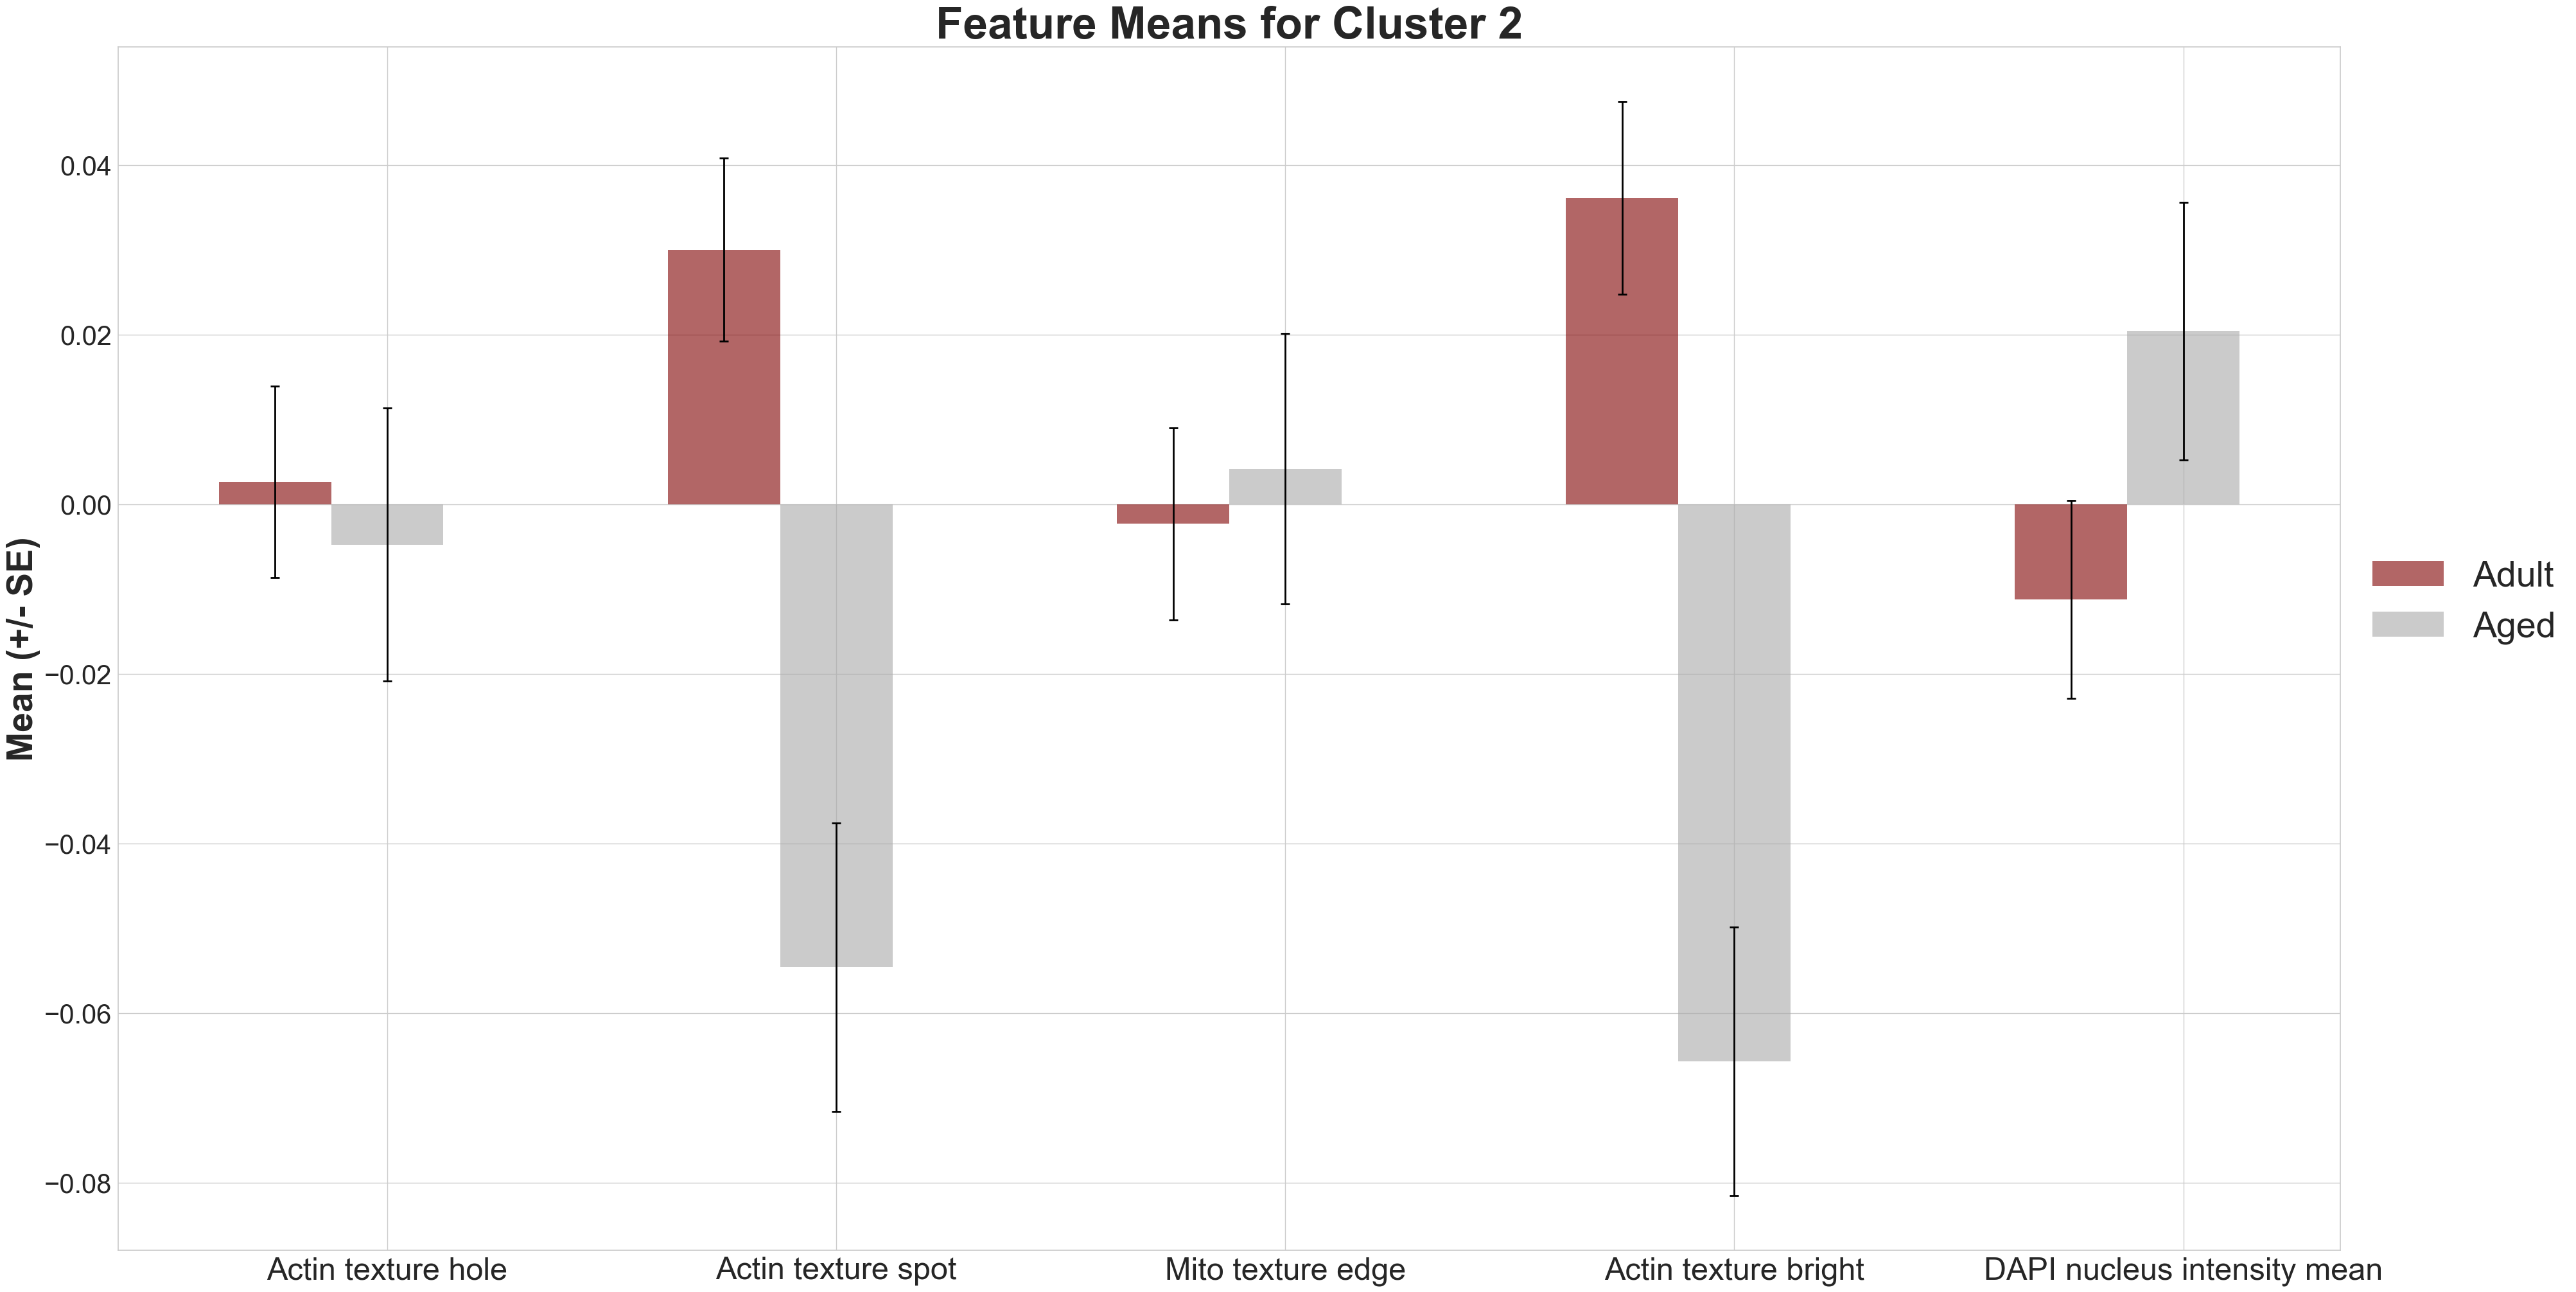

In [211]:
viz_cluster_feat(dict_clusters[1],"Feature Means for Cluster 2", None)

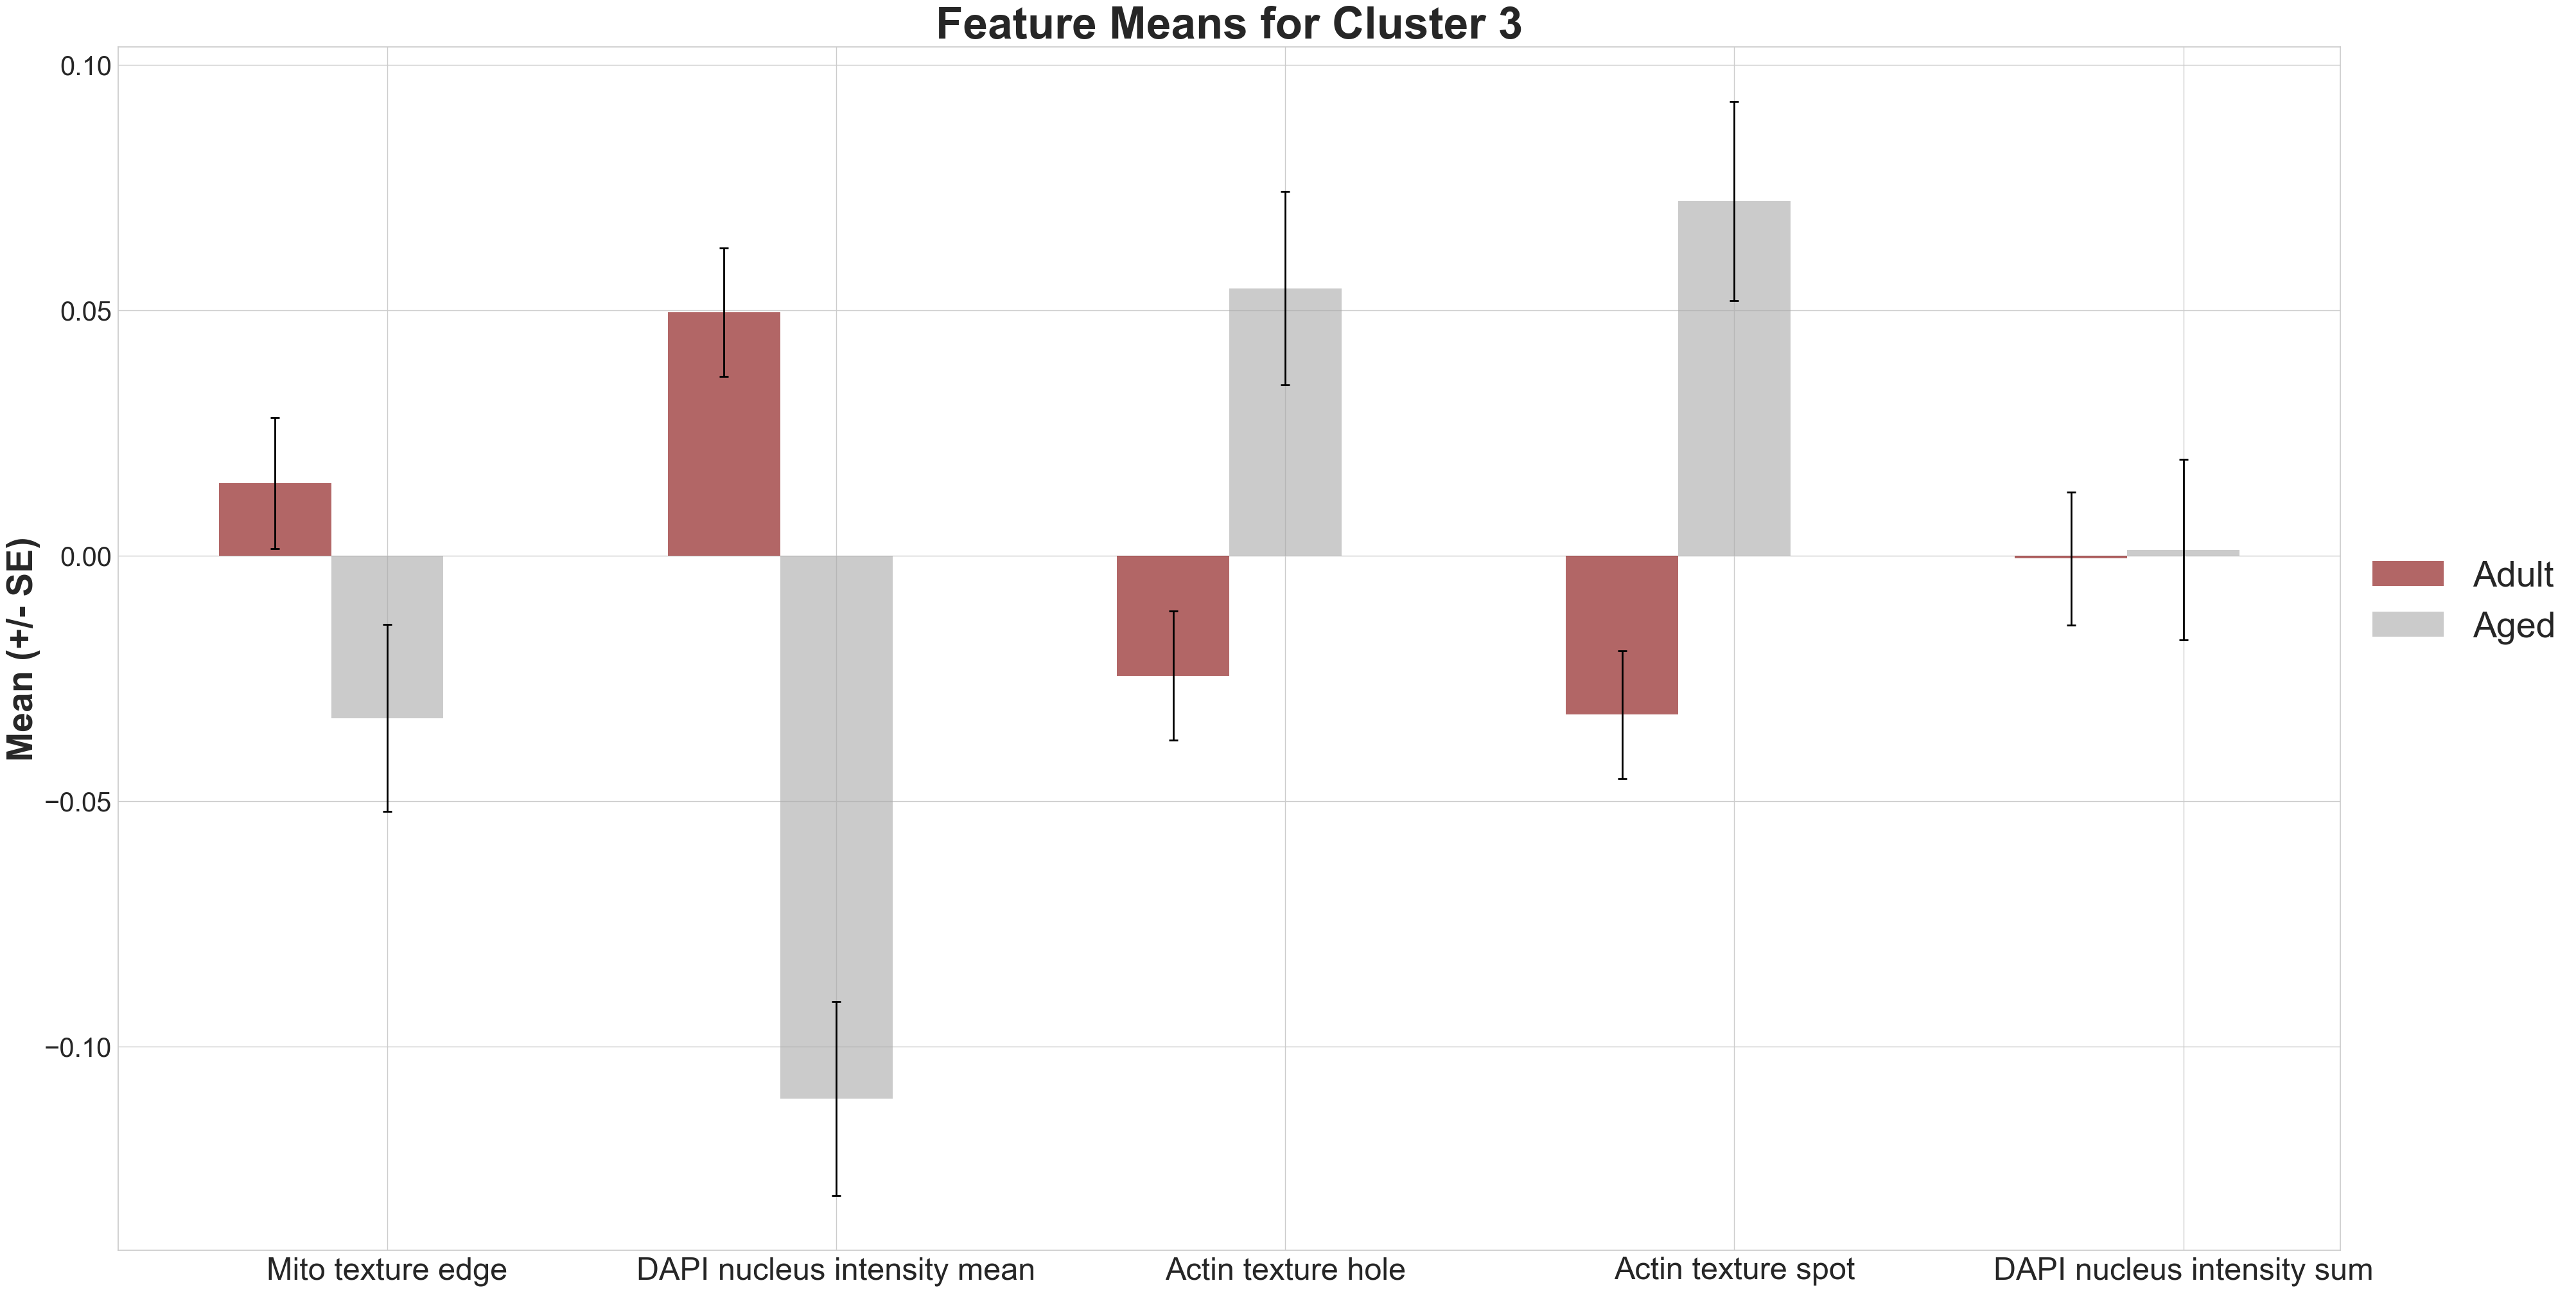

In [212]:
viz_cluster_feat(dict_clusters[2],"Feature Means for Cluster 3", None)

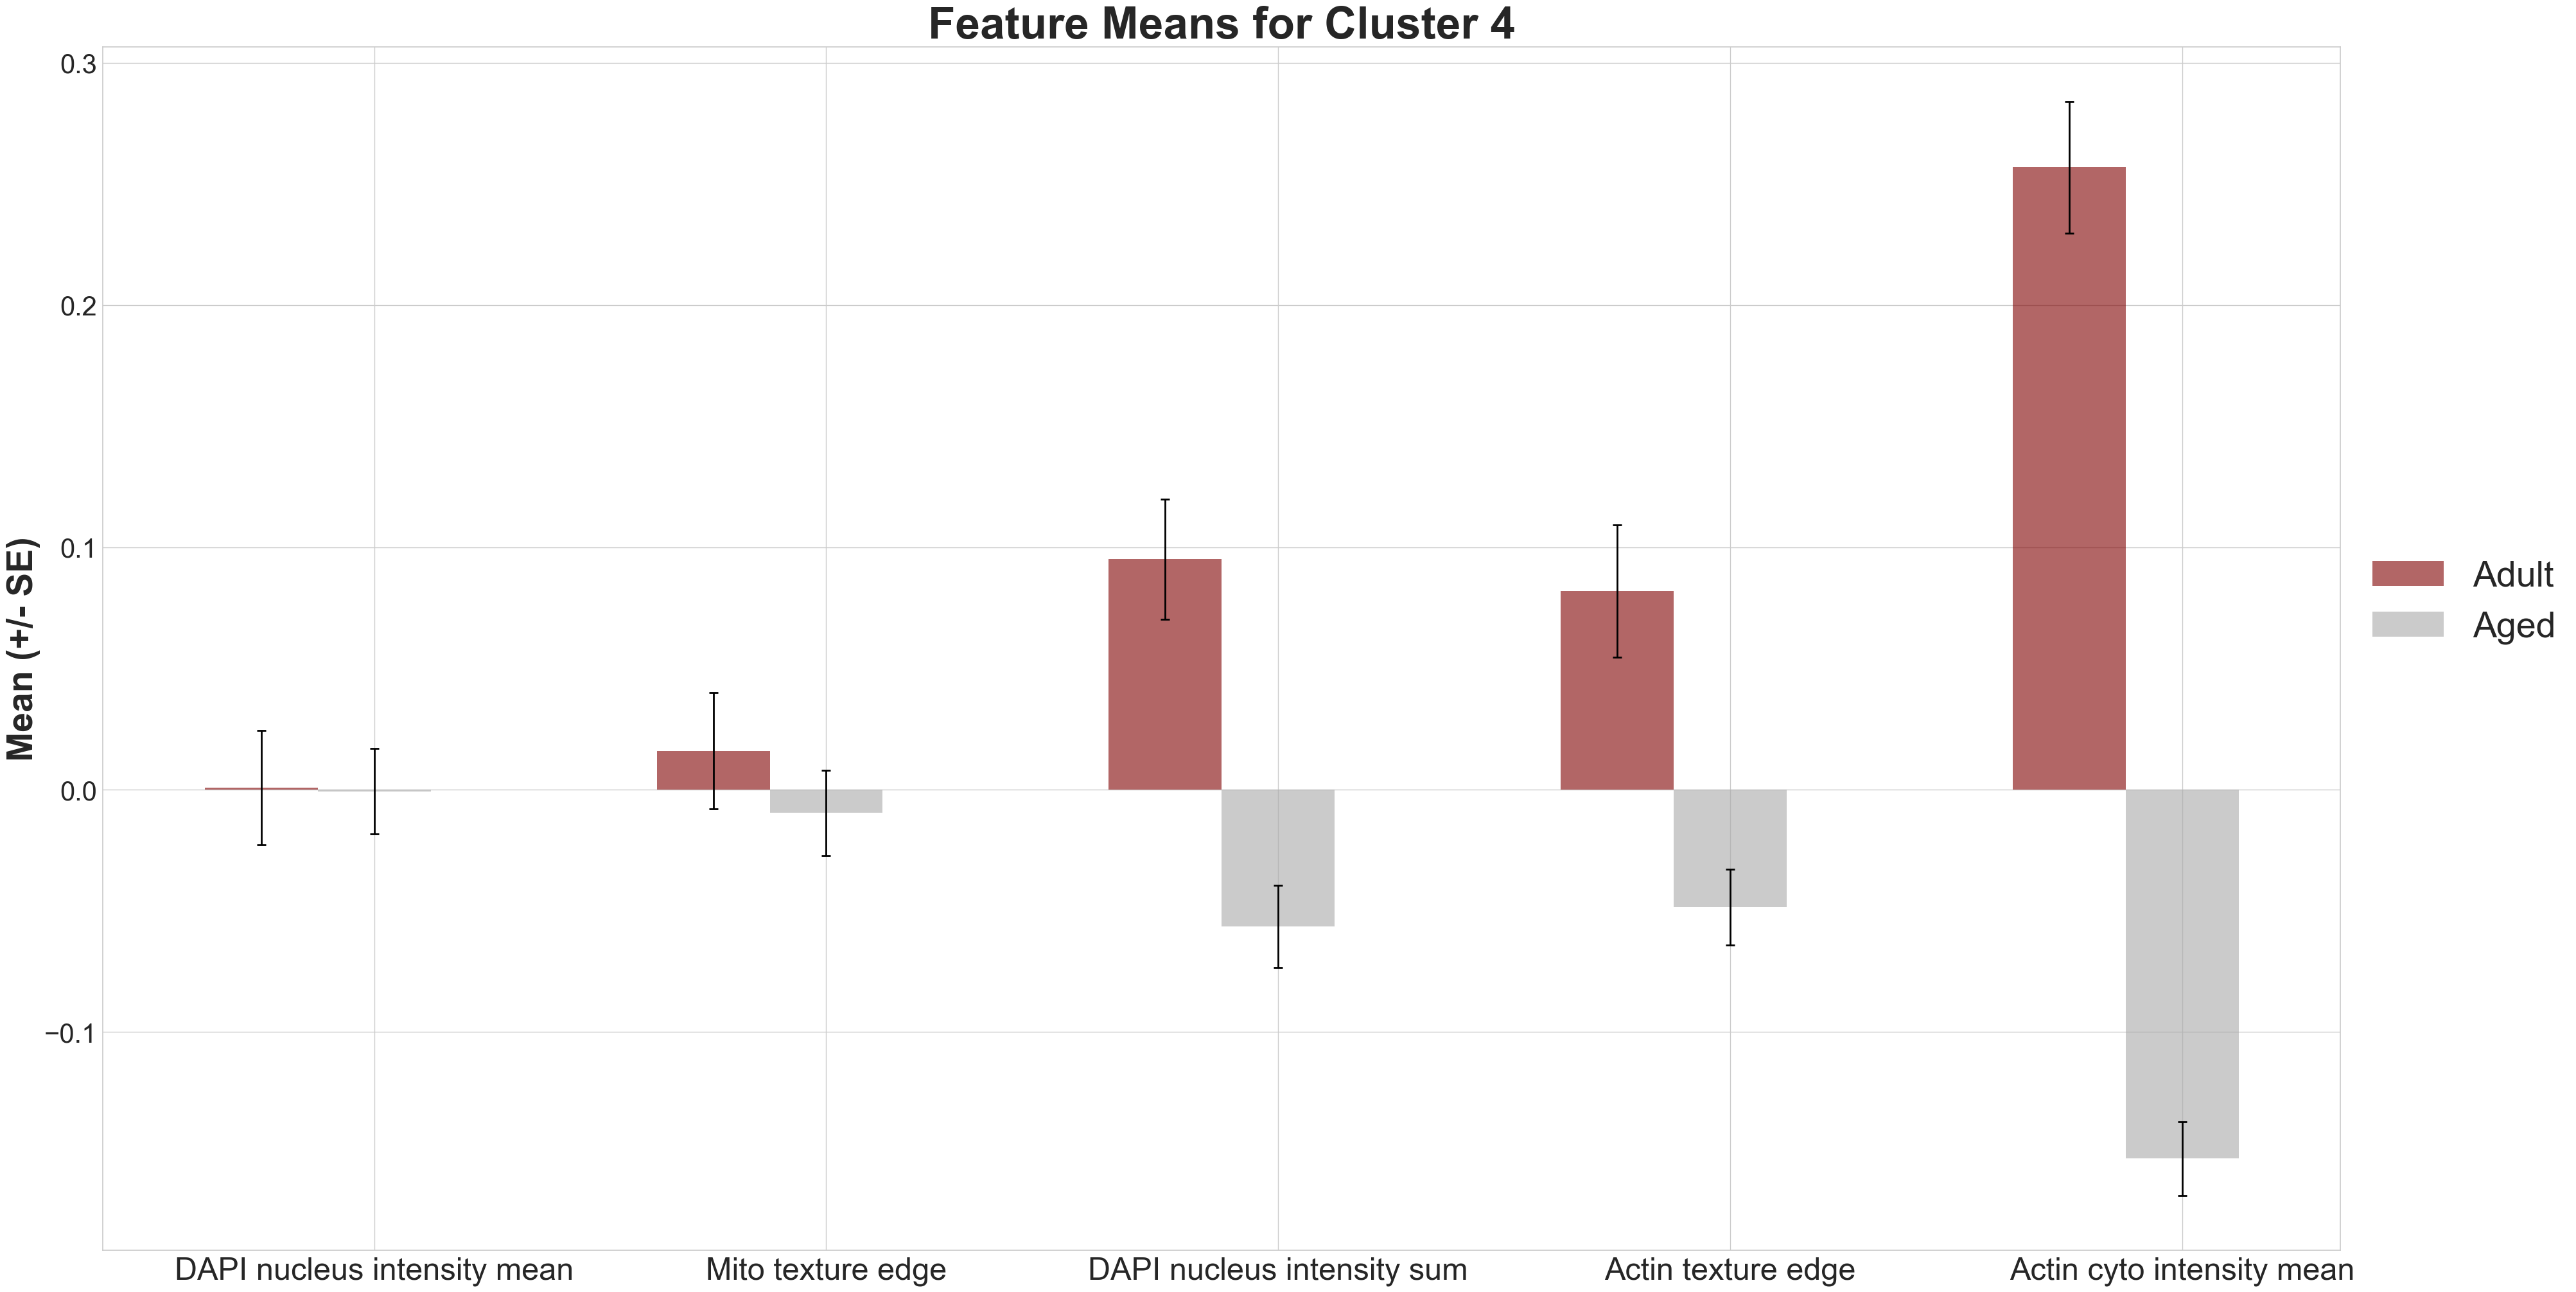

In [213]:
viz_cluster_feat(dict_clusters[3],"Feature Means for Cluster 4", None)

### Kmeans clustering and percentage

In [26]:
def viz_clustering_analysis(data_df_all, curr_exp):

    ## NO AGE EXP MAP
    for age_exp in age_experiment_map:
        data_df = data_df_all.loc[data_df_all['Age'].isin(age_experiment_map[age_exp])]
        clustering_data_df = deepcopy(data_df_all)
        relevant_data_df = deepcopy(data_df_all.loc[:, relevant_features])

        plot_title = f"{age_exp} KMeans clustering elbow for {curr_exp}"
        plt.rcParams["figure.figsize"] = (6,4)
        plt.figure()
        X = deepcopy(relevant_data_df)
        X = StandardScaler().fit_transform(X)

        """
        Viz 1: Elbow plot
        """
        elbow_vis = KElbowVisualizer(KMeans(), title=plot_title).fit(X)
        plt.title(plot_title)
        elbow_vis.show()

        
        """
        Viz 2: KMeans count pie plot
        """
        num_clusters = elbow_vis.elbow_value_  #min(elbow_vis.elbow_value_, 3)
        kmeans = KMeans(num_clusters, random_state=23).fit(X)
            
        plt.rcParams["figure.figsize"] = (5,5)
        plot_title = f'{age_exp} Distribution of Cluster categories for {curr_exp}'
        clustering_data_df['kmeans_clustering'] = kmeans.labels_
        clustering_data_df['kmeans_clustering'] = ["Cluster "+str(int(item)+1) for item in clustering_data_df['kmeans_clustering']]
        clustering_data_df.kmeans_clustering.value_counts().plot.pie(fontsize=14, autopct='%.1f%%')
        plt.title(plot_title, fontsize=20)


        """
        Viz 3: Cluster distribution plot
        """
        plt.rcParams["figure.figsize"] = (15,10)
        plot_title = f'{age_exp} {curr_exp} Percentage of cell by age per cluster'
        ax = clustering_data_df.groupby('Age').kmeans_clustering.value_counts().unstack(1).apply(lambda x: x*100/float(x.sum())).transpose().plot.bar(stacked=False, fontsize=50, color=age_color_map)
        index=0
        for rect in ax.patches:
            # Find where everything is located
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()

            # The height of the bar is the data value and can be used as the label
            label_text = f'{100*height:.1f}%' 

            # ax.text(x, y, text)

            label_x = x + width / 2
            label_y = y + height / 2
            if index ==0:
                label_y = label_y + 0.01

            # # plot only when height is greater than specified value
            # if height > 0:
            #     ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=60, rotation=90)

            index += 1
        plt.title(plot_title, fontsize=70)
        plt.xticks(fontsize=15, rotation=0)
        plt.yticks(fontsize=15, rotation=0)
        ax.legend(fontsize=15,bbox_to_anchor=(1, 0.6))



        """
        Viz 4: Cluster distribution per Well ID plot
        """
        plt.rcParams["figure.figsize"] = (15,10)
        plot_title = f'{age_exp} {curr_exp} Percentage of cell by Well per cluster'
        if curr_exp == 'cell painting combination':
            ax = clustering_data_df.groupby(['Exp', 'Age']).kmeans_clustering.value_counts().unstack(2).apply(lambda x: x*100/float(x.sum())).transpose().plot.bar(stacked=False, fontsize=50)
        else:
            ax = clustering_data_df.groupby('Well ID').kmeans_clustering.value_counts().unstack(1).apply(lambda x: x*100/float(x.sum())).transpose().plot.bar(stacked=False, fontsize=50)
        index=0
        for rect in ax.patches:
            # Find where everything is located
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()

            # The height of the bar is the data value and can be used as the label
            label_text = f'{100*height:.1f}%' 

            # ax.text(x, y, text)

            label_x = x + width / 2
            label_y = y + height / 2
            if index ==0:
                label_y = label_y + 0.01

            # # plot only when height is greater than specified value
            # if height > 0:
            #     ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=60, rotation=90)

            index += 1
        plt.title(plot_title, fontsize=70)
        plt.xticks(fontsize=15, rotation=0)
        plt.yticks(fontsize=15, rotation=0)
        ax.legend(fontsize=15,bbox_to_anchor=(1, 0.6))


    return clustering_data_df 

In [89]:
data_combined_norm

Exp Well ID  Field    Age         Sample     Type  \
0      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
1      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
2      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
3      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
4      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
...     ...     ...    ...    ...            ...      ...   
32809  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   
32810  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   
32811  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   
32812  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   
32813  10_2  (4, 4)    225   Aged   10_2 Aged S2  10_2 S2   

       DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0                        -0.783705                    2.542040   
1                        -0.910457                   -0.473816   
2                        -1.093148                   -0.039383   
3                        -0.178546                    0.105856   
4                         0.418331                    0.086726   
...                            ...                         ...   
32809                    -0.417060                   -0.490365   
32810                     0.124264                   -0.182414   
32811                     0.548636                   -0.245518   
32812                    -0.479065                   -0.229669   
32813                     1.251762                    0.365214   

       Actin texture spot  Actin texture hole  ...  Mito texture bright  \
0               -0.884022           -0.639539  ...            -0.378616   
1                1.793188            1.025880  ...             1.434324   
2                0.576583            0.500729  ...             0.164667   
3               -0.239160           -0.110772  ...             1.591380   
4               -0.899873           -0.848343  ...             0.072527   
...                   ...                 ...  ...                  ...   
32809           -0.269255           -0.468097  ...             0.858410   
32810           -0.471918           -0.942205  ...             0.304840   
32811           -0.381055           -0.550674  ...             0.397313   
32812            1.666247            1.067472  ...             1.012583   
32813           -0.485197           -1.120870  ...             1.412900   

       Mito texture dark  Actin cyto intensity mean  Actin cyto intensity sum  \
0              -0.366687                   0.765768                  1.367910   
1               1.334616                  -0.355484                 -0.466869   
2               0.155476                   0.459249                  0.189224   
3               0.746854                   0.088522                 -0.379244   
4               0.178208                   0.395575                 -0.239931   
...                  ...                        ...                       ...   
32809           0.955554                  -0.023524                 -0.200335   
32810           0.322326                   2.091137                  0.440747   
32811           0.053524                   0.841748                 -0.423173   
32812           0.961739                  -1.090610                 -0.047294   
32813           1.273143                   3.135938                  0.515289   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                      1.624586                 2.315393   1.018897   
1                     -0.904451                -0.742926  -0.503383   
2                      0.478356                 0.139569  -0.070791   
3                      0.122713                -0.521947  -0.596782   
4                     -0.055694                -0.520163  -0.610091   
...                         ...                      ...        ...   
32809                 -1.206547                -0.565333  -0.268312   
32810                 -0.596985         

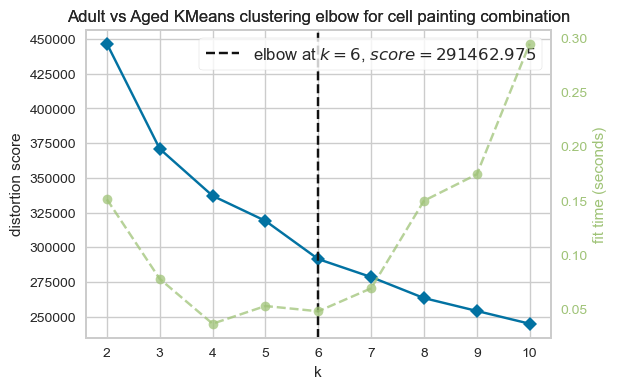

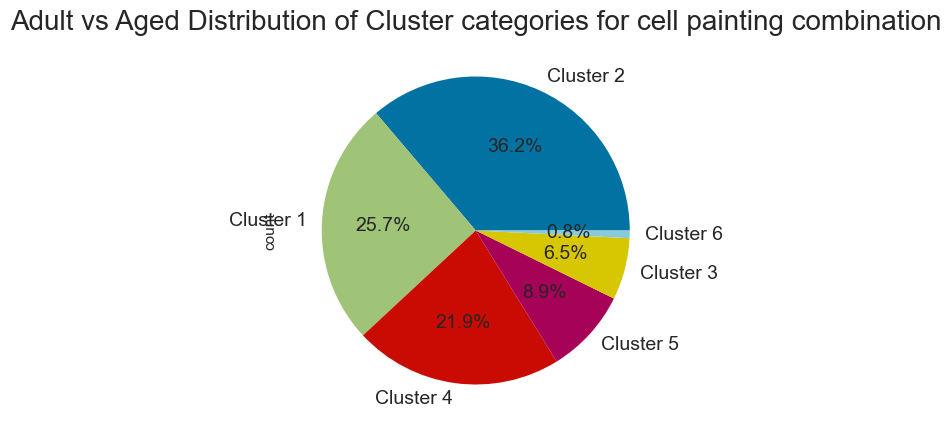

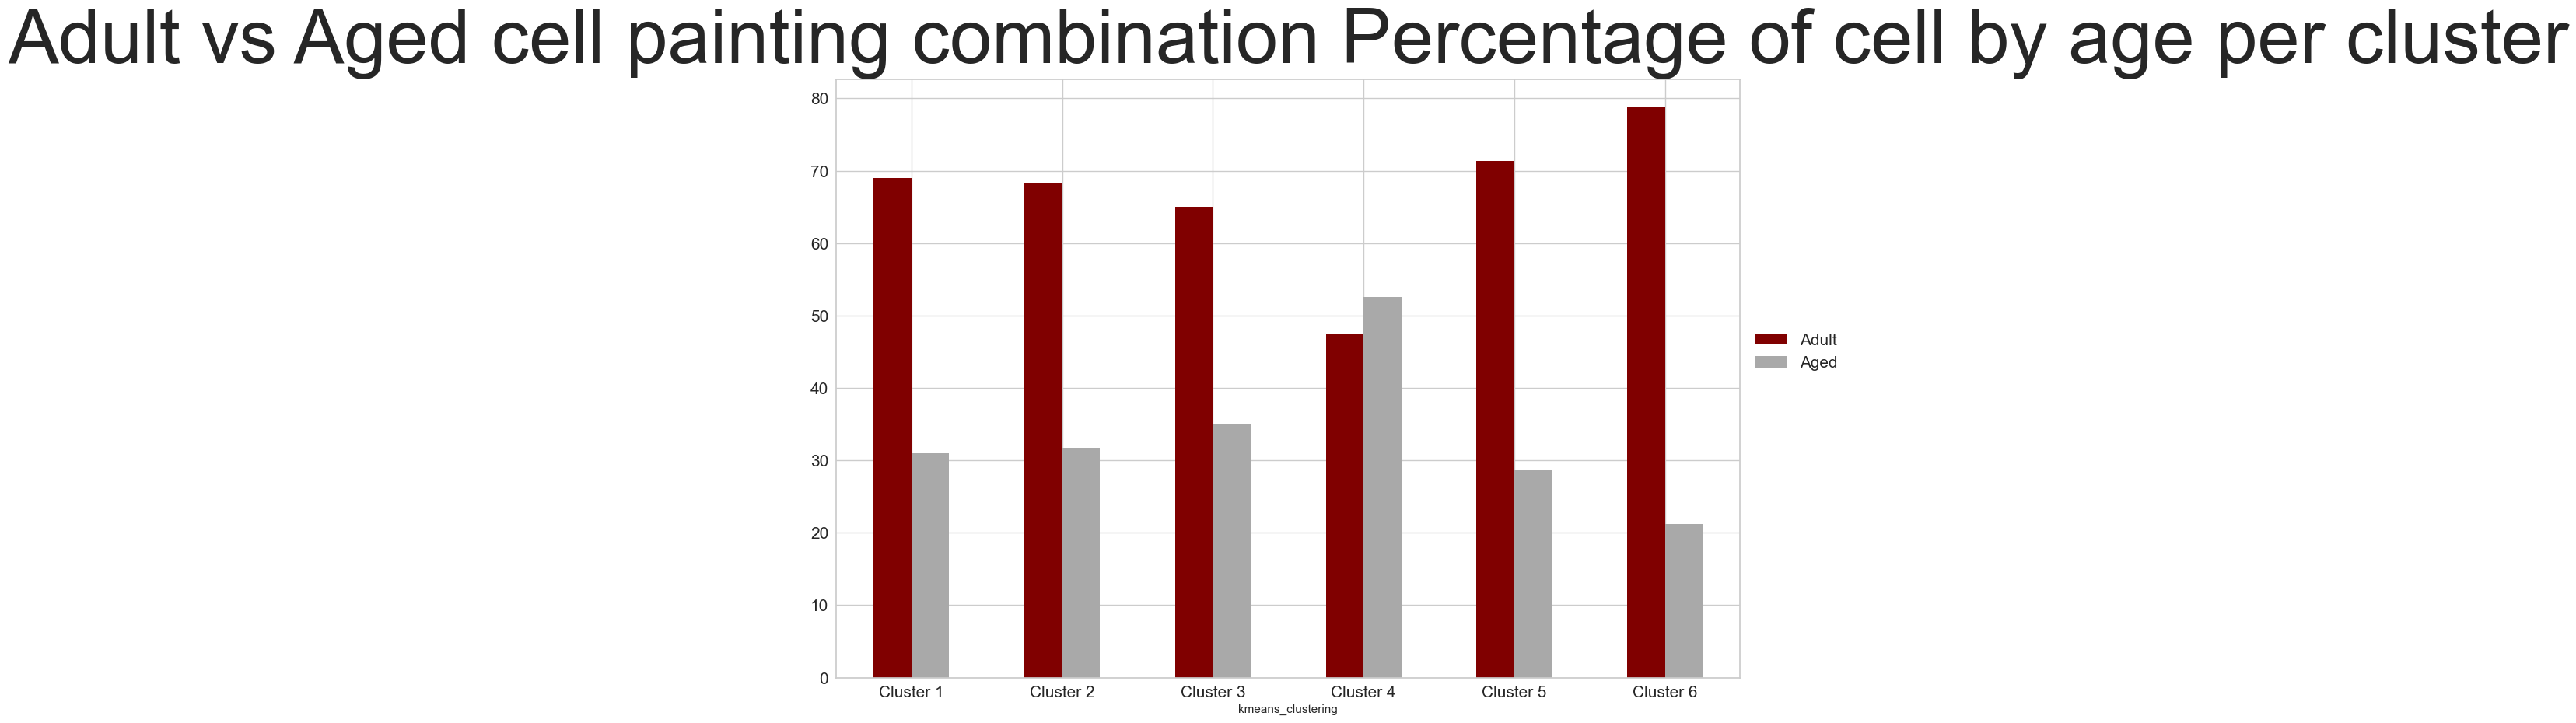

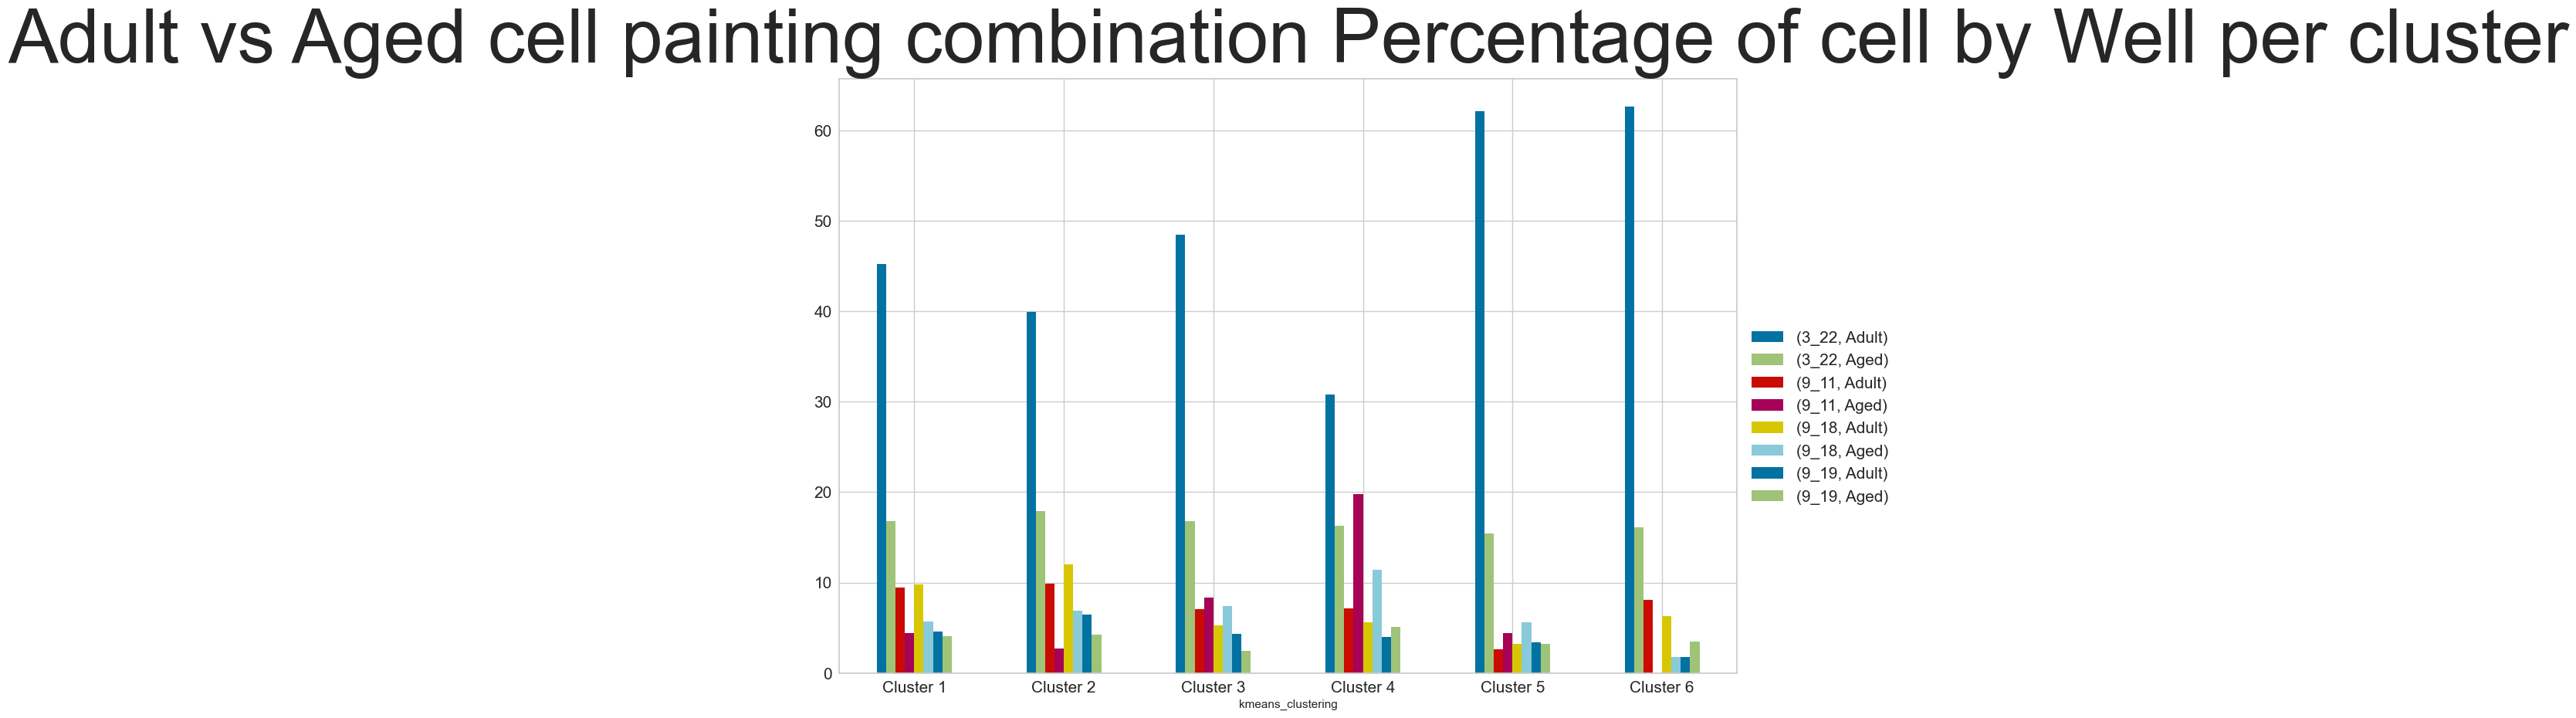

In [27]:
#clustering_data_df_3_22 = viz_clustering_analysis(data_df_all=data_df_3_22, curr_exp="cell painting 3_22")
#clustering_data_df_3_24 = viz_clustering_analysis(data_df_all=data_df_3_24, curr_exp="cell painting 3_24")
clustering_data_df_combined = viz_clustering_analysis(data_df_all=data_combined_norm, curr_exp="cell painting combination")

### Cluster feature importance

In [28]:
def cluster_feat_importance_data(clustering_data_df):

    dict_data = {}
    
    num_features=5

    for cluster in sorted(list(np.unique(clustering_data_df['kmeans_clustering']))):
        y = np.where(clustering_data_df.kmeans_clustering==cluster, 1, 0)

        clf = RandomForestClassifier(random_state=1)
        clf.fit(clustering_data_df.loc[:, relevant_features], y)

        base_imp = pd.DataFrame(clf.feature_importances_,index=relevant_features)#relevant_data_df.columns)
        base_imp = base_imp.reset_index()
        base_imp.columns=["Features", "MDI"]
        base_imp = base_imp.sort_values("MDI", ascending=False)
        list_of_cluster_features = list(base_imp['Features'][:num_features])

        relevant_data_df = clustering_data_df[clustering_data_df['kmeans_clustering']==cluster]
        age_labels = list(relevant_data_df['Age'])
        sample_labels = list(relevant_data_df['Sample'])
        exp_labels = list(relevant_data_df['Exp'])
        relevant_data_df = relevant_data_df.loc[:, list_of_cluster_features]
        scaled_features = StandardScaler().fit_transform(relevant_data_df)
        vis_df = pd.DataFrame(scaled_features, columns=relevant_data_df.columns)
        vis_df['Age'] = age_labels
        vis_df['Sample'] = sample_labels

        dict_data[cluster] = vis_df
        
    return dict_data


In [29]:
dict_data_cluster_feat = cluster_feat_importance_data(clustering_data_df_combined)

In [30]:
dict_data_cluster_feat.keys()

dict_keys(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'])

In [32]:
clust1_data = dict_data_cluster_feat['Cluster 1']
clust2_data = dict_data_cluster_feat['Cluster 2']
clust3_data = dict_data_cluster_feat['Cluster 3']
clust4_data = dict_data_cluster_feat['Cluster 4']
clust5_data = dict_data_cluster_feat['Cluster 5']
clust6_data = dict_data_cluster_feat['Cluster 6']

In [33]:
clust1_data

Mito texture valley  Mito texture bright  Mito texture saddle  \
0               -0.570673             0.605221             0.575175   
1                2.121316             1.519572             2.465689   
2                1.334266             0.952517             0.799295   
3                0.091616             0.310689            -0.428007   
4               -1.016989             0.408380            -1.068451   
...                   ...                  ...                  ...   
5601             0.058175            -0.037819             0.697950   
5602            -0.489031             0.221559            -0.531367   
5603             2.404762             1.941339             3.040433   
5604            -1.064061            -0.798706            -0.930554   
5605            -1.044543            -1.045955            -0.791068   

      Mito texture dark  Mito texture ridge    Age         Sample  
0             -0.452218            0.361534  Adult  3_22 Adult S1  
1              2.243070            0.905703  Adult  3_22 Adult S1  
2              1.161974            1.170250  Adult  3_22 Adult S1  
3              0.524738            0.834651  Adult  3_22 Adult S1  
4             -0.992278            0.710679  Adult  3_22 Adult S1  
...                 ...                 ...    ...            ...  
5601           0.106504           -0.757631   Aged   9_19 Aged S2  
5602           0.160363            0.070487   Aged   9_19 Aged S2  
5603           1.985979            1.307584   Aged   9_19 Aged S2  
5604          -0.837517           -0.739402   Aged   9_19 Aged S2  
5605          -0.926896           -0.817230   Aged   9_19 Aged S2  

[5606 rows x 7 columns]

In [48]:
clust1_3_22 = clust1_data[clust1_data['Sample'].str.startswith("3_22")]
clust1_3_22

Mito texture valley  Mito texture bright  Mito texture saddle  \
0               -0.570673             0.605221             0.575175   
1                2.121316             1.519572             2.465689   
2                1.334266             0.952517             0.799295   
3                0.091616             0.310689            -0.428007   
4               -1.016989             0.408380            -1.068451   
...                   ...                  ...                  ...   
3472            -0.606697            -1.020107            -0.804791   
3473             0.424365             0.323876             1.331155   
3474            -0.630791            -0.628791            -0.881084   
3475            -1.560356            -1.052476            -1.660945   
3476            -0.594266            -1.029989            -0.496893   

      Mito texture dark  Mito texture ridge    Age         Sample  
0             -0.452218            0.361534  Adult  3_22 Adult S1  
1              2.243070            0.905703  Adult  3_22 Adult S1  
2              1.161974            1.170250  Adult  3_22 Adult S1  
3              0.524738            0.834651  Adult  3_22 Adult S1  
4             -0.992278            0.710679  Adult  3_22 Adult S1  
...                 ...                 ...    ...            ...  
3472          -0.862467           -1.110596   Aged   3_22 Aged S2  
3473           0.668742           -0.405157   Aged   3_22 Aged S2  
3474          -0.436754           -0.451194   Aged   3_22 Aged S2  
3475          -1.110564           -0.707084   Aged   3_22 Aged S2  
3476          -0.717191           -1.541323   Aged   3_22 Aged S2  

[3477 rows x 7 columns]

In [62]:
def viz_cluster_feat(df,title, save_name):

    indiv_data = df.groupby(by=['Age', 'Sample']).mean()

    yerr = df.drop('Sample', axis=1).groupby('Age').sem().T

    bar_val = df.drop('Sample', axis=1).groupby('Age').mean().T

    x = np.arange(len(indiv_data.columns))  

    width = 0.25  
    multiplier = 0

    fig, ax = plt.subplots(figsize=(40, 20), layout='constrained')

    error_bar_settings = dict(
            ecolor='black',         # Edge color of the error bars
            elinewidth=2,         # Line width of the error bars
            capsize=5,           # Width of the caps on the error bars
            capthick=2            # Thickness of the cap lines
        )

    for attribute in bar_val.columns:
        measurement = bar_val[attribute]
        offset = width * multiplier
        # Get the color for the current attribute
        color = age_color_map.get(attribute, 'black')
        rects = ax.bar(
            x + offset, measurement, width, label=attribute,
            yerr=yerr[attribute], capsize=20, color=color, error_kw=error_bar_settings, alpha=0.6
        )
        multiplier += 1

    # Now plot the scatter points (individual data)
    multiplier = 0
    jitter_factor = 0.4
    for attribute in bar_val.columns:
        offset = width * multiplier
        color = age_color_map.get(attribute, 'black')

        
        for i, variable in enumerate(bar_val.index):
            # Check if the attribute exists in the data
            if attribute in indiv_data.index.get_level_values('Age').unique():
                # Get individual data points
                data_points = indiv_data.loc[attribute][variable].values
                x_positions = x[i] + offset + (np.random.rand(len(data_points)) - 0.5) * width * jitter_factor
                ax.scatter(x_positions, data_points, color='black', zorder=10)
        multiplier += 1

    ax.set_xticks(x + width, bar_val.index)
    ax.tick_params(axis='x', labelsize=35)
    ax.legend(fontsize=40, bbox_to_anchor=(1, 0.6))
    plt.yticks(fontsize=30)
    ax.set_ylabel('Mean (+/- SE)', fontsize=40, fontweight="bold")
    plt.title(title, fontsize=50, fontweight="bold")
    plt.show()
    
    file_name = os.getcwd() + '/figures/' + save_name

    fig.savefig(file_name, dpi=600, bbox_inches='tight')


In [45]:
df_1 = clust1_data[clust1_data['Age'] == 'Adult']
df_1

Mito texture valley  Mito texture bright  Mito texture saddle  \
0               -0.570673             0.605221             0.575175   
1                2.121316             1.519572             2.465689   
2                1.334266             0.952517             0.799295   
3                0.091616             0.310689            -0.428007   
4               -1.016989             0.408380            -1.068451   
...                   ...                  ...                  ...   
5375             0.958156             2.775816             0.302029   
5376             0.993517             0.927731             0.450188   
5377            -0.805823            -0.948282             0.085421   
5378            -1.182995            -1.137542            -0.763863   
5379             0.969327             1.028327             1.468750   

      Mito texture dark  Mito texture ridge    Age         Sample  
0             -0.452218            0.361534  Adult  3_22 Adult S1  
1              2.243070            0.905703  Adult  3_22 Adult S1  
2              1.161974            1.170250  Adult  3_22 Adult S1  
3              0.524738            0.834651  Adult  3_22 Adult S1  
4             -0.992278            0.710679  Adult  3_22 Adult S1  
...                 ...                 ...    ...            ...  
5375           0.974795            3.419444  Adult  9_19 Adult S2  
5376           1.045856            0.957018  Adult  9_19 Adult S2  
5377          -0.838910           -1.098320  Adult  9_19 Adult S2  
5378          -0.820207           -1.367587  Adult  9_19 Adult S2  
5379           0.754198            0.608145  Adult  9_19 Adult S2  

[3869 rows x 7 columns]

In [46]:
df_2 = clust1_data[clust1_data['Age'] == 'Aged']
df_2

Mito texture valley  Mito texture bright  Mito texture saddle  \
2534            -0.321996            -0.477475             0.662321   
2535            -0.646619            -0.534989            -1.043067   
2536             0.201003             0.230151             0.511190   
2537            -1.175348            -0.439450            -1.122320   
2538             0.390329            -0.297372             0.664497   
...                   ...                  ...                  ...   
5601             0.058175            -0.037819             0.697950   
5602            -0.489031             0.221559            -0.531367   
5603             2.404762             1.941339             3.040433   
5604            -1.064061            -0.798706            -0.930554   
5605            -1.044543            -1.045955            -0.791068   

      Mito texture dark  Mito texture ridge   Age        Sample  
2534          -0.119710           -1.057695  Aged  3_22 Aged S1  
2535          -0.509608           -0.147760  Aged  3_22 Aged S1  
2536           0.621278           -0.405972  Aged  3_22 Aged S1  
2537          -0.959503           -0.305181  Aged  3_22 Aged S1  
2538           0.464090           -0.976723  Aged  3_22 Aged S1  
...                 ...                 ...   ...           ...  
5601           0.106504           -0.757631  Aged  9_19 Aged S2  
5602           0.160363            0.070487  Aged  9_19 Aged S2  
5603           1.985979            1.307584  Aged  9_19 Aged S2  
5604          -0.837517           -0.739402  Aged  9_19 Aged S2  
5605          -0.926896           -0.817230  Aged  9_19 Aged S2  

[1737 rows x 7 columns]

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import os

def viz_cluster_feat(df, title, save_name):
    # Calculate the mean for each group (Age, Sample)
    indiv_data = df.groupby(by=['Age', 'Sample']).mean()

    # Calculate standard error and mean for each feature by Age
    yerr = df.drop('Sample', axis=1).groupby('Age').sem().T
    bar_val = df.drop('Sample', axis=1).groupby('Age').mean().T

    # Define x positions for the bars
    x = np.arange(len(bar_val.index))  

    width = 0.25  # Width of each bar
    multiplier = 0

    fig, ax = plt.subplots(figsize=(40, 20), layout='constrained')

    # Error bar settings
    error_bar_settings = dict(
        ecolor='black',         
        elinewidth=2,         
        capsize=5,           
        capthick=2            
    )

    # # Plot bars and scatter individual data points
    # for age in bar_val.columns:
    #     measurement = bar_val[age]
    #     offset = width * multiplier
    #     color = age_color_map.get(age, 'black')
        
    #     # Plot the bar for each age and feature
    #     rects = ax.bar(
    #         x + offset, measurement, width, label=age,
    #         yerr=yerr[age], color=color, error_kw=error_bar_settings, alpha=0.6
    #     )

    #     # Plot individual data points as scatter for each feature
    #     for i, feature in enumerate(bar_val.index):
    #         feature_data = df[(df['Age'] == age)][feature].values
    #         x_positions = x[i] + offset + (np.random.rand(len(feature_data)) - 0.5) * width * 0.4
    #         ax.scatter(x_positions, feature_data, color='black', zorder=10)

    #     multiplier += 1

    ax.set_xticks(x + width / 2, bar_val.index)
    ax.tick_params(axis='x', labelsize=35)
    ax.legend(fontsize=40, bbox_to_anchor=(1, 0.6))
    plt.yticks(fontsize=30)
    ax.set_ylabel('Mean (+/- SE)', fontsize=40, fontweight="bold")
    plt.title(title, fontsize=50, fontweight="bold")
    plt.show()
    if save_name: 
        file_name = os.getcwd() + '/figures/' + save_name
        fig.savefig(file_name, dpi=600, bbox_inches='tight')


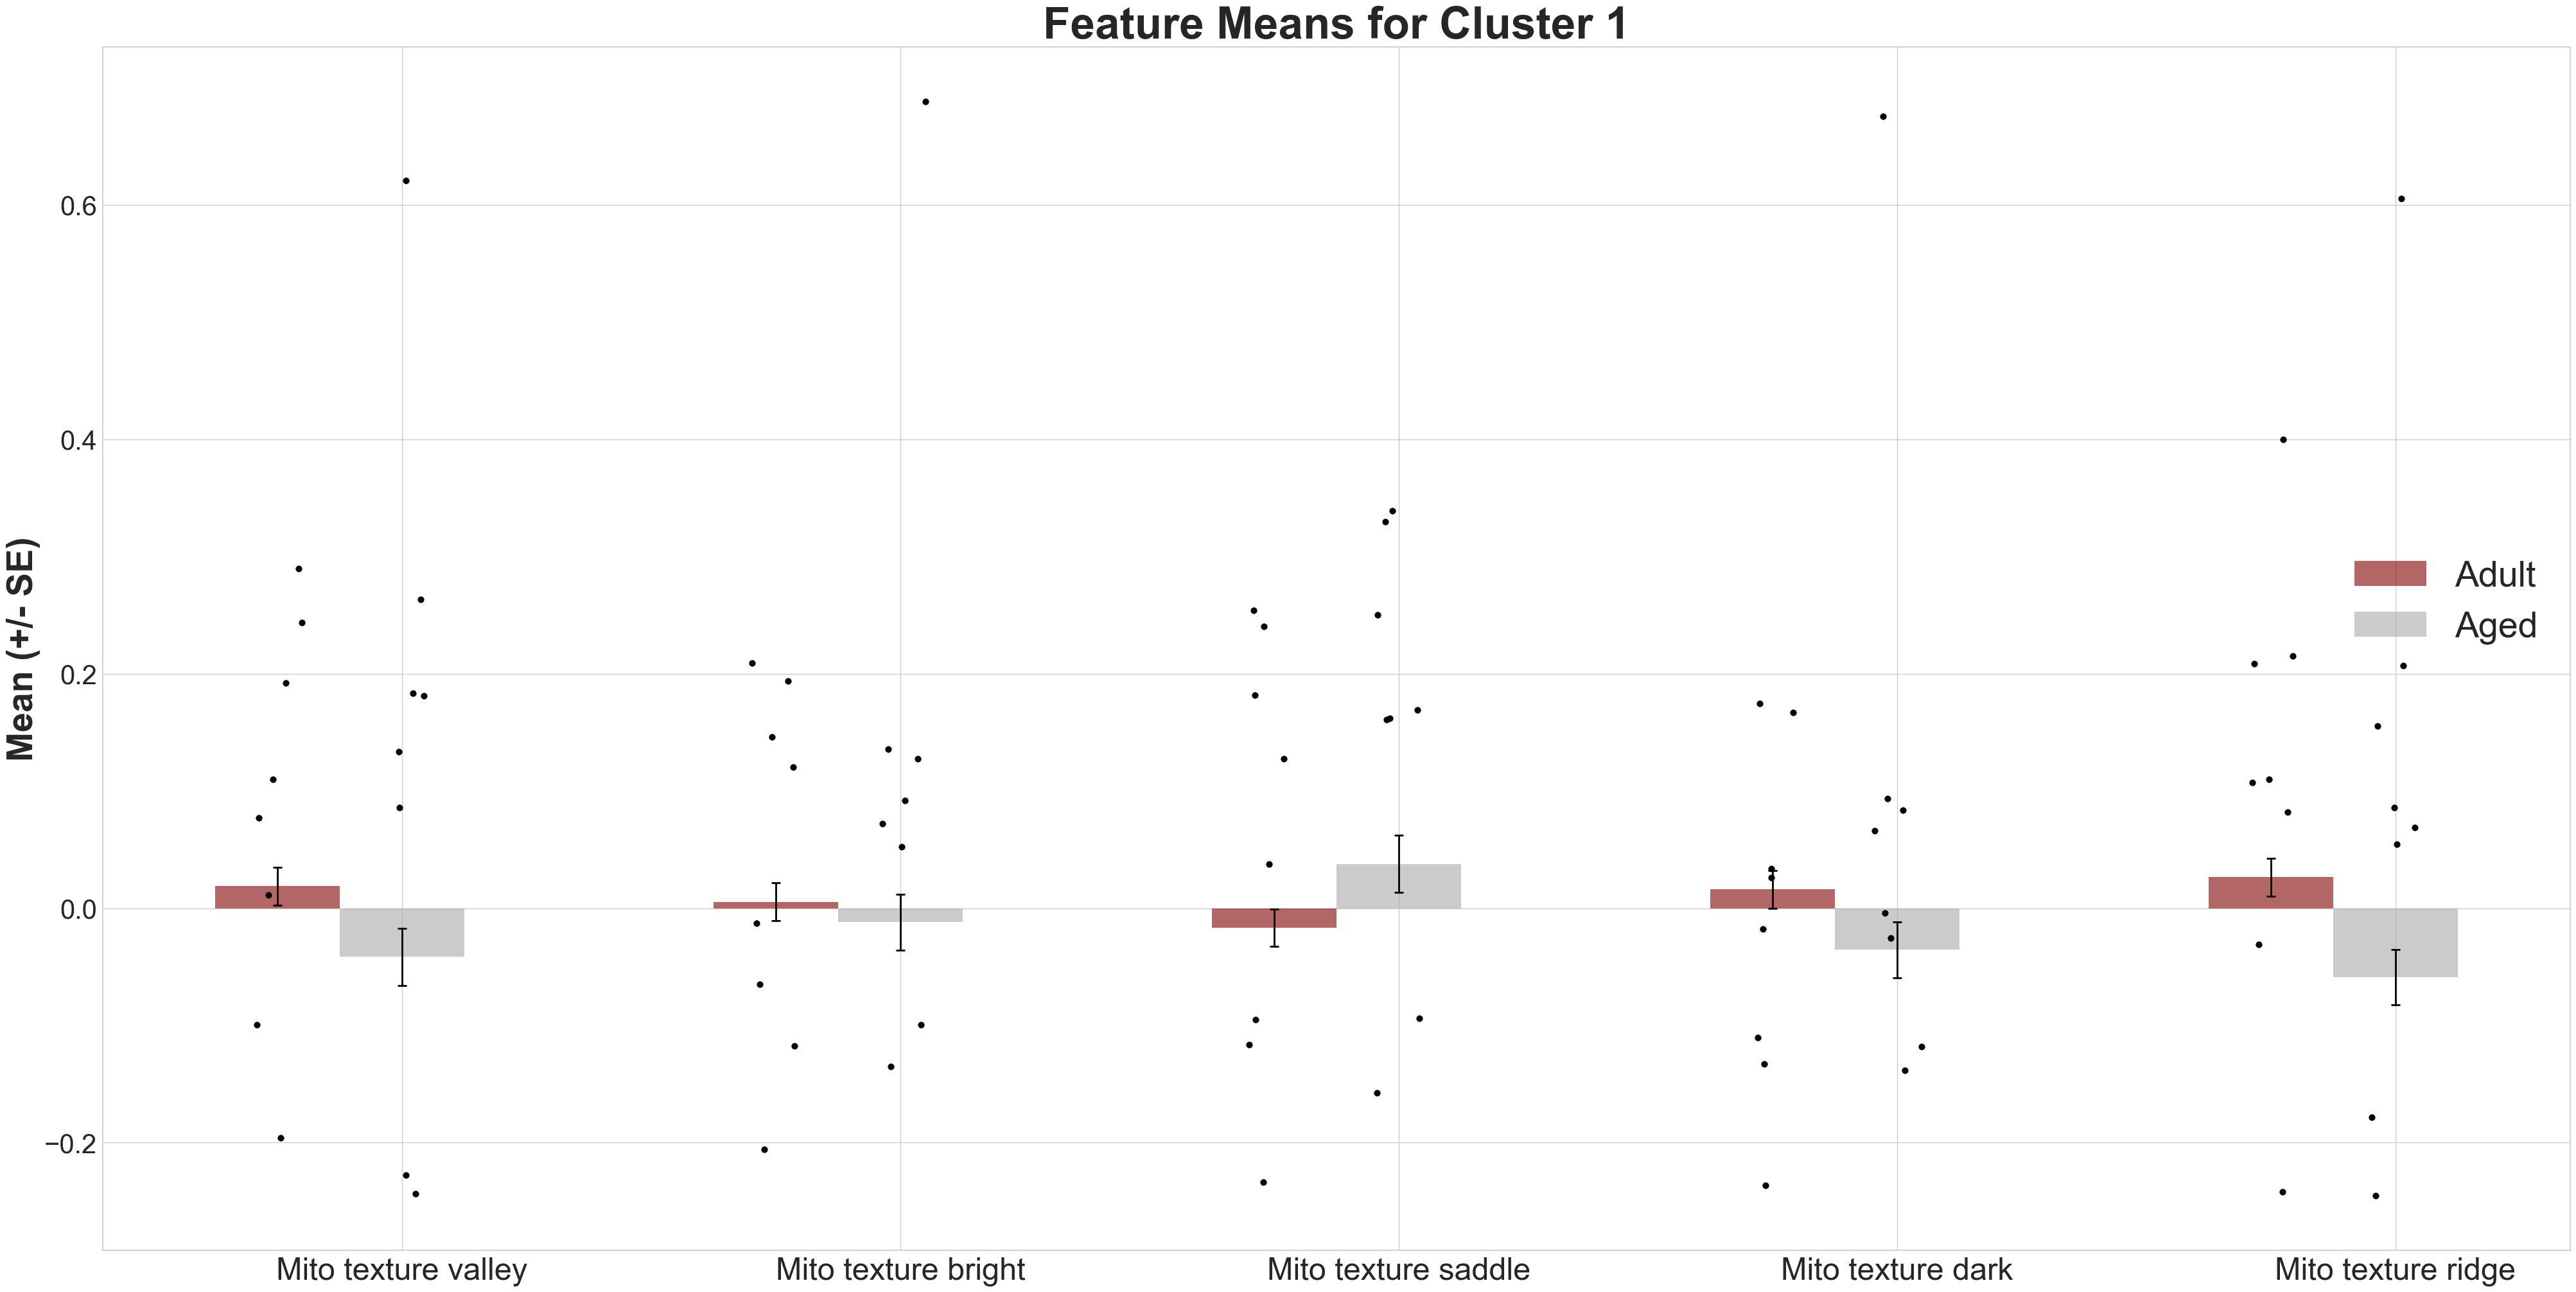

In [105]:
viz_cluster_feat(clust1_data,"Feature Means for Cluster 1","clust1.png")

In [56]:
clust1_data.columns[:-2]

Index(['Mito texture valley', 'Mito texture bright', 'Mito texture saddle',
       'Mito texture dark', 'Mito texture ridge'],
      dtype='object')

In [84]:
def hist_plot_ad_ag(clust_list):
    clust_num = 1  # Initialize clust_num outside the loop over clust_list
    for clust in clust_list:
        for feature in clust.columns[:-2]:
            plt.figure(figsize=(10, 6))
            
            # Adult data
            adult_data = clust[clust['Age'] == 'Adult'][feature]
            plt.hist(adult_data, bins=50, alpha=0.5, label='Adult')
            plt.axvline(adult_data.mean(), color='blue', linestyle='dashed', linewidth=2, label='Adult Mean')
            plt.axvline(adult_data.median(), color='blue', linestyle='solid', linewidth=2, label='Adult Median')
            
            # Aged data
            aged_data = clust[clust['Age'] == 'Aged'][feature]
            plt.hist(aged_data, bins=50, alpha=0.5, label='Aged')
            plt.axvline(aged_data.mean(), color='orange', linestyle='dashed', linewidth=2, label='Aged Mean')
            plt.axvline(aged_data.median(), color='orange', linestyle='solid', linewidth=2, label='Aged Median')
            
            # Labels and title
            plt.xlabel(feature)
            plt.ylabel("Frequency")
            plt.legend()
            plt.title(f"Cluster {clust_num}: Overlay Histogram of {feature}")
            plt.show()
        
        # Increment clust_num after processing each cluster
        clust_num += 1


In [86]:
clust1_data

Mito texture valley  Mito texture bright  Mito texture saddle  \
0               -0.570673             0.605221             0.575175   
1                2.121316             1.519572             2.465689   
2                1.334266             0.952517             0.799295   
3                0.091616             0.310689            -0.428007   
4               -1.016989             0.408380            -1.068451   
...                   ...                  ...                  ...   
5601             0.058175            -0.037819             0.697950   
5602            -0.489031             0.221559            -0.531367   
5603             2.404762             1.941339             3.040433   
5604            -1.064061            -0.798706            -0.930554   
5605            -1.044543            -1.045955            -0.791068   

      Mito texture dark  Mito texture ridge    Age         Sample  
0             -0.452218            0.361534  Adult  3_22 Adult S1  
1              2.243070            0.905703  Adult  3_22 Adult S1  
2              1.161974            1.170250  Adult  3_22 Adult S1  
3              0.524738            0.834651  Adult  3_22 Adult S1  
4             -0.992278            0.710679  Adult  3_22 Adult S1  
...                 ...                 ...    ...            ...  
5601           0.106504           -0.757631   Aged   9_19 Aged S2  
5602           0.160363            0.070487   Aged   9_19 Aged S2  
5603           1.985979            1.307584   Aged   9_19 Aged S2  
5604          -0.837517           -0.739402   Aged   9_19 Aged S2  
5605          -0.926896           -0.817230   Aged   9_19 Aged S2  

[5606 rows x 7 columns]

In [98]:
import matplotlib.pyplot as plt

def hist_plot_ad_ag(clust_list):
    clust_num = 1  # Initialize clust_num outside the loop over clust_list
    for clust in clust_list:
        features = clust.columns[:-2]
        fig, axes = plt.subplots(1, len(features), figsize=(10 * len(features), 6), sharey=True)
        
        for ax, feature in zip(axes, features):
            # Adult data
            adult_data = clust[clust['Age'] == 'Adult'][feature]
            ax.hist(adult_data, bins=50, alpha=0.5, label='Adult')
            ax.axvline(adult_data.mean(), color='blue', linestyle='dashed', linewidth=2, label='Adult Mean')
            ax.axvline(adult_data.median(), color='blue', linestyle='solid', linewidth=2, label='Adult Median')
            
            # Aged data
            aged_data = clust[clust['Age'] == 'Aged'][feature]
            ax.hist(aged_data, bins=50, alpha=0.5, label='Aged')
            ax.axvline(aged_data.mean(), color='orange', linestyle='dashed', linewidth=2, label='Aged Mean')
            ax.axvline(aged_data.median(), color='orange', linestyle='solid', linewidth=2, label='Aged Median')
            
            # Labels and title
            ax.set_xlabel(feature)
            ax.set_ylabel("Frequency")
            ax.legend()
            ax.set_title(f"Cluster {clust_num}: {feature}")
        
        # Adjust layout and show the row of plots for the current cluster
        plt.tight_layout()
        plt.show()
        
        # Increment clust_num after processing each cluster
        clust_num += 1


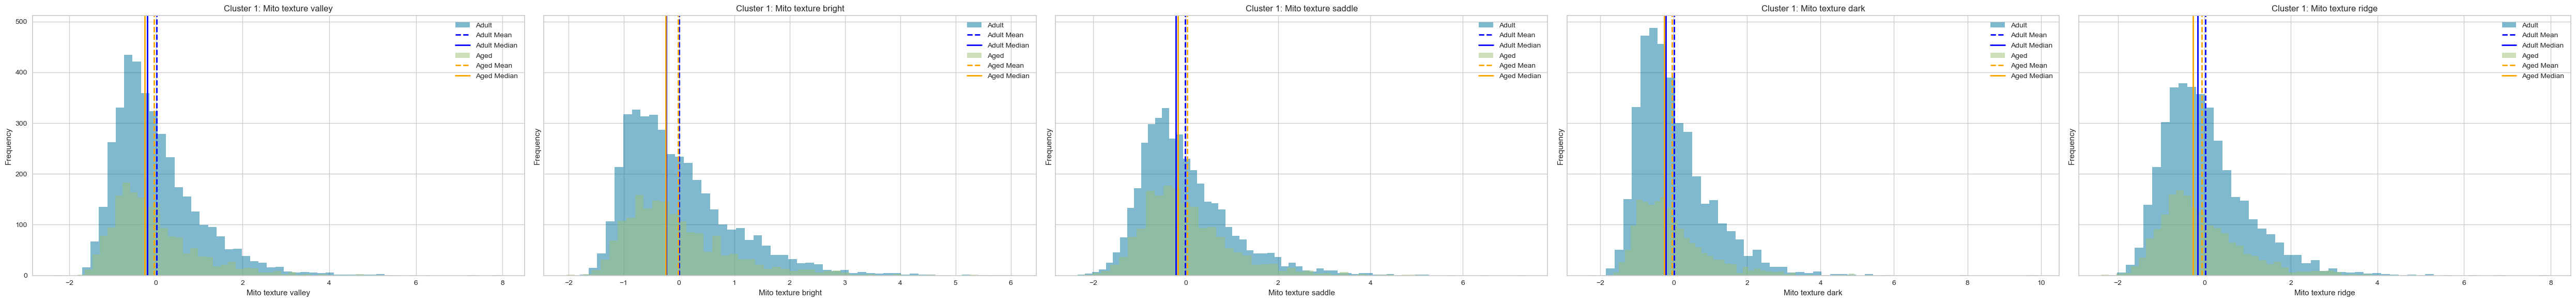

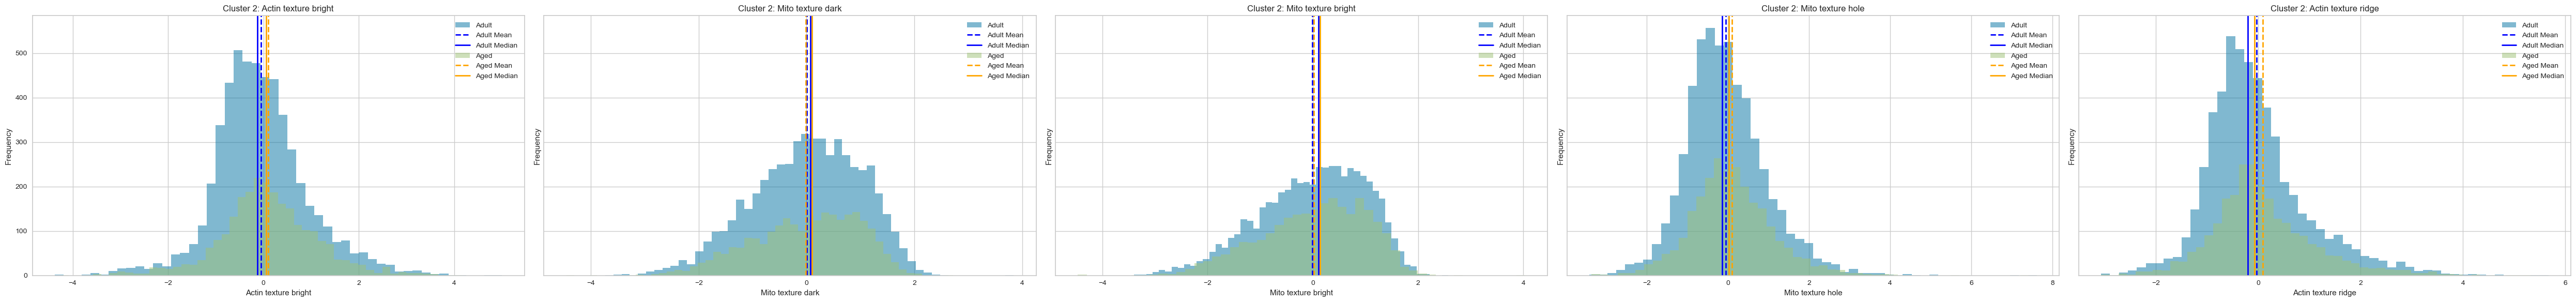

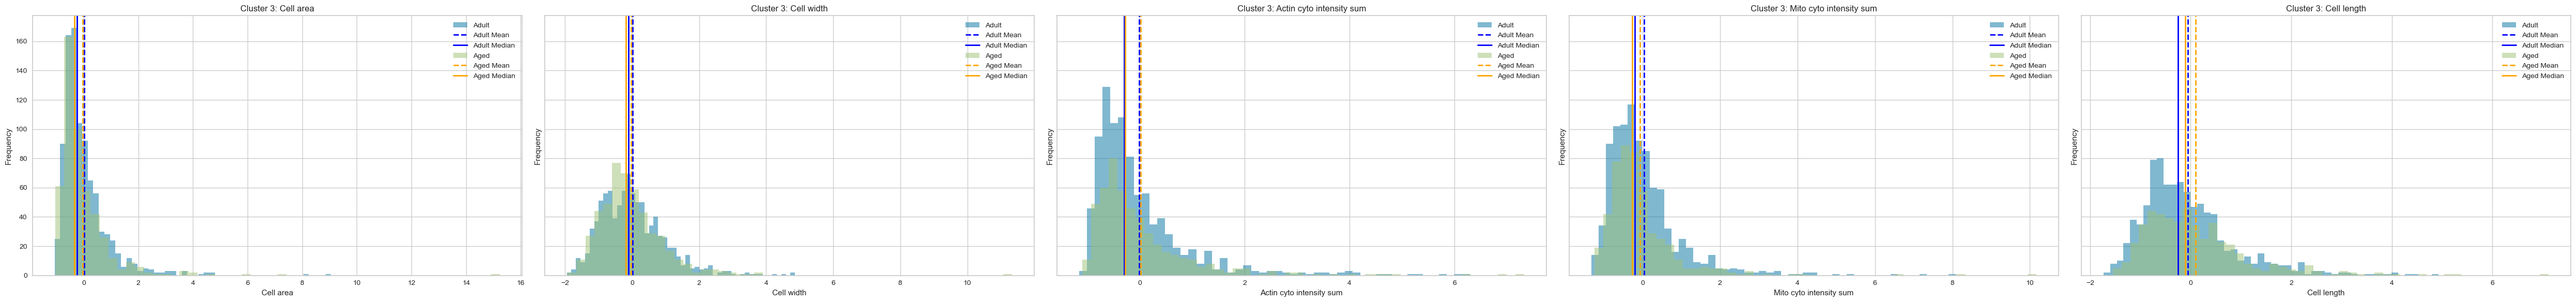

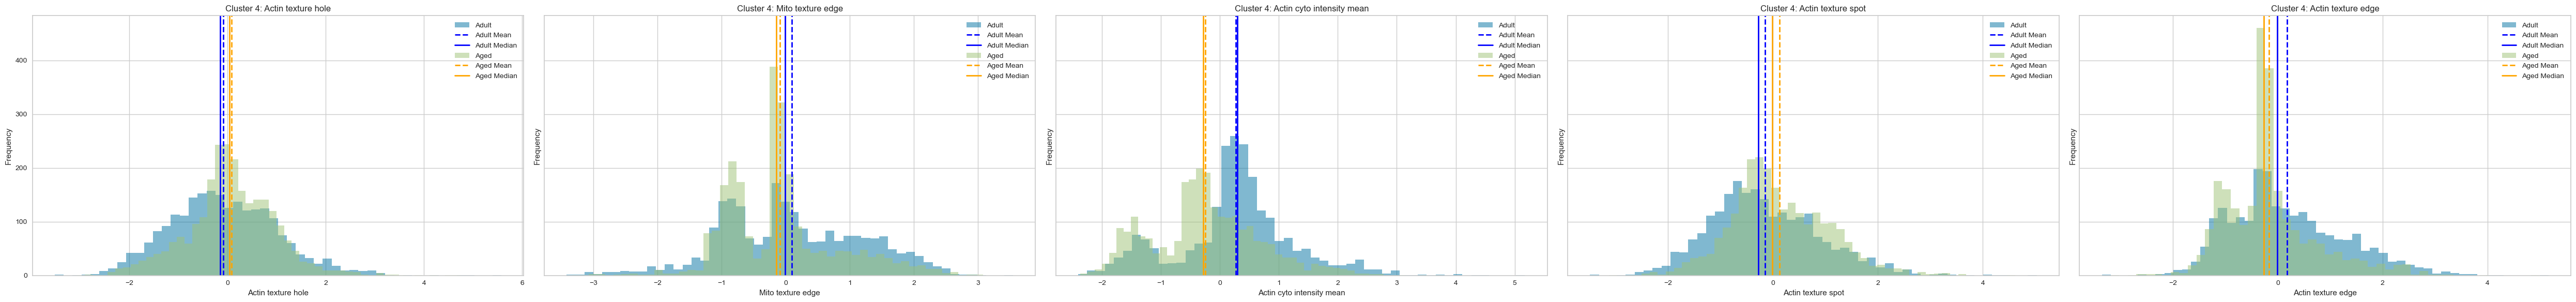

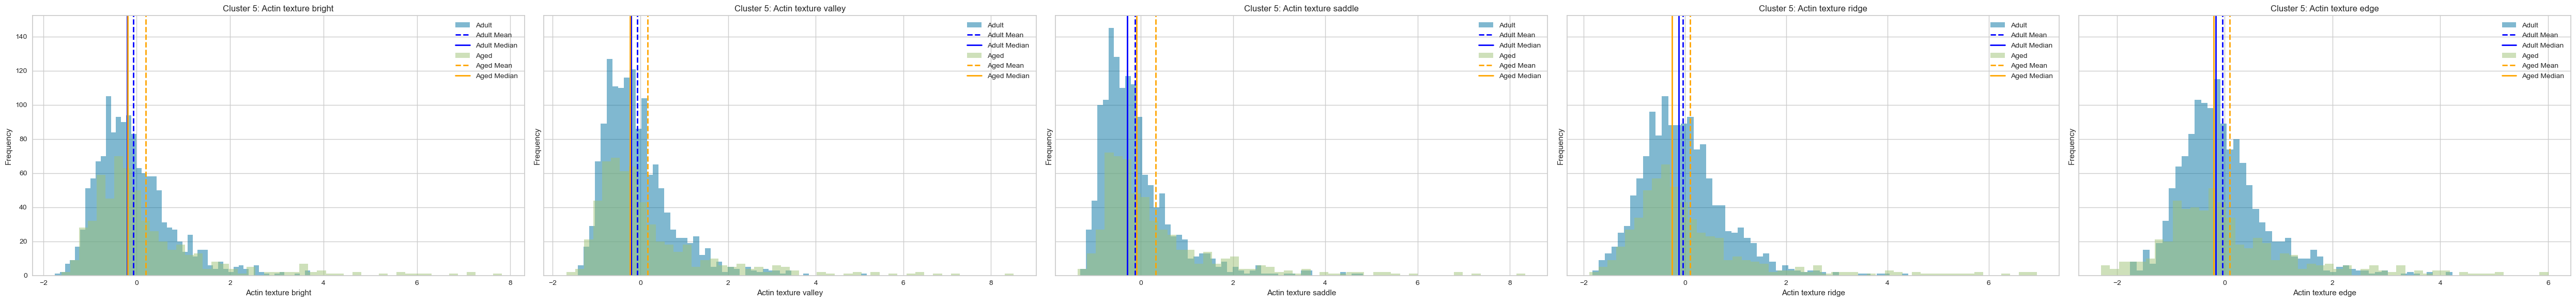

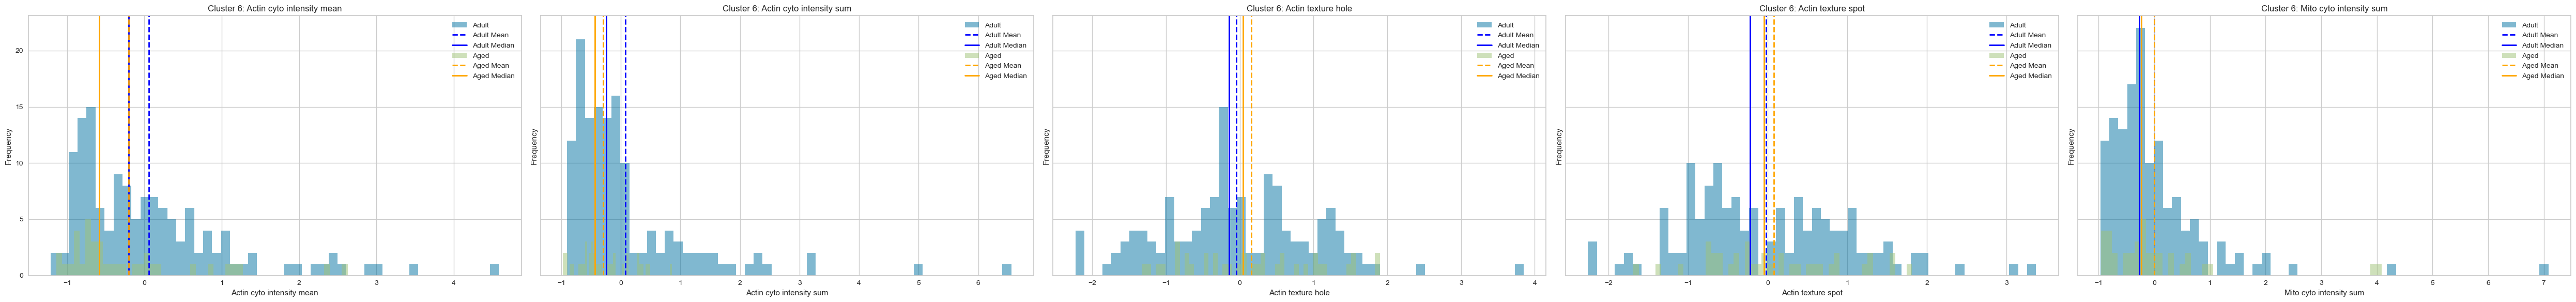

In [99]:
hist_plot_ad_ag([clust1_data, clust2_data, clust3_data,
           clust4_data, clust5_data, clust6_data])

In [102]:
import matplotlib.pyplot as plt
import numpy as np

def hist_plot(clust_list):
    clust_num = 1  # Initialize clust_num outside the loop over clust_list
    
    for clust in clust_list:
        features = clust.columns[:-2]
        fig, axes = plt.subplots(1, len(features) * 2, figsize=(15 * len(features), 6), sharey=True)
        
        for i, feature in enumerate(features):
            # Prepare unique colors for each sample in "Adult" and "Aged"
            adult_samples = clust[clust['Age'] == 'Adult']['Sample'].unique()
            aged_samples = clust[clust['Age'] == 'Aged']['Sample'].unique()
            total_samples = len(adult_samples) + len(aged_samples)
            colors = plt.cm.tab20(np.linspace(0, 1, total_samples))  # Generate unique colors
            
            # Access the subplot axes for "Adult" and "Aged" for the current feature
            ax1 = axes[i * 2]       # Adult plot
            ax2 = axes[i * 2 + 1]   # Aged plot
            
            # Plot stacked histogram for "Adult" samples with unique colors
            adult_data = clust[clust['Age'] == 'Adult']
            for idx, sample in enumerate(adult_samples):
                sample_data = adult_data[adult_data['Sample'] == sample][feature].values
                ax1.hist(sample_data, bins=50, stacked=True, color=[colors[idx]], label=f'Adult {sample}', alpha=0.5)
            
            ax1.set_xlabel(feature)
            ax1.set_ylabel("Frequency")
            ax1.legend()
            ax1.set_title(f"Cluster {clust_num}: {feature} (Adult)")
            
            # Plot stacked histogram for "Aged" samples with unique colors
            aged_data = clust[clust['Age'] == 'Aged']
            for idx, sample in enumerate(aged_samples, start=len(adult_samples)):
                sample_data = aged_data[aged_data['Sample'] == sample][feature].values
                ax2.hist(sample_data, bins=50, stacked=True, color=[colors[idx]], label=f'Aged {sample}', alpha=0.5)
            
            ax2.set_xlabel(feature)
            ax2.legend()
            ax2.set_title(f"Cluster {clust_num}: {feature} (Aged)")
        
        # Adjust layout and show all plots for the current cluster in a single row
        plt.tight_layout()
        plt.show()
        
        # Increment clust_num after processing each cluster
        clust_num += 1




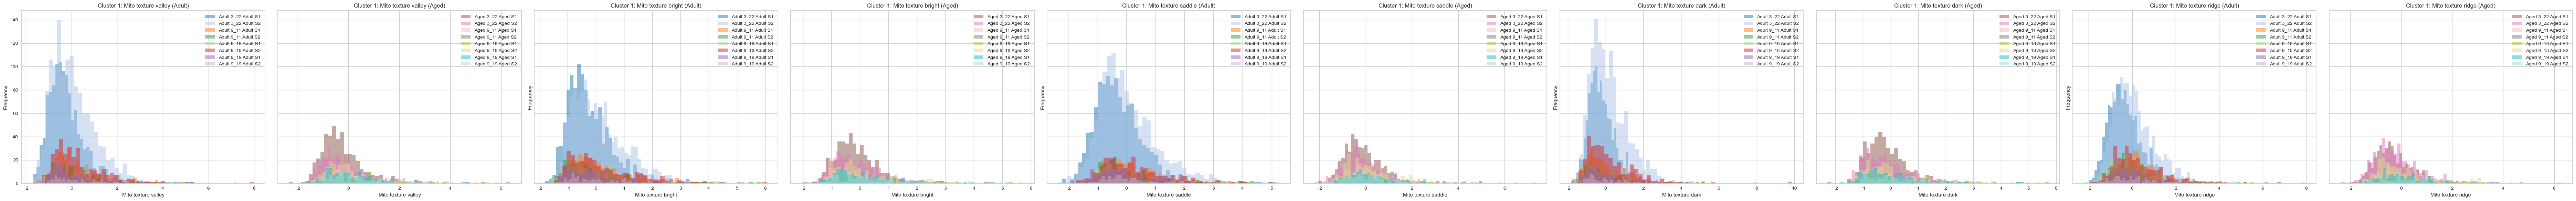

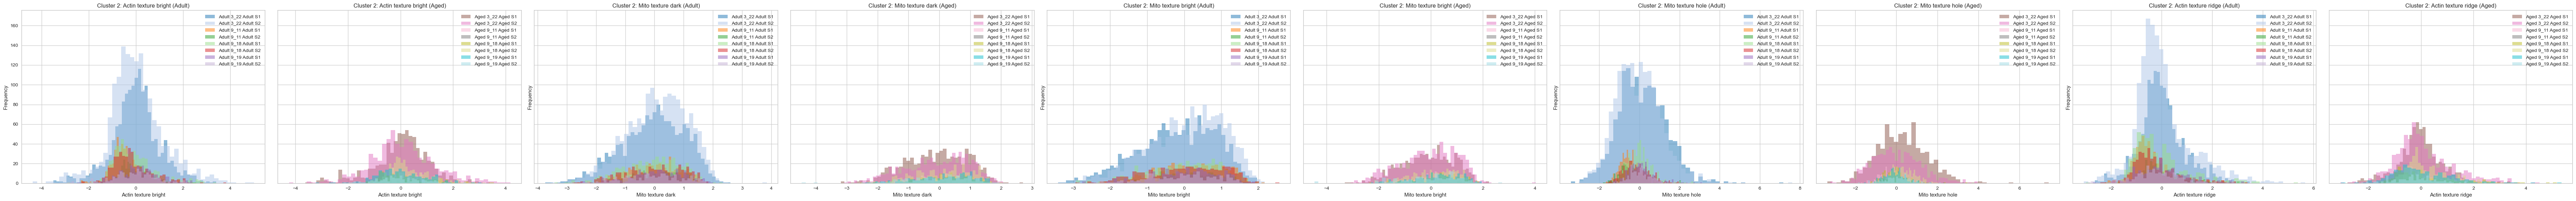

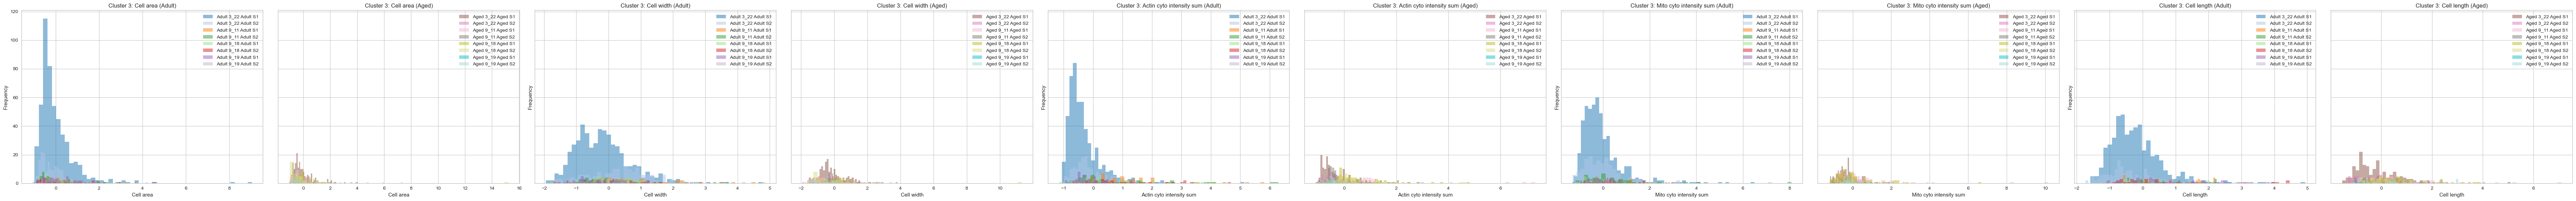

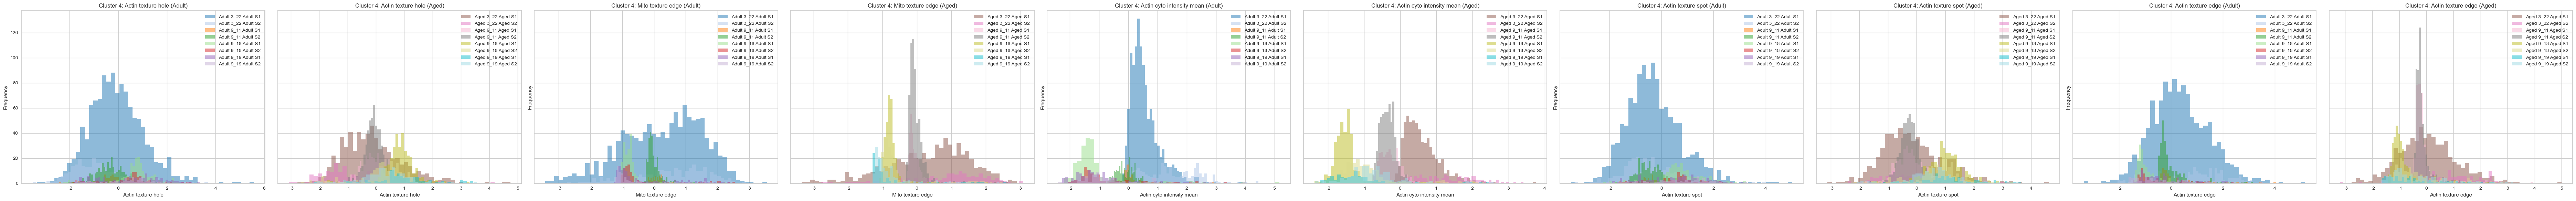

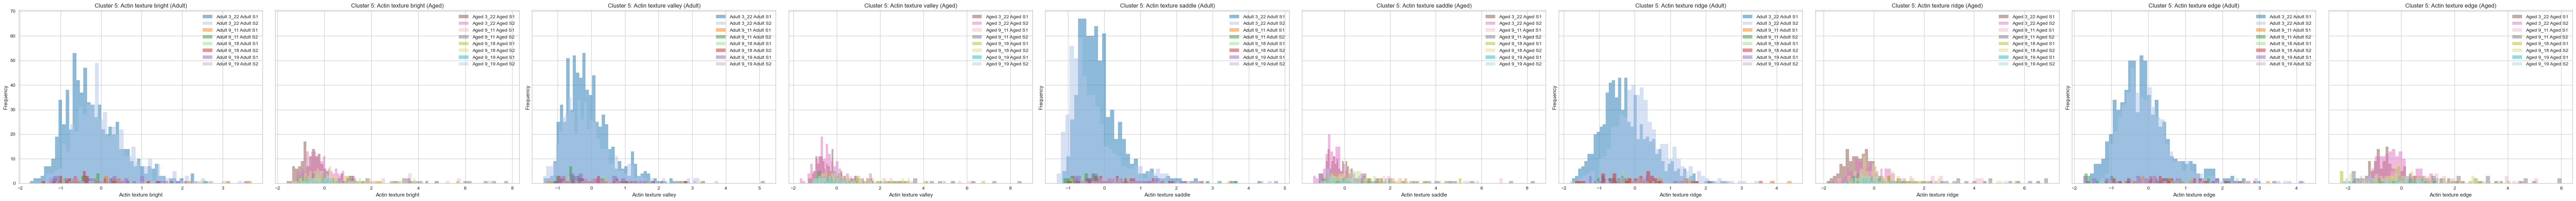

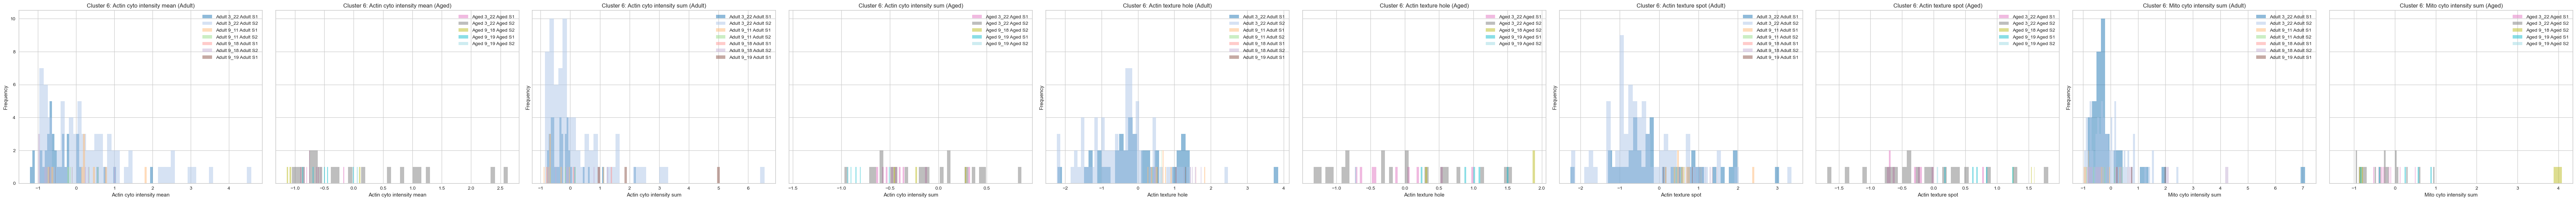

In [103]:
hist_plot([clust1_data, clust2_data, clust3_data,
           clust4_data, clust5_data, clust6_data])


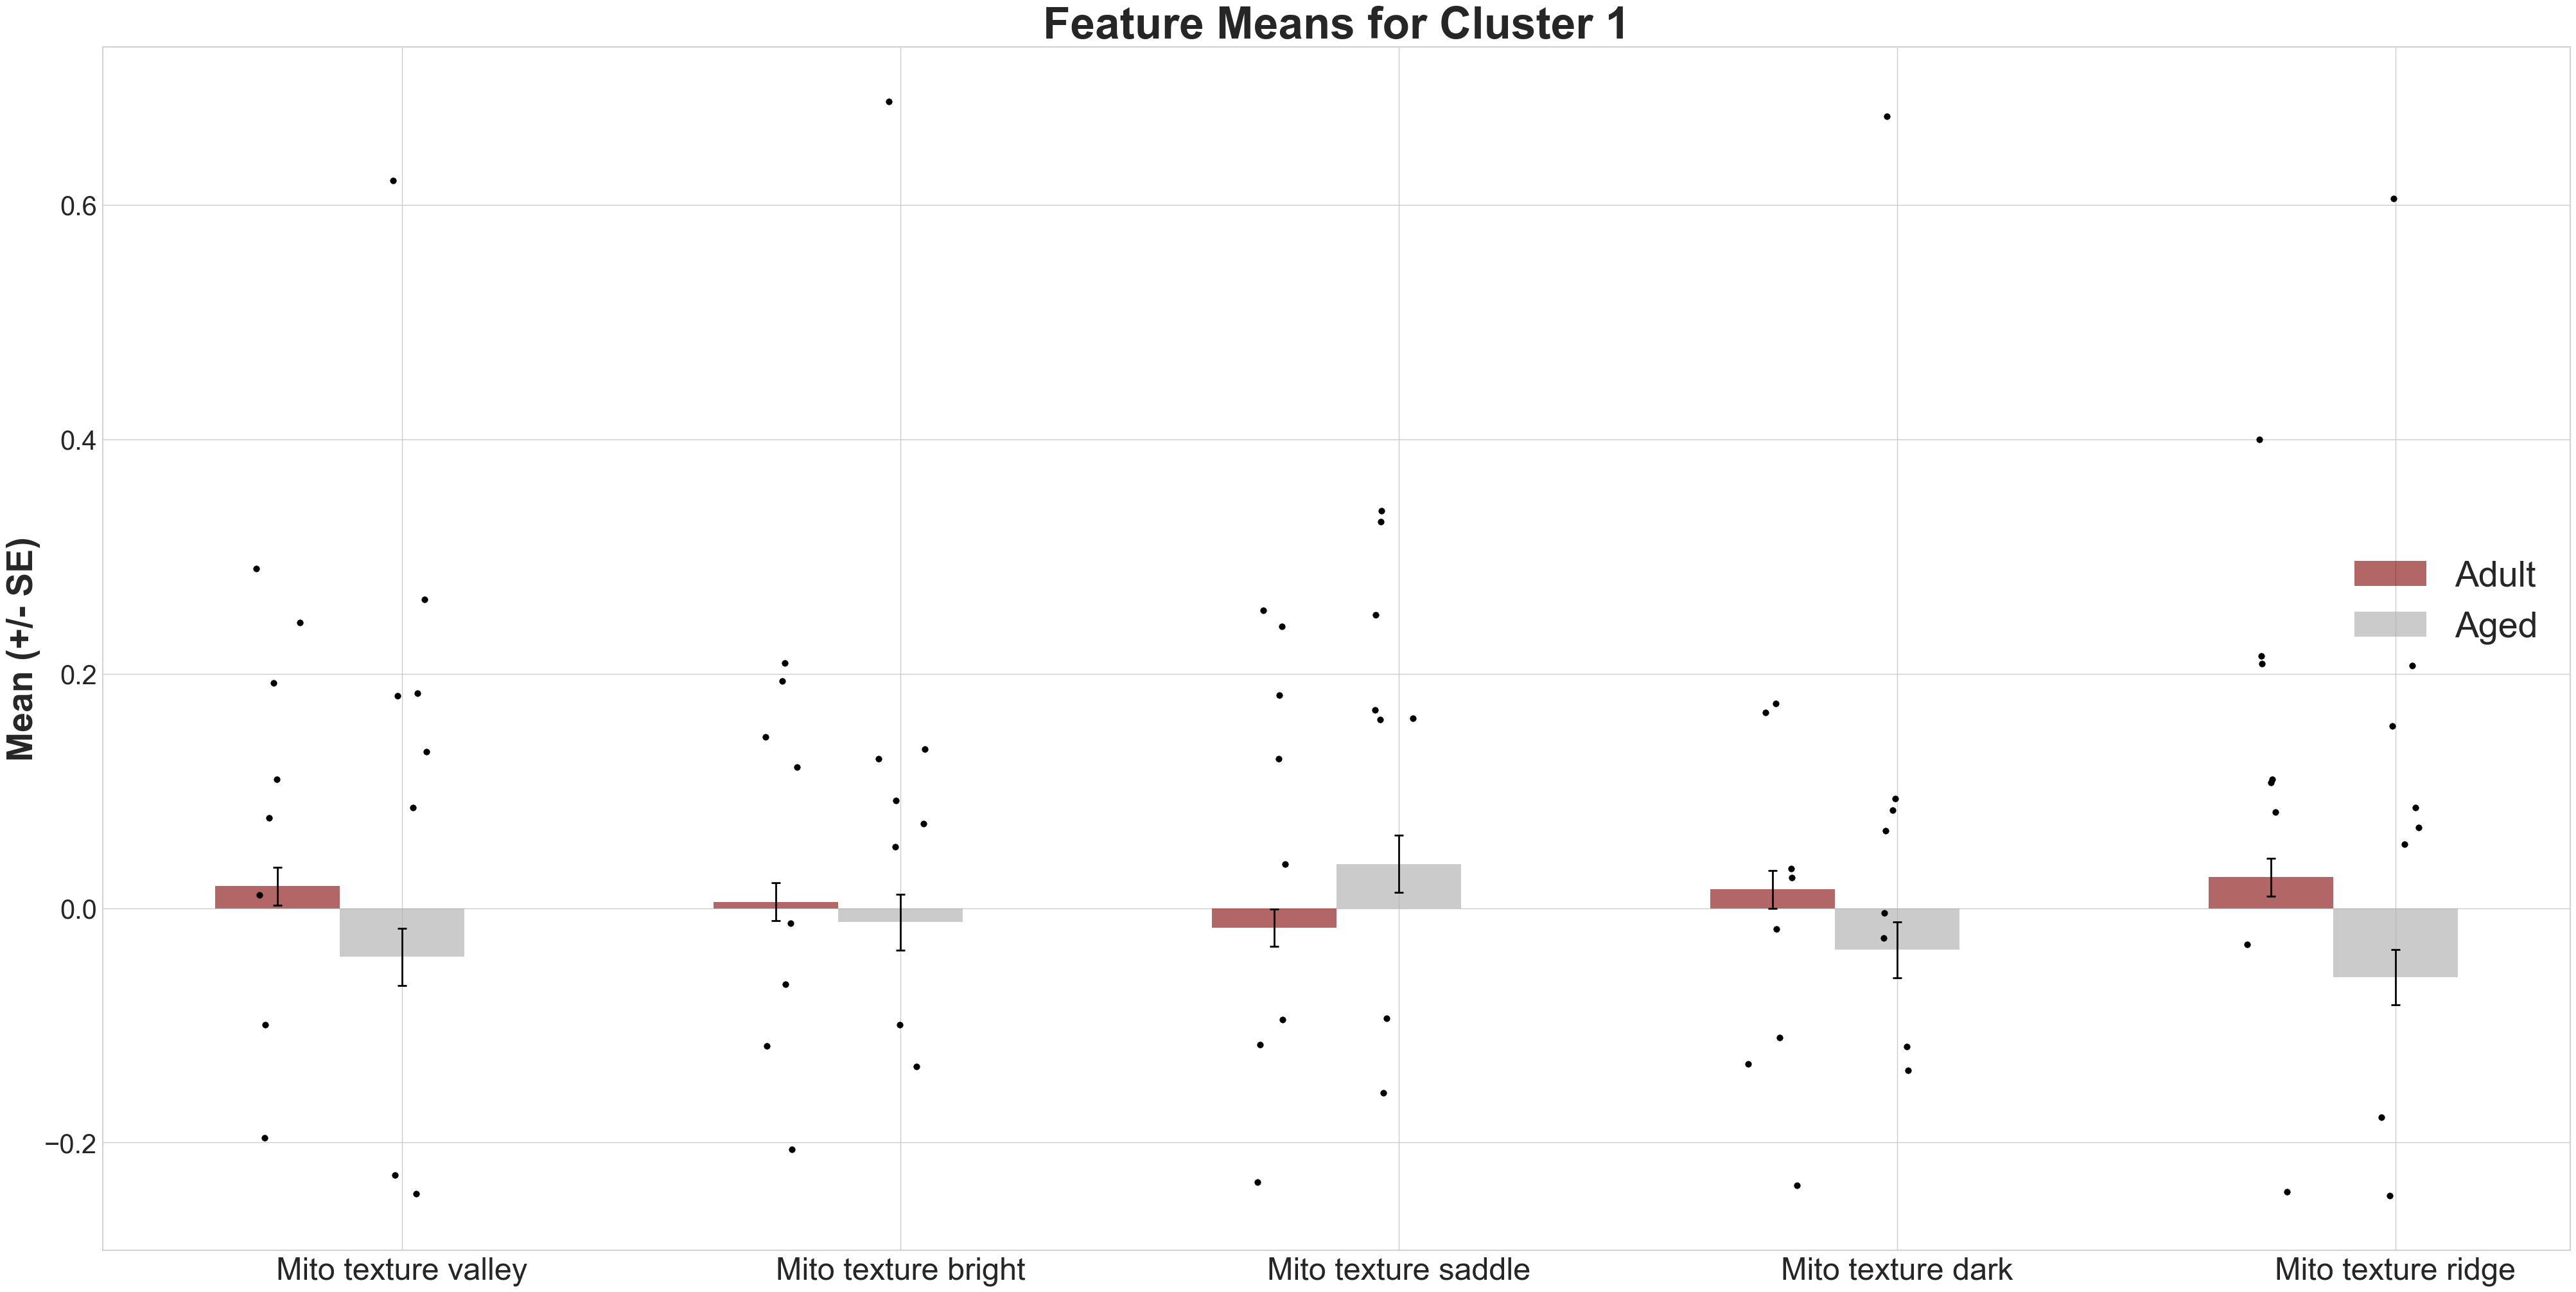

In [63]:
viz_cluster_feat(clust1_data,"Feature Means for Cluster 1","clust1.png")

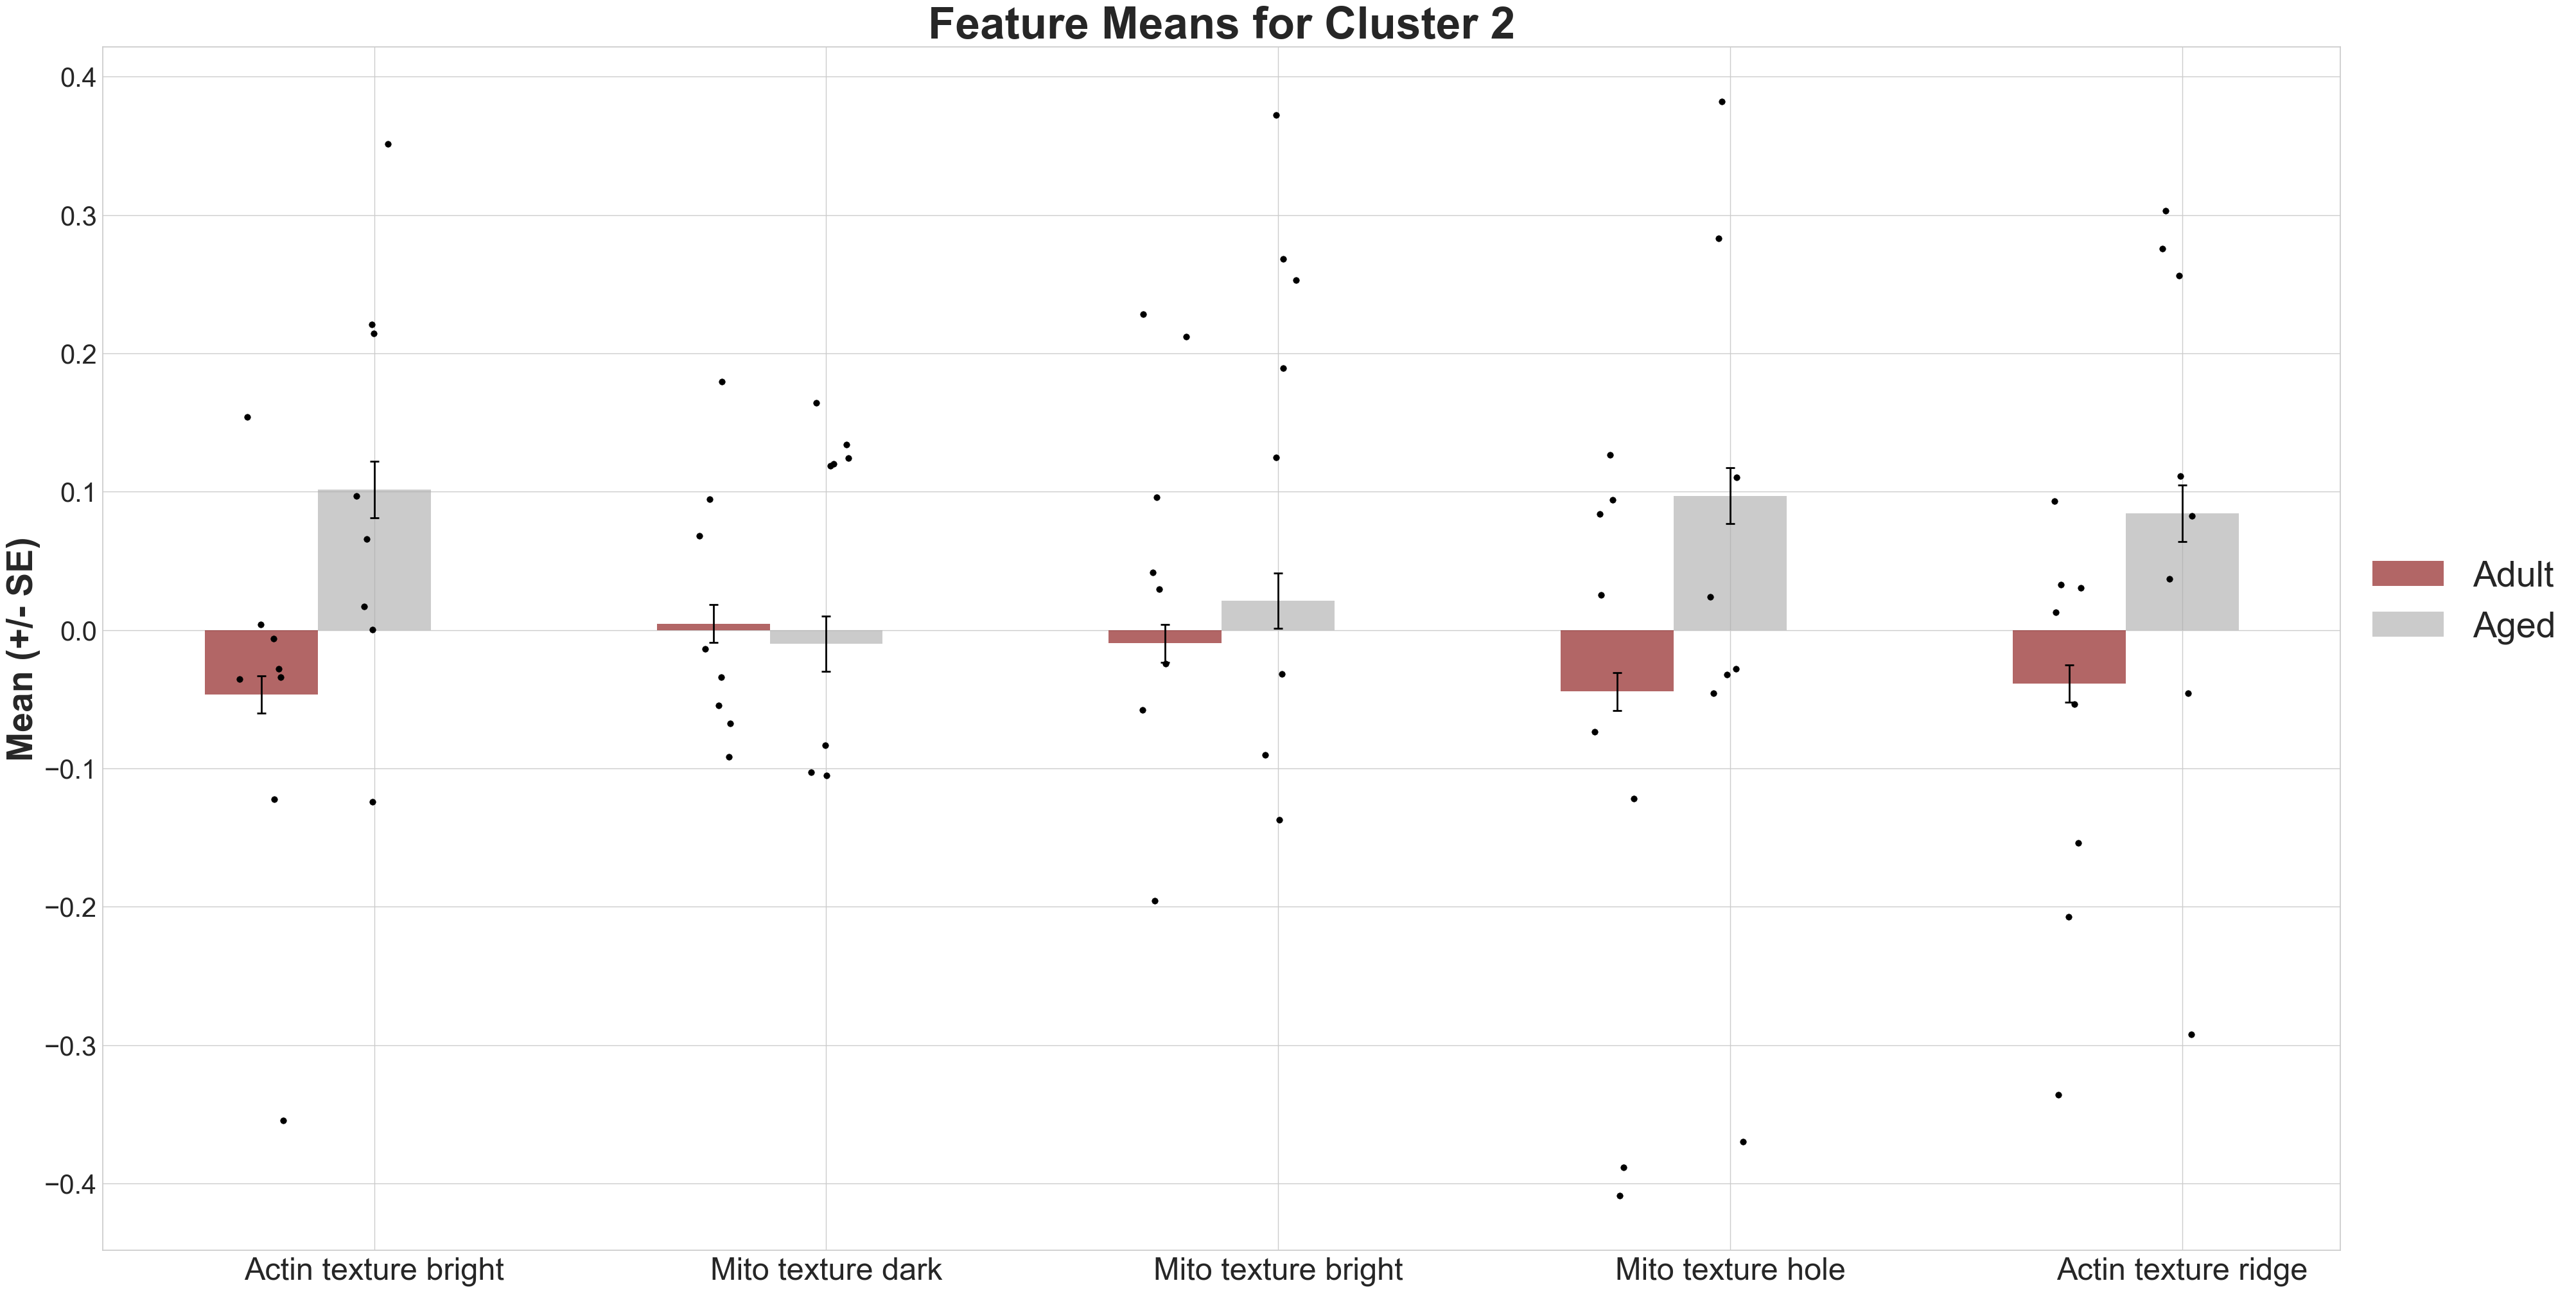

In [35]:
viz_cluster_feat(clust2_data,"Feature Means for Cluster 2","clust2.png")

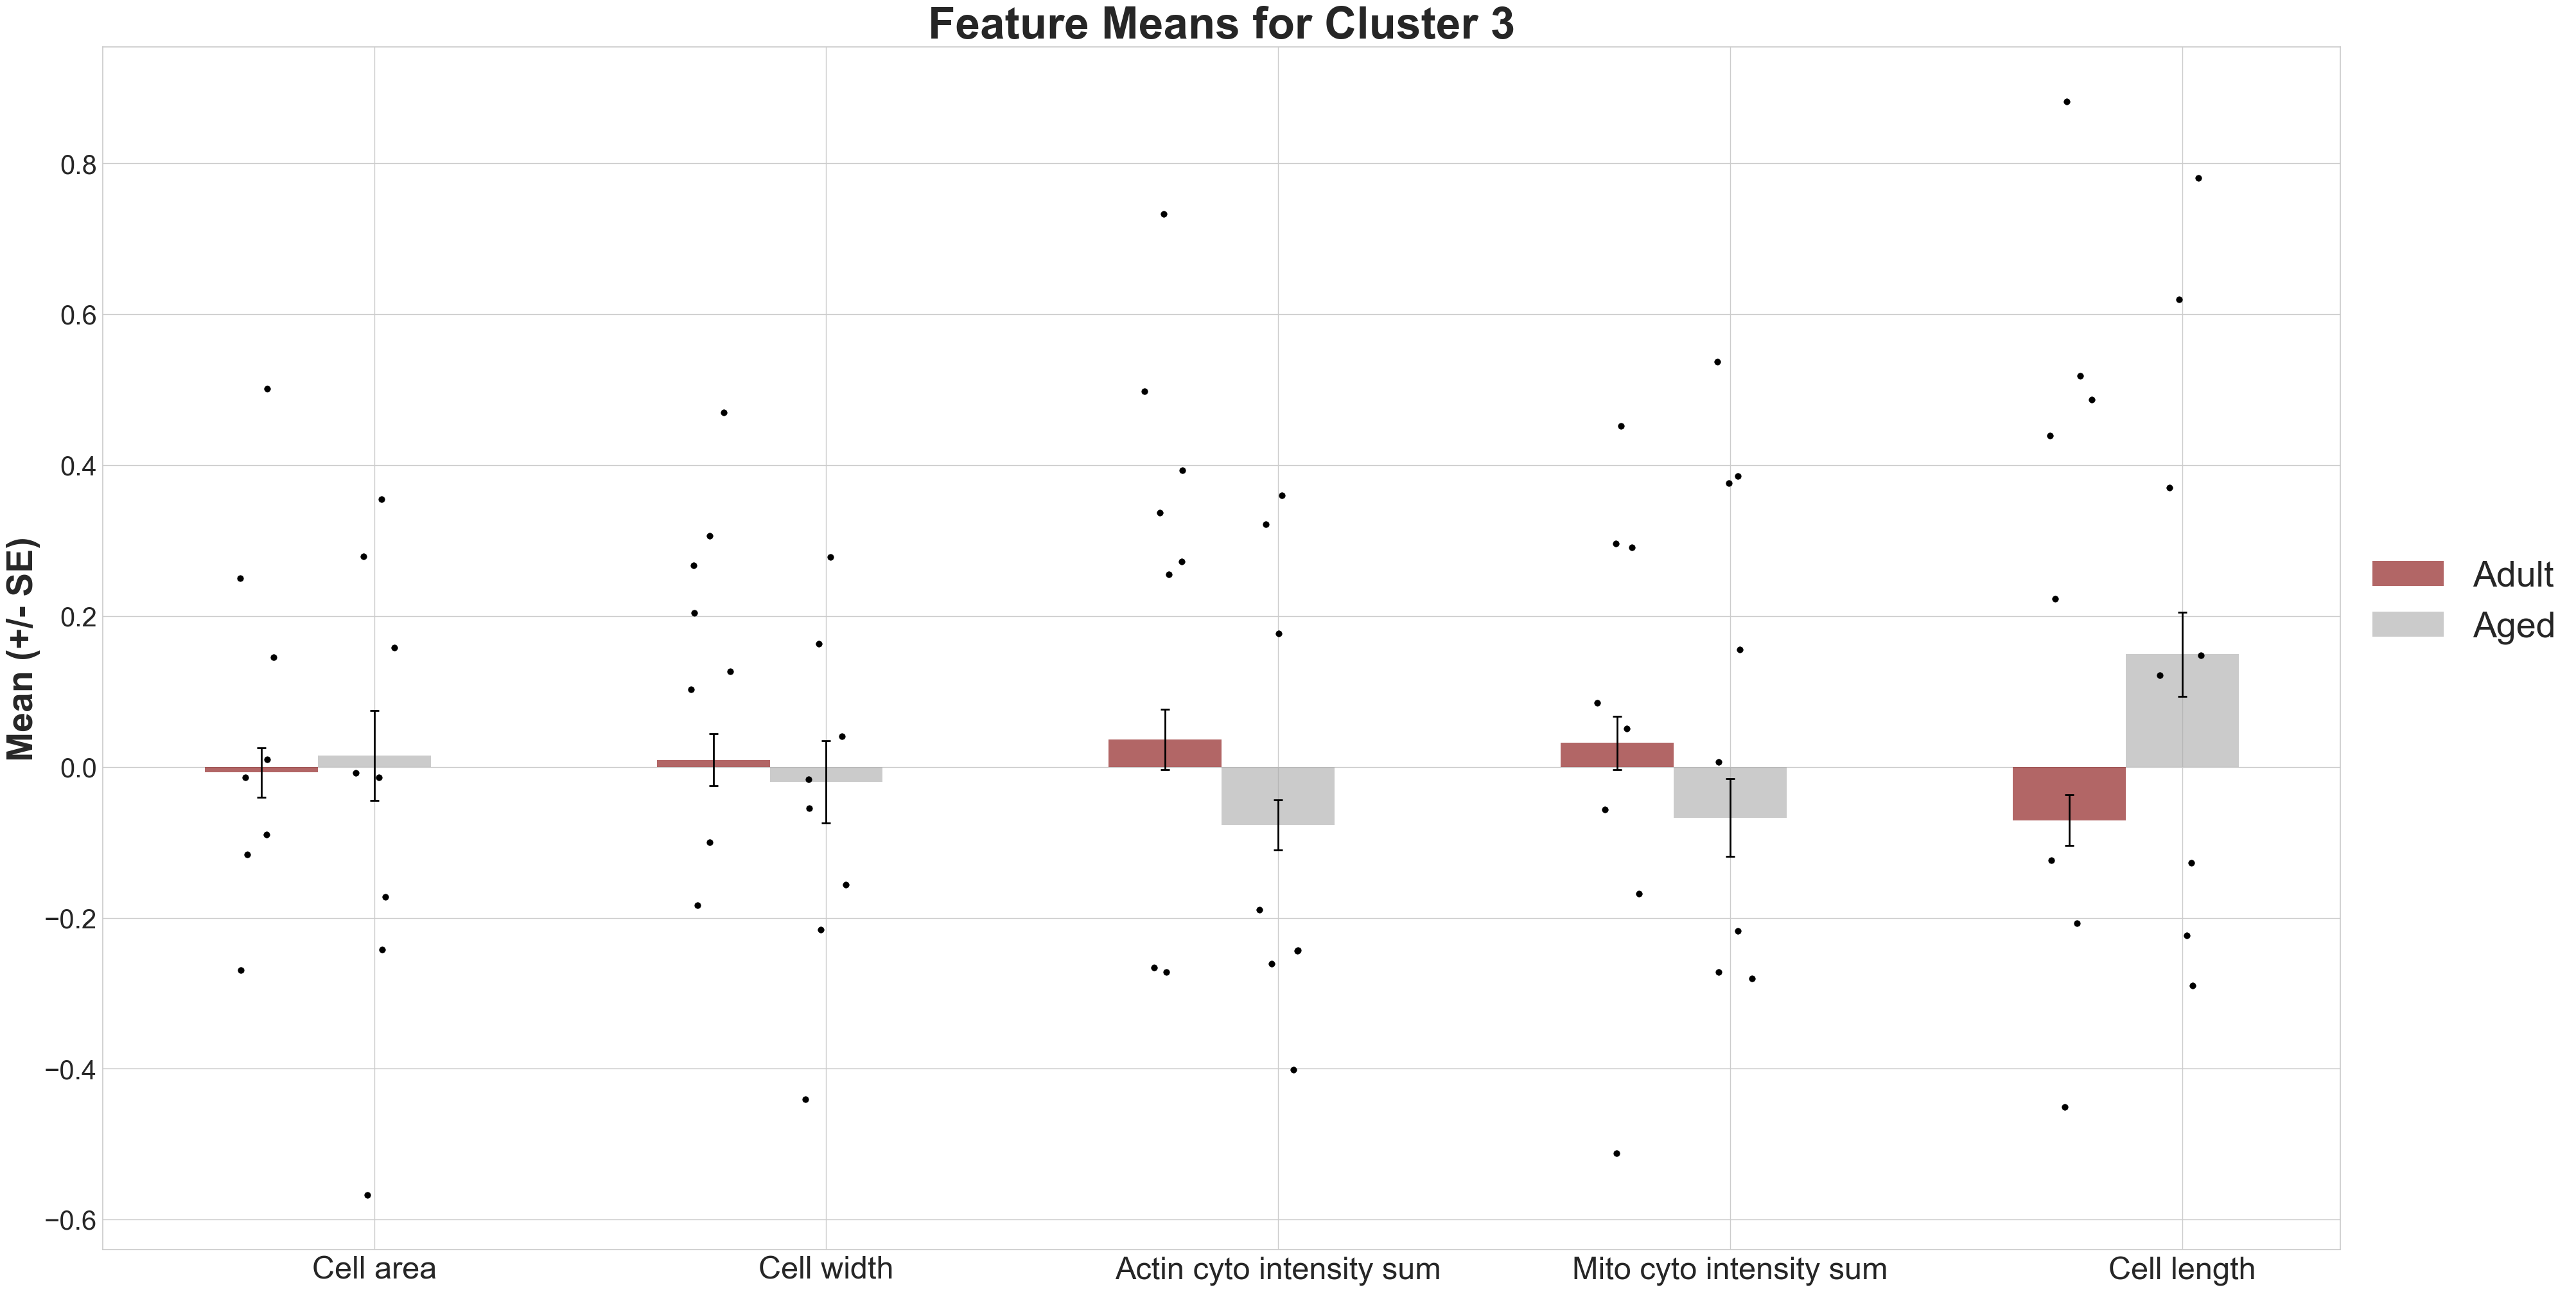

In [36]:
viz_cluster_feat(clust3_data,"Feature Means for Cluster 3","clust3.png")

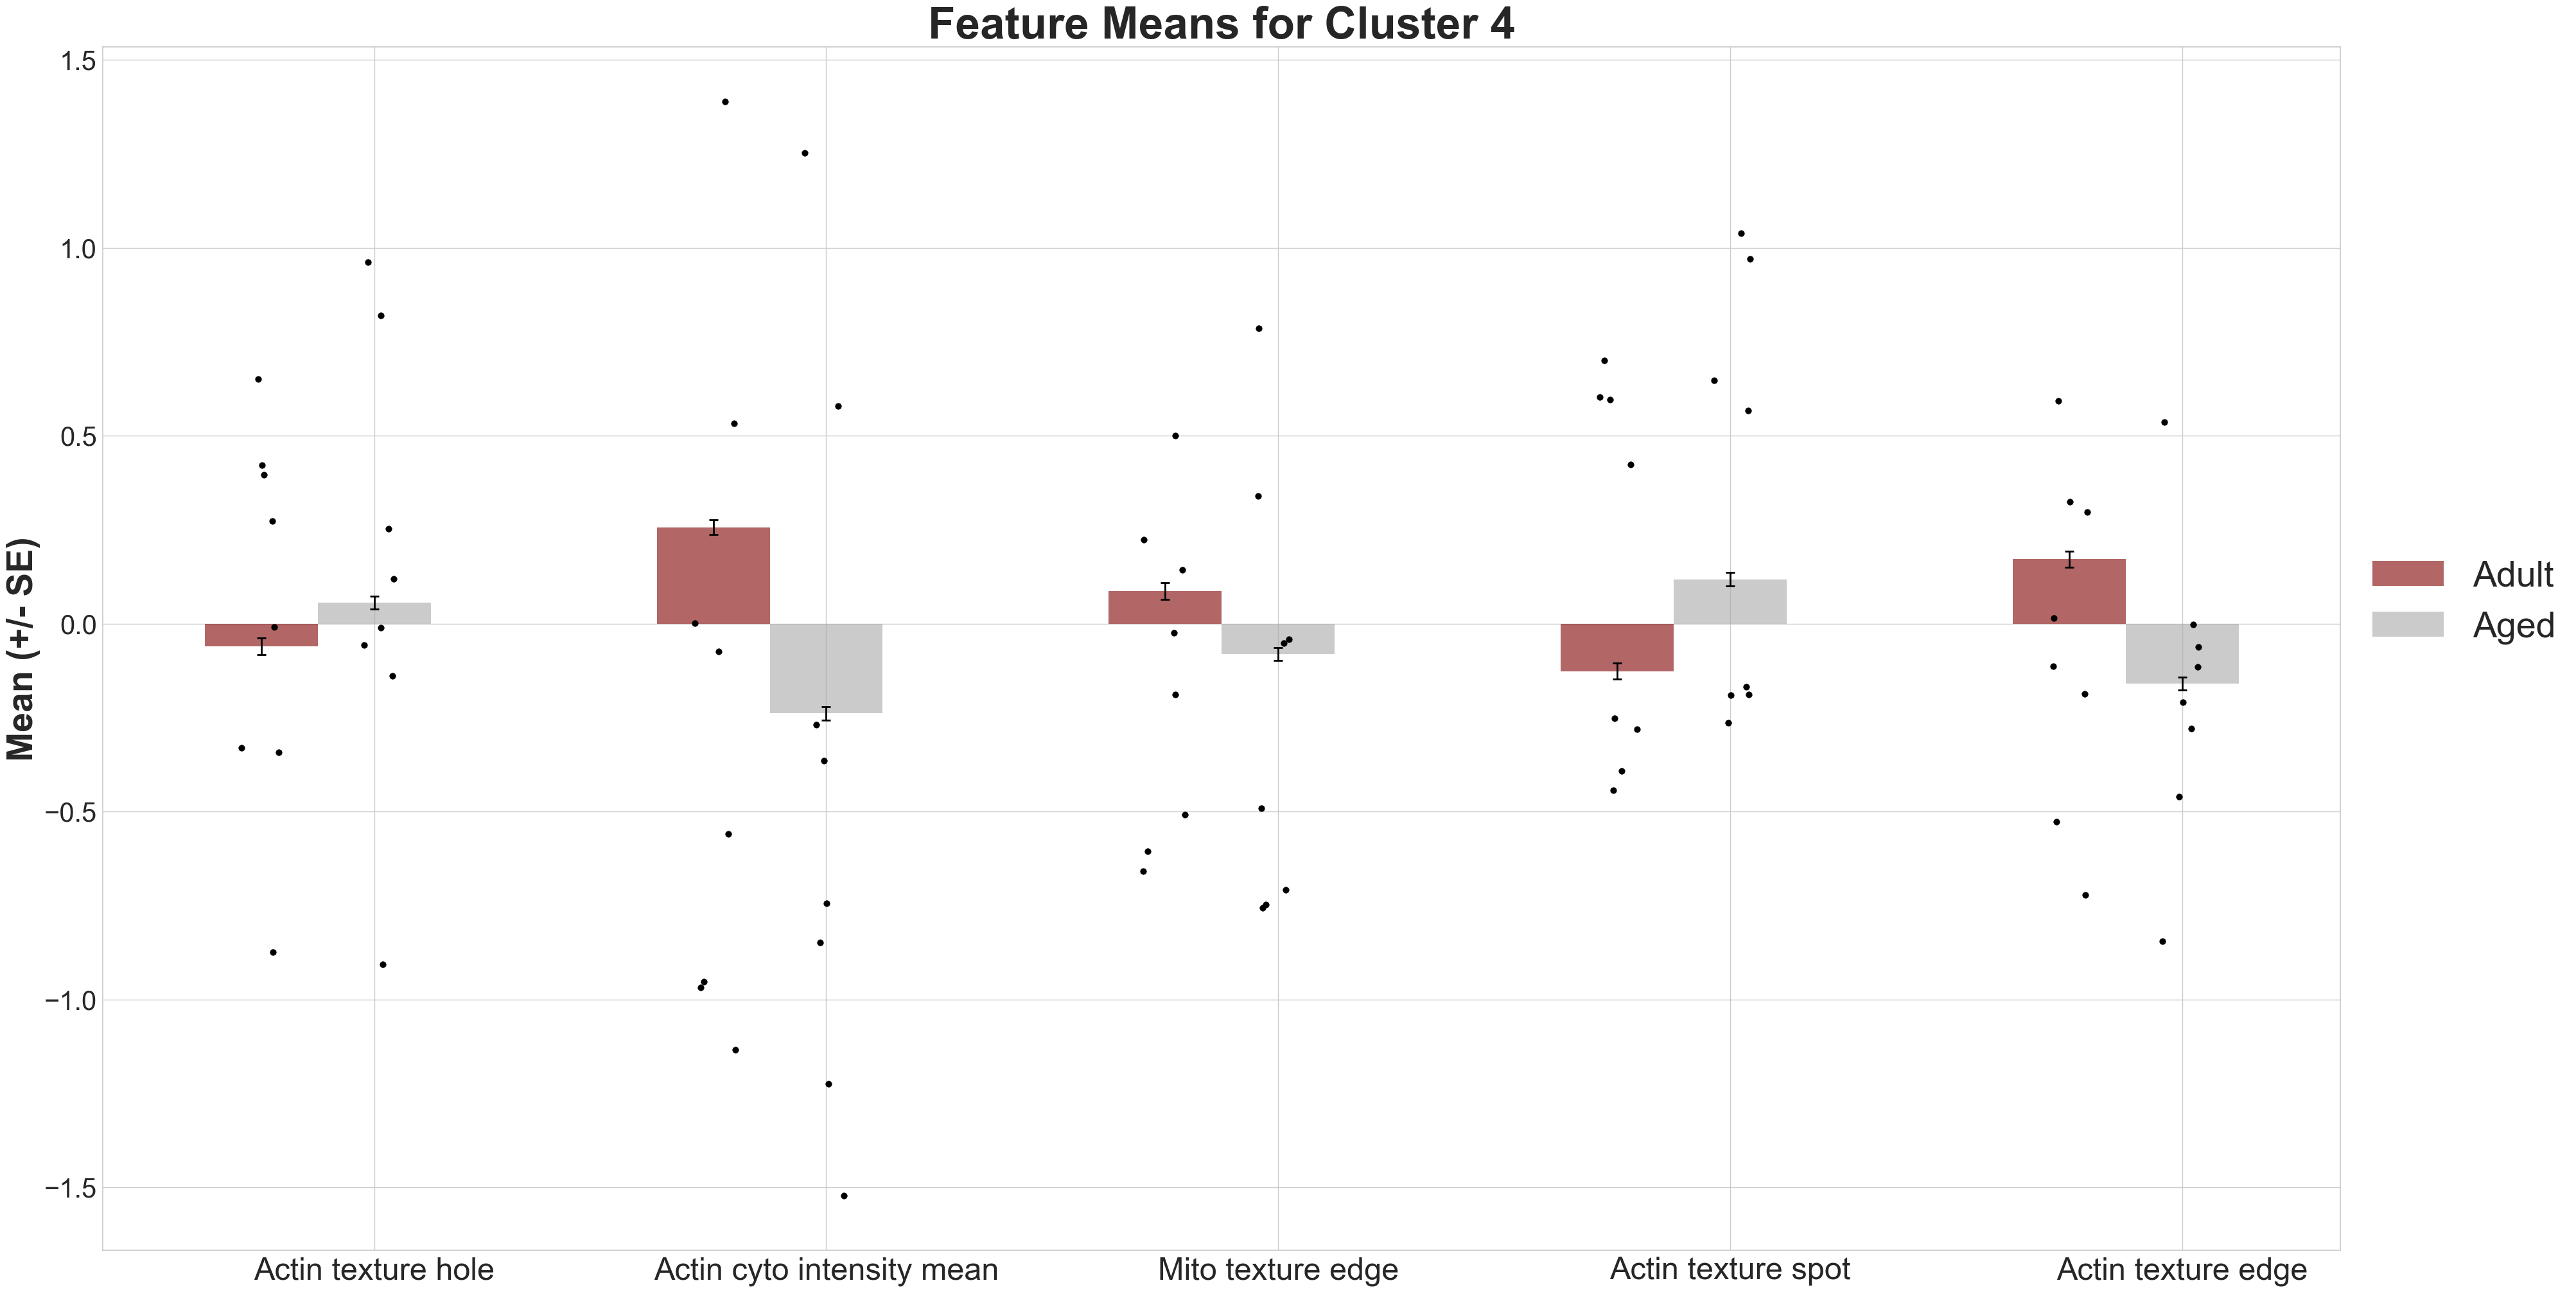

In [37]:
viz_cluster_feat(clust4_data,"Feature Means for Cluster 4","clust4.png")

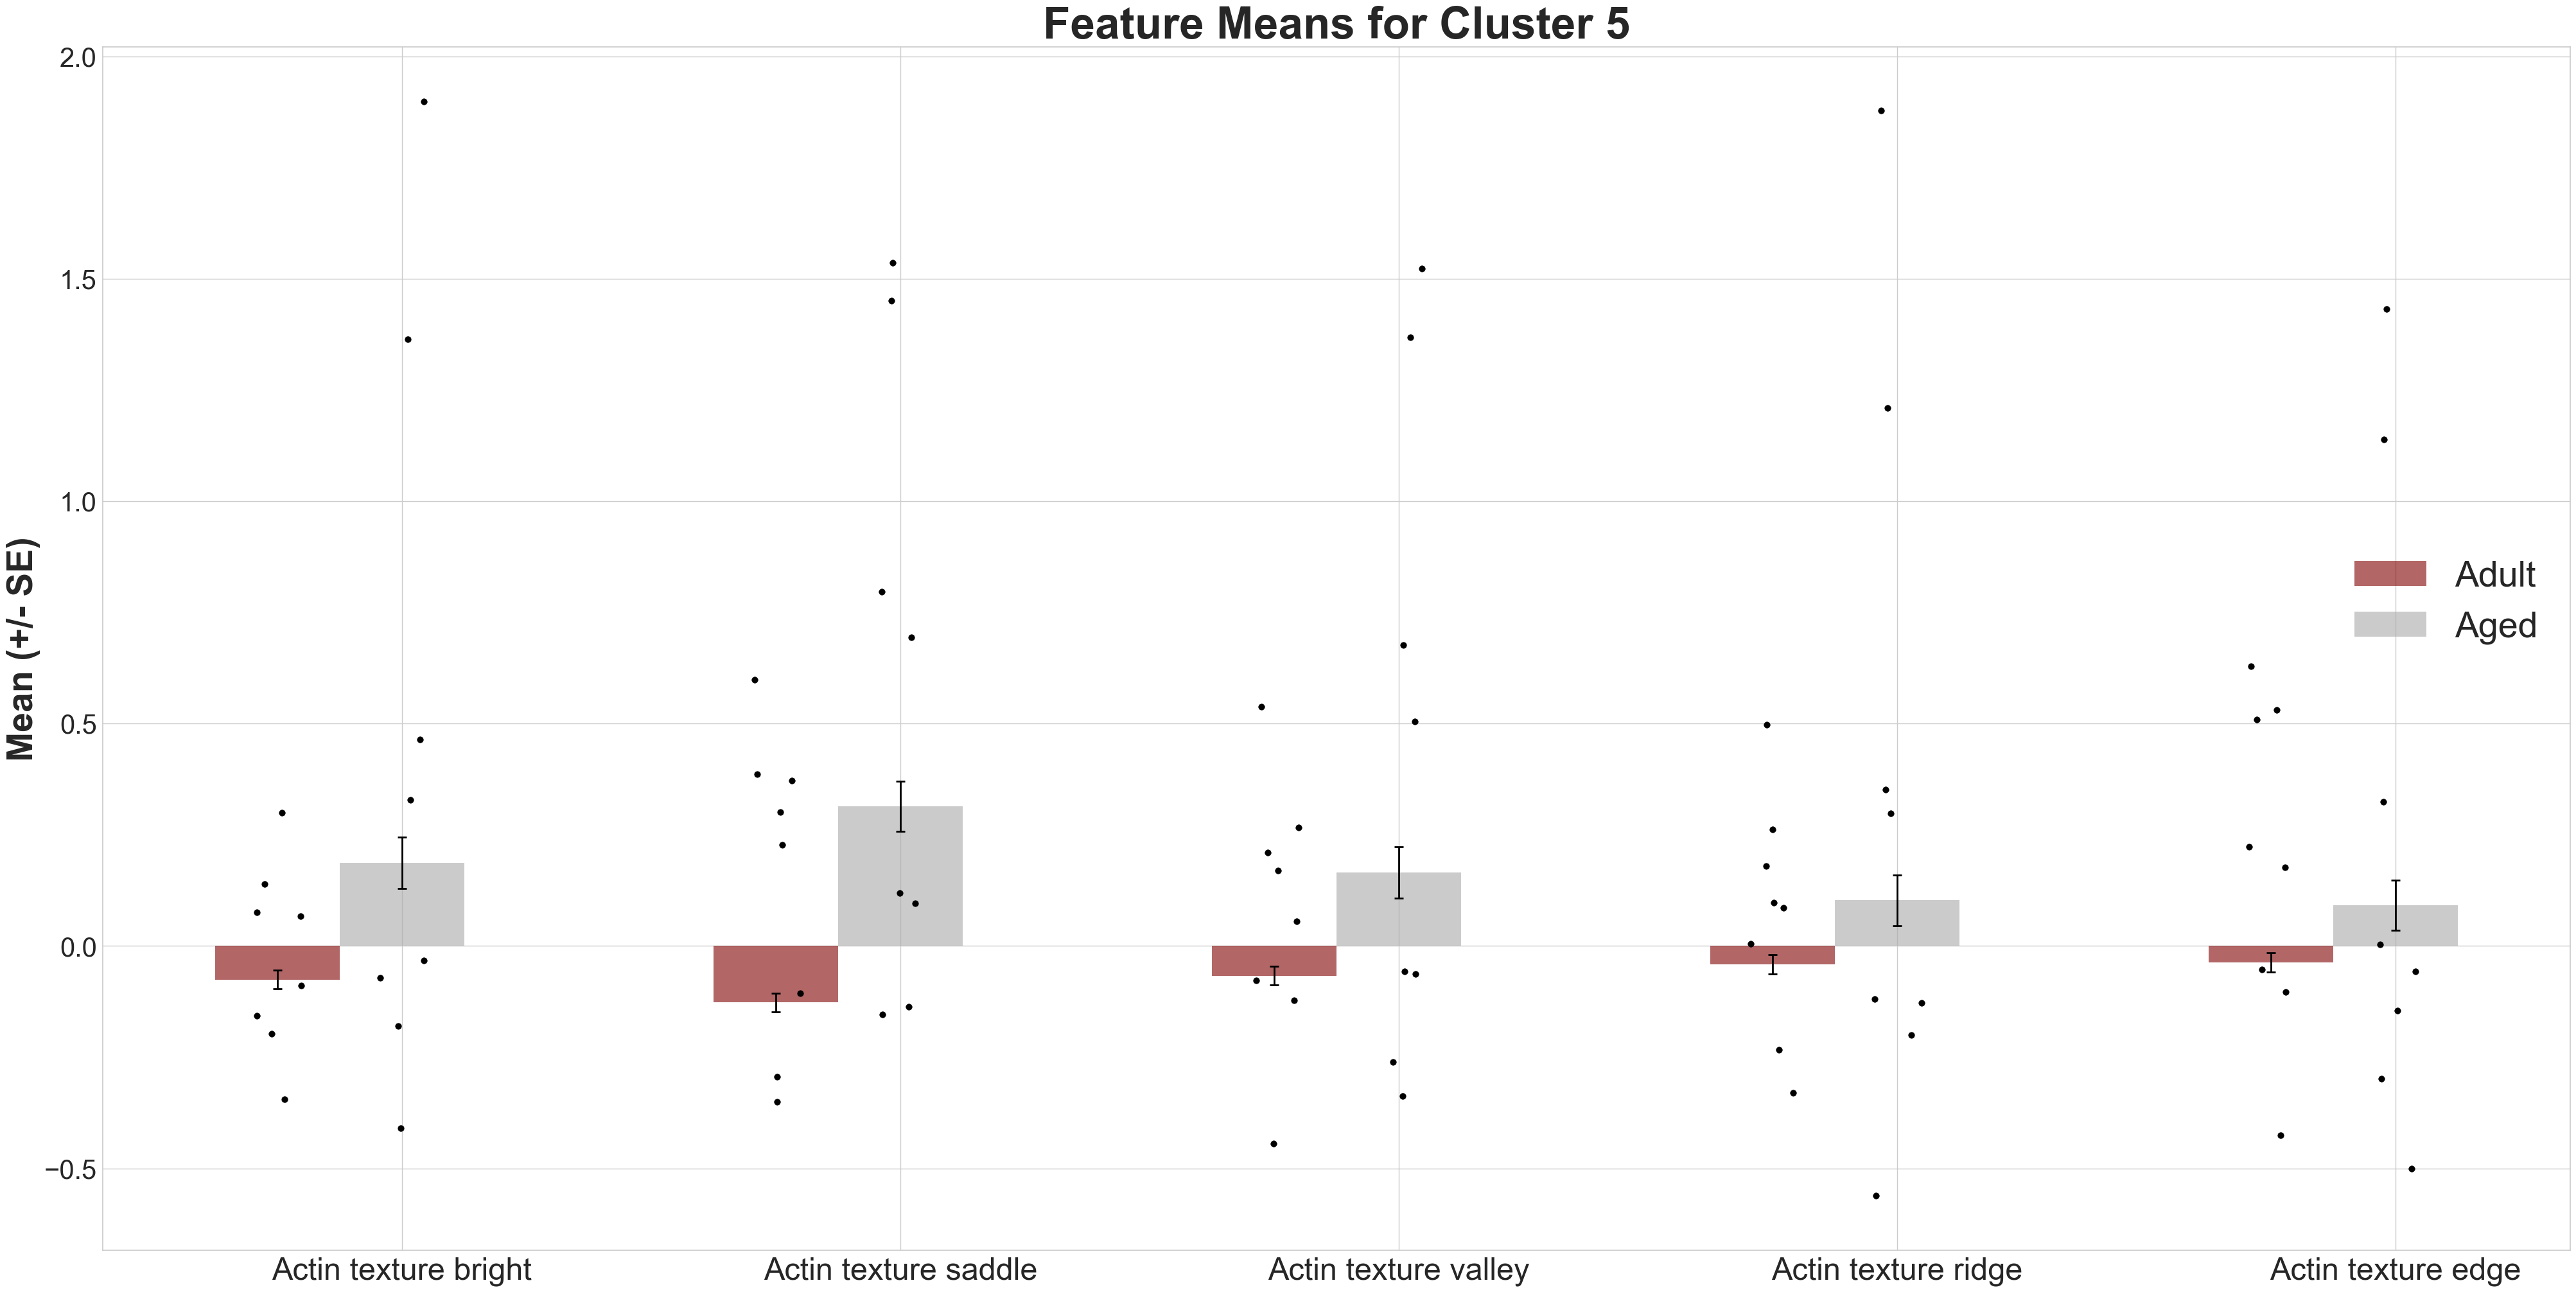

In [38]:
viz_cluster_feat(clust5_data,"Feature Means for Cluster 5","clust5.png")

**TO DO**

1. do feature select
2. do batch correction with combat for cell painting to standardize differences between plates 
3. add labels next to dots for analysis on cluster groups to see if the experiments align across plates
4. start working on cell profiler 

# IGNORE

In [39]:
# """
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Spot 0.2 px': 'Nucleoli texture spot',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Hole 0.2 px': 'Nucleoli texture hole',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Edge 0.2 px': 'Nucleoli texture edge',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Ridge 0.2 px': 'Nucleoli texture ridge',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Valley 0.2 px': 'Nucleoli texture valley',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Saddle 0.2 px': 'Nucleoli texture saddle',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Bright 0.2 px': 'Nucleoli texture bright',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Dark 0.2 px': 'Nucleoli texture dark',
# 'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Mean': ,
# 'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Sum',
# 'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Mean',
# 'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Sum',
# 'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Mean',
# 'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Sum',
# 'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Dark 0.2 px': 'Actin texture dark',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px': 'ER texture spot',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px': 'ER texture hole',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px': 'ER texture edge',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px': 'ER texture ridge',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px': 'ER texture valley',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px': 'ER texture saddle',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px': 'ER texture bright',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px': 'ER texture dark'
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px': 'RNA texture spot',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px': 'RNA texture hole',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px': 'RNA texture edge',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px': 'RNA texture ridge',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px': 'RNA texture valley',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px': 'RNA texture saddle',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px': 'RNA texture bright',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px': 'RNA texture dark',
# 'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Mean': 'ER intensity sum',
# 'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Sum': 'ER intensity mean',
# 'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Mean': 'RNA+ER intensity mean',
# 'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Sum': 'RNA+ER intensity sum',
# 'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Mean': 'RNA intensity mean',
# 'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Sum': 'RNA intensity sum',
# """